<a href="https://colab.research.google.com/github/javaflocks/Projects/blob/master/NLP_Project_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

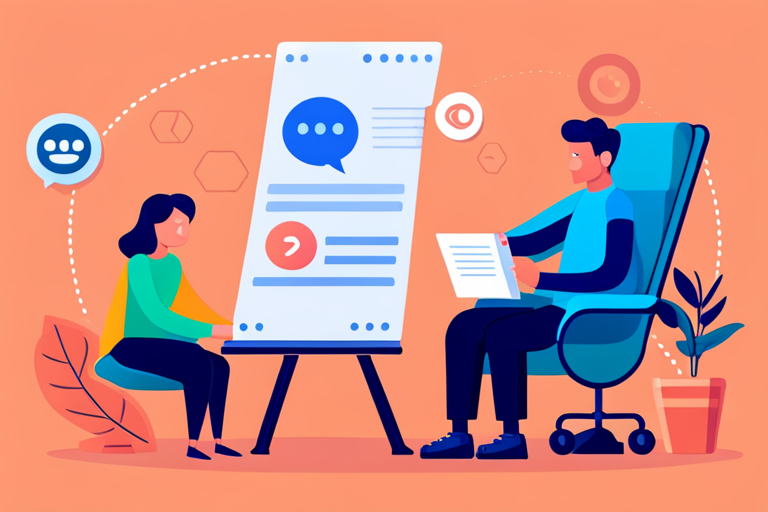

**DOMAIN:** Industrial safety. NLP based Chatbot.

**CONTEXT:**

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION:**

The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:

‣ **Data:** timestamp or time/date information

‣ **Countries:** which country the accident occurred (anonymised)

‣ **Local:** the city where the manufacturing plant is located (anonymised)

‣ **Industry sector:** which sector the plant belongs to

‣ **Accident level:** from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

‣ **Potential Accident Level:** Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)

‣ **Genre:** if the person is male of female

‣ **EMPLOYEE_TYPE:** if the injured person is an employee or a third party

‣ **CRITICAL_RISK:** some description of the risk involved in the accident

‣ **Description:** Detailed description of how the accident happened.


**Q1.**
Summary of Problem Statement, Data and Findings:

**Problem Statement:**

Industrial accidents pose a significant threat to employee safety and operational efficiency within various industries. Despite ongoing efforts to improve safety protocols, accidents continue to occur, resulting in injuries, fatalities, and financial losses. There is a critical need for industries to proactively identify and mitigate safety risks to create a safer working environment. This project aims to develop a machine learning-powered chatbot that can analyze incident descriptions and highlight potential safety risks, enabling professionals to make informed decisions and prevent future accidents. By leveraging natural language processing (NLP) techniques, the chatbot will provide a user-friendly interface for accessing and interpreting accident data, ultimately contributing to a safer and more productive workplace.

**Findings from Data:**

Based on the data, here are some key findings:

1.  **Class Imbalance:** The distribution of accident severity levels (Accident Level) is highly imbalanced. Some severity levels are significantly more frequent than others. This imbalance can negatively impact the performance of machine learning models, particularly in accurately predicting less frequent, but potentially critical, accident types.
2.  **Critical Risk Factors:** Certain critical risk factors are more prevalent than others. Identifying these high-frequency risks is crucial for prioritizing safety interventions.
3.  **Industry Sector Variations:** Accident patterns and critical risks vary across different industry sectors. This suggests that safety measures should be tailored to the specific risks associated with each sector.
4.  **Employee Type Impact:** The type of worker involved (employee vs. third party) influences the types of accidents that occur. Understanding these differences can help target safety training and protocols more effectively.
5.  **Text Description Insights:** The "Description" column contains valuable information about the circumstances surrounding accidents. Analyzing this text data using NLP techniques can reveal patterns and insights that are not readily apparent from other features.
6.  **Temporal Trends:** There are variations in the number of accidents over time (e.g., by year, month, day of the week). Identifying these trends can help predict periods of increased risk and implement proactive safety measures.
7.  **Location-Specific Risks:** The "Countries" and "Local" columns indicate that accident patterns may vary geographically. This suggests that safety interventions should be tailored to the specific risks associated with each location.

**Data Analysis Summary:**

The data analysis reveals several key areas for improvement in industrial safety:

*   **Targeted Safety Interventions:** The variations in accident patterns across industry sectors, employee types, and locations highlight the need for targeted safety interventions that are tailored to the specific risks associated with each group.
*   **Proactive Risk Mitigation:** By identifying the most prevalent critical risk factors and temporal trends, industries can proactively mitigate safety risks before accidents occur.
*   **Improved Data Collection and Analysis:** The "Description" column offers a rich source of information, but it requires sophisticated NLP techniques to extract meaningful insights. Improving data collection and analysis methods can lead to a better understanding of accident causes and prevention strategies.
*   **Enhanced Training and Awareness:** The data suggests that human factors play a significant role in many accidents. Enhanced training and awareness programs can help employees identify and avoid potential hazards.
*   **Addressing Root Causes:** The "Potential Accident Level" column provides insights into the underlying factors that contribute to accidents. Addressing these root causes can prevent future accidents from occurring.




In [ ]:
## Library Installation for Code Required
!pip install numpy==1.23.5
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib-venn
!pip install joblib
!pip install pydotplus
!pip install skompiler
!pip install astor
!pip install skimpy
!pip install seaborn
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54310 sha256=2e740d7d7b312c8100c4f07208360e23daf931d399d508675b9692acb7c88b54
  Stored in directory: /root/.cache/pip/wheels/14/72/77/016a3480b154c1c2f70dcb355af1a01ef832974079ec6148e6
Successfully built skompiler
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
    

In [ ]:
#Code to Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Code to Download Latest Dataset from Kaggle
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ihmstefanini/industrial-safety-and-health-analytics-database")
# Printing Path of File Where its downloaded
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ihmstefanini/industrial-safety-and-health-analytics-database/versions/3


In [ ]:
# Code to Copy all files from path /root/.cache/kagglehub/datasets/ihmstefanini/industrial-safety-and-health-analytics-database/versions/3 to /content/drive

import shutil
import os

# Define source and destination paths
source_path = "/root/.cache/kagglehub/datasets/ihmstefanini/industrial-safety-and-health-analytics-database/versions/3"
destination_path = "/content/drive/MyDrive/industrial_safety_dataset"  # You can change the destination folder

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy files
try:
    for filename in os.listdir(source_path):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        if os.path.isfile(source_file):
            shutil.copy2(source_file, destination_file)  # Use shutil.copy2 to preserve metadata
            print(f"Copied '{filename}' to '{destination_path}'")
except FileNotFoundError:
    print(f"Source directory '{source_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Copied 'IHMStefanini_industrial_safety_and_health_database.csv' to '/content/drive/MyDrive/industrial_safety_dataset'
Copied 'IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv' to '/content/drive/MyDrive/industrial_safety_dataset'
Copied 'Accidents_Storyline_example.png' to '/content/drive/MyDrive/industrial_safety_dataset'


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
import random
from operator import truediv
from pydoc_data.topics import topics
from tarfile import ENCODING
import joblib
import pydotplus
import matplotlib
from scipy.linalg.interpolative import estimate_rank
from matplotlib import pyplot as plt
#from skimpy import skim
import datetime as dt
from joblib import dump
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=Warning)
import math
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
InteractiveShell.ast_node_interactivity = "all"
import warnings
import joblib
from matplotlib import pyplot as plt
warnings.simplefilter(action='ignore', category=Warning)
#import squarify

In [ ]:
import pandas as pd
import numpy as np
# Set display options for pandas DataFrame
pd.set_option("display.max_columns", None)  # Display all columns
pd.set_option("display.max_rows", 250)  # Display up to 250 rows
pd.set_option("display.width", 500)  # Set display width to 500 characters
pd.set_option("display.expand_frame_repr", False)  # Disable frame expansion to multiple lines
pd.reset_option('display.float_format')  # Reset float format to default

In [ ]:
!pip install numpy==1.23.5

#**Exploratory Data Analysis:**

##**Data Understanding, Cleaning and Data Pre-Processsing:**

In [ ]:
## Data Preparation for Exploratory Data Analysis (EDA)
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.shape
df_=data.copy()
print(df_.shape)
print(df_.columns)
df_.drop("Unnamed: 0", axis=1, inplace=True)
print("After Dropping Unnamed Column:",df_.columns)
df_.columns=['DATE', 'COUNTRIES', 'LOCAL', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL', 'POTENTIAL_ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'CRITICAL_RISK', 'INCIDENT_DESCRIPTION']
#df_.head()
# Sample data to simulate the dataset
# Create a DataFrame
df = pd.DataFrame(df_)

# Data Cleansing Steps
#print(df.head())
# Convert Data column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])
df.columns=['DATE', 'COUNTRIES', 'LOCAL', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL', 'POTENTIAL_ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'CRITICAL_RISK', 'INCIDENT_DESCRIPTION']
print(df.head())

# Assuming 'df' is your DataFrame
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Specify the file path
file_path = '/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_columns_UPPERCASE.csv'
# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to avoid saving row indices

(425, 11)
Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')
After Dropping Unnamed Column: Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')
        DATE   COUNTRIES     LOCAL INDUSTRY_SECTOR ACCIDENT_LEVEL  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  POTENTIAL_ACCIDENT_LEVEL GENDER         EMPLOYEE_TYPE        CRITICAL_RISK  \
0                       IV   Male   

In [ ]:
# Function to Load Data from Downloaded Data File
def load_data_base() -> object:
    # Read the CSV file into a DataFrame
    data = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_columns_UPPERCASE.csv")

    # Convert all column names to uppercase
    data.columns = [col.upper() for col in data.columns]

    # Convert columns containing "DATA" in their name to datetime format
    data[[col for col in data.columns if "DATA" in col]] = data[[col for col in data.columns if "DATA" in col]].apply(pd.to_datetime)

    return data

In [ ]:
# Load Data and
df_ = load_data_base()  # Load the dataset into a DataFrame

# Print the shape of the DataFrame (number of rows and columns)
print(df_.shape)

# Print the column names of the DataFrame
print(df_.columns)

# Print the first few rows of the DataFrame
print(df_.head())

(425, 10)
Index(['DATE', 'COUNTRIES', 'LOCAL', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL',
       'POTENTIAL_ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'CRITICAL_RISK',
       'INCIDENT_DESCRIPTION'],
      dtype='object')
         DATE   COUNTRIES     LOCAL INDUSTRY_SECTOR ACCIDENT_LEVEL  \
0  2016-01-01  Country_01  Local_01          Mining              I   
1  2016-01-02  Country_02  Local_02          Mining              I   
2  2016-01-06  Country_01  Local_03          Mining              I   
3  2016-01-08  Country_01  Local_04          Mining              I   
4  2016-01-10  Country_01  Local_04          Mining             IV   

  POTENTIAL_ACCIDENT_LEVEL GENDER         EMPLOYEE_TYPE        CRITICAL_RISK  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male         

In [ ]:
# Date Column Cleansing Code

# 1. Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# 2. Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# 4. Remove rows with invalid dates
df = df.dropna(subset=['DATE'])

# 5. Reset index after dropping rows
#df.reset_index(drop=True, inplace=True)

# Display the cleansed data
print("\nCleansed Data:")
print(df.head())


Cleansed Data:
        DATE   COUNTRIES     LOCAL INDUSTRY_SECTOR ACCIDENT_LEVEL  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  POTENTIAL_ACCIDENT_LEVEL GENDER         EMPLOYEE_TYPE        CRITICAL_RISK  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                INCIDENT_DESCRIPTION  
0  While removing the drill rod o

In [ ]:
# Add time-based features to the dataframe
df["YEAR"] = df["DATE"].dt.year  # Extract year from the DATE column
df["MONTH"] = df["DATE"].dt.month  # Extract month from the DATE column
df["WEEKDAY"] = df["DATE"].apply(lambda x: x.strftime("%A"))  # Extract weekday name from the DATE column

# Define seasons based on the month
df["SEASON"] = ["Summer" if month in [1, 2, 12]
                else "Autumn" if month in [3, 4, 5]
                else "Winter" if month in [6, 7, 8]
                else "Spring" for month in df["MONTH"]] #Let us keep this as month - seasons have no correlation with risk but months have - source - kaggle database discussion - Animesh

# Function to convert Roman numerals to integers
def roman_to_int(roman):
    roman_dict = {"I": 1, "II": 2, "III": 3, "IV": 4, "V": 5, "VI": 6}
    return roman_dict.get(roman, None)

# Convert ACCIDENT_LEVEL and POTENTIAL_ACCIDENT_LEVEL from Roman numerals to integers
df["ACCIDENT_LEVEL"] = df["ACCIDENT_LEVEL"].apply(roman_to_int)
df["POTENTIAL_ACCIDENT_LEVEL"] = df["POTENTIAL_ACCIDENT_LEVEL"].apply(roman_to_int)

# Clean up the CRITICAL_RISK and EMPLOYEE_TYPE columns
df['CRITICAL_RISK'] = df['CRITICAL_RISK'].replace('\nNot applicable', 'Not applicable')
df['EMPLOYEE_TYPE'] = df['EMPLOYEE_TYPE'].replace('Third Party (Remote)', 'Third Party Remote') #Let us keep this as third party remote as only remote can mean tp/ employee - Animesh

In [ ]:
# Common Function to check dataframe main data and features
def check_dataframe(dataframe, head=5):
    print ("########## Shape ##########")
    print (dataframe.shape)
    print("########## Variables ##########")
    print(dataframe.columns)
    print ("########## Types ##########")
    print (dataframe.dtypes)
    print ("########## Head ##########")
    print (dataframe.head(head))
    print ("########## Tail ##########")
    print (dataframe.tail(head))
    print ("########## NA ##########")
    print (dataframe.isnull().sum())
    print ("########## Quantiles ##########")
    print (dataframe.describe([0,0.05,0.50,0.95,0.99, 1]).T)

check_dataframe(df)

########## Shape ##########
(425, 14)
########## Variables ##########
Index(['DATE', 'COUNTRIES', 'LOCAL', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL',
       'POTENTIAL_ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'CRITICAL_RISK',
       'INCIDENT_DESCRIPTION', 'YEAR', 'MONTH', 'WEEKDAY', 'SEASON'],
      dtype='object')
########## Types ##########
DATE                        datetime64[ns]
COUNTRIES                           object
LOCAL                               object
INDUSTRY_SECTOR                     object
ACCIDENT_LEVEL                       int64
POTENTIAL_ACCIDENT_LEVEL             int64
GENDER                              object
EMPLOYEE_TYPE                       object
CRITICAL_RISK                       object
INCIDENT_DESCRIPTION                object
YEAR                                 int32
MONTH                                int32
WEEKDAY                             object
SEASON                              object
dtype: object
########## Head ##########
        DATE  

In [ ]:
print(df.head())
print(df.shape)
print(df.columns)
# Save the cleansed and converted data to a new CSV file
cleansed_file_path = '/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_cleansed_For_analysis.csv'
df.to_csv(cleansed_file_path, index=False)

        DATE   COUNTRIES     LOCAL INDUSTRY_SECTOR  ACCIDENT_LEVEL  \
0 2016-01-01  Country_01  Local_01          Mining               1   
1 2016-01-02  Country_02  Local_02          Mining               1   
2 2016-01-06  Country_01  Local_03          Mining               1   
3 2016-01-08  Country_01  Local_04          Mining               1   
4 2016-01-10  Country_01  Local_04          Mining               4   

   POTENTIAL_ACCIDENT_LEVEL GENDER       EMPLOYEE_TYPE        CRITICAL_RISK  \
0                         4   Male         Third Party              Pressed   
1                         4   Male            Employee  Pressurized Systems   
2                         3   Male  Third Party Remote         Manual Tools   
3                         1   Male         Third Party               Others   
4                         4   Male         Third Party               Others   

                                INCIDENT_DESCRIPTION  YEAR  MONTH    WEEKDAY  \
0  While removing the dr

#**Univariate Data Analysis:**

In [ ]:
#Dataframe I checked the type, number of unique and value of unique values ​​of the variables in .
def check_dataframe_Unique(dataframe, th_print=25):
    """
    In this function, all df.columns are cheked.
    For all variables type, null value, unique values and number of null and unique values caunt are printed.
    Parameters
    ----------
    dataframe: dataframe name
    col_name: which type of col need check

    Returns
    -------

        """
    for col in dataframe:
        print(f"Column Name: {col}")
        print(f"Null Count: {dataframe[col].isnull().sum()}")
        print(f"Unique Number: {dataframe[col].nunique()}")

        if dataframe[col].nunique()<th_print:
            print(f"Dtype: {dataframe[col].dtype}")
            print(f"Unique Value List: {dataframe[col].unique()}")
            print(f"Value Counts:\n{dataframe[col].value_counts().sort_values(ascending=False)}")

        print("---\n")

check_dataframe_Unique(df)

Column Name: DATE
Null Count: 0
Unique Number: 287
---

Column Name: COUNTRIES
Null Count: 0
Unique Number: 3
Dtype: object
Unique Value List: ['Country_01' 'Country_02' 'Country_03']
Value Counts:
COUNTRIES
Country_01    251
Country_02    130
Country_03     44
Name: count, dtype: int64
---

Column Name: LOCAL
Null Count: 0
Unique Number: 12
Dtype: object
Unique Value List: ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
Value Counts:
LOCAL
Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: count, dtype: int64
---

Column Name: INDUSTRY_SECTOR
Null Count: 0
Unique Number: 3
Dtype: object
Unique Value List: ['Mining' 'Metals' 'Others']
Value Counts:
INDUSTRY_SECTOR
Mining    241
Metals    134
Others     50
Name: count, dtype: int64
---

Column Name: ACCIDENT_LEVEL
Null

In [ ]:
#Printing Columns of Data Frame
print(df_.columns)
#Printing EMPLOYEE_TYPE Unique Values
print(df_['EMPLOYEE_TYPE'].unique)
df.groupby(by=["INDUSTRY_SECTOR","EMPLOYEE_TYPE","CRITICAL_RISK"]).agg({"DATE": "count"}).reset_index()

Index(['DATE', 'COUNTRIES', 'LOCAL', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL',
       'POTENTIAL_ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'CRITICAL_RISK',
       'INCIDENT_DESCRIPTION'],
      dtype='object')
<bound method Series.unique of 0               Third Party
1                  Employee
2      Third Party (Remote)
3               Third Party
4               Third Party
               ...         
420             Third Party
421                Employee
422                Employee
423                Employee
424             Third Party
Name: EMPLOYEE_TYPE, Length: 425, dtype: object>


INDUSTRY_SECTOR EMPLOYEE_TYPE                       CRITICAL_RISK  DATE
0           Metals      Employee  Blocking and isolation of energies     2
1           Metals      Employee                                Burn     1
2           Metals      Employee                 Chemical substances     8
3           Metals      Employee                      Confined space     1
4           Metals      Employee                                 Cut     7
..             ...           ...                                 ...   ...
85          Others   Third Party                        Manual Tools     1
86          Others   Third Party                              Others    10
87          Others   Third Party                                Poll     1
88          Others   Third Party                    Projection/Choco     1
89          Others   Third Party                    Venomous Animals    12

[90 rows x 4 columns]

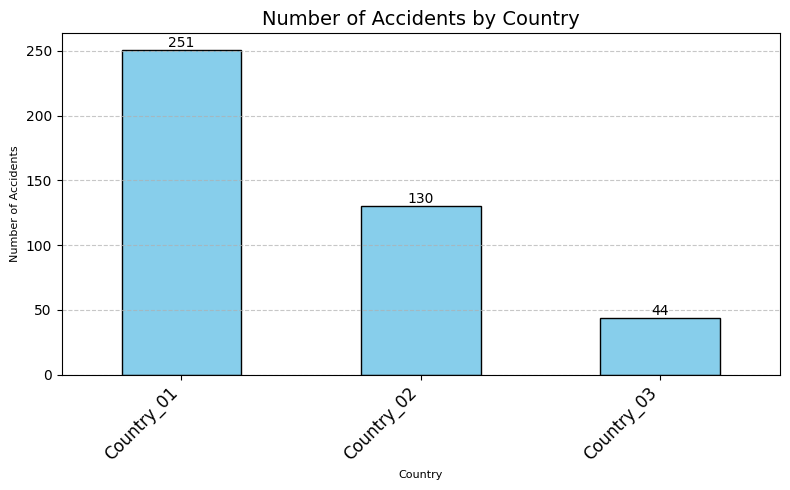

In [ ]:
# 1. Total number of accidents by country
plt.figure(figsize=(8, 5))
ax=df['COUNTRIES'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Accidents by Country', fontsize=14)
plt.xlabel('Country', fontsize=8)
plt.ylabel('Number of Accidents', fontsize=8)

# X-axis labels rotated and aligned
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)


for p in ax.patches:  # Navigate each column
    height = p.get_height()  # height of column
    if height > 0:  # If the value is greater than 0, write
        ax.annotate(f'{int(height)}',  # Write the value in integer format
                    (p.get_x() + p.get_width() / 2, height),  # Post location
                    ha='center', va='bottom',  # Align text
                    fontsize=10, color='black')  # Font style

plt.tight_layout()
plt.show();

<Figure size 2500x1200 with 0 Axes>

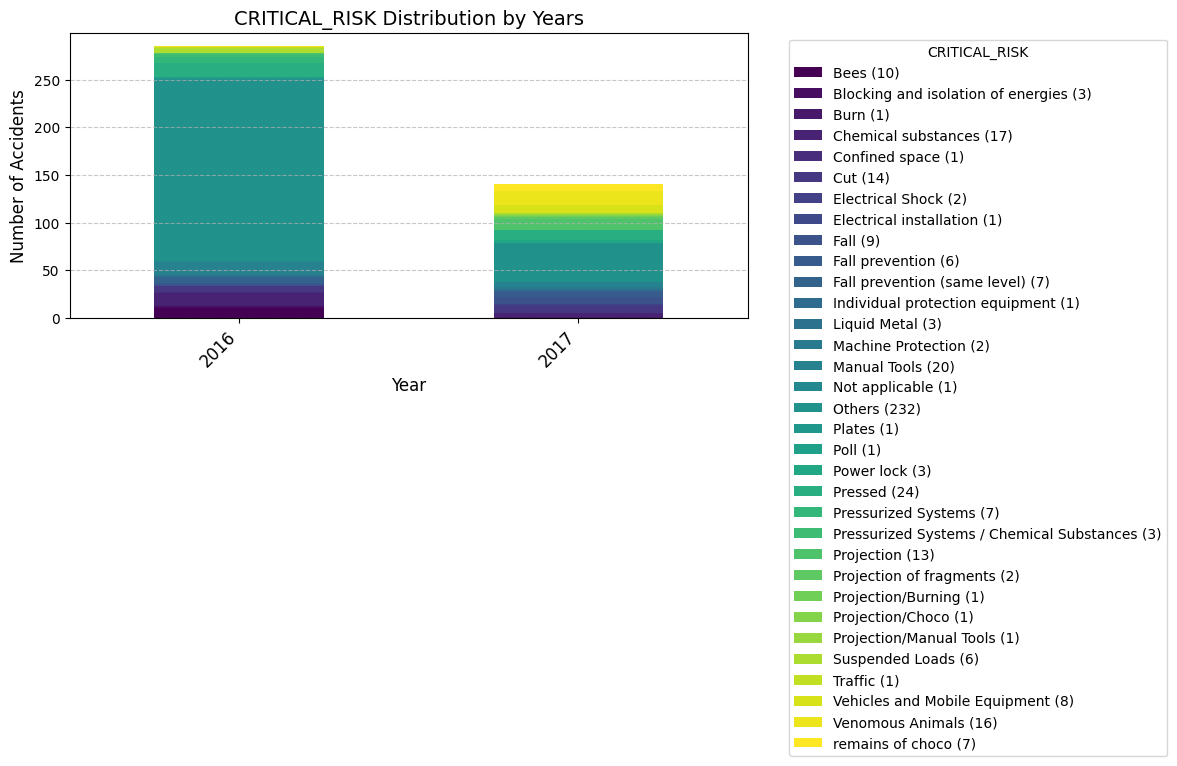

In [ ]:
# 2. CRITICAL_RISKs by year
plt.figure(figsize=(25,12))
yearly_critical_risk = df.groupby(['YEAR', 'CRITICAL_RISK']).size().unstack()
ax=yearly_critical_risk.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title('CRITICAL_RISK Distribution by Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

risk_totals = yearly_critical_risk.sum(axis=0)
labels = [f'{risk} ({int(count)})' for risk, count in risk_totals.items()]
plt.legend(labels,title='CRITICAL_RISK', bbox_to_anchor=(1.05, 1), loc='upper left')

# X-axis labels rotated and aligned
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show();

Okay, let's analyze the stacked bar graph, "CRITICAL_RISK Distribution by Years":

**Observations by Year:**

*   **2016:**
    *   **High Total:** A higher total number of accidents compared to 2017.
    *   **Dominated by "Others":** The "Others" risk type (teal color) has the largest contribution to the total accidents in 2016.
*   **2017:**
    *   **Lower Total:** A lower total number of accidents compared to 2016.
    *   **"Others" Still Significant:** The "Others" risk type still contributes significantly, but its dominance is slightly reduced.

**Observations by Risk Type (across both years):**

*   **"Others":**
    *   **Largest Contributor:** The "Others" category is the largest contributor to the overall risk in both years.
* **Top Contributers:**
   * Manual tools, pressed, fall prevention

**Inferences and Potential Questions:**

*   **Trend Analysis:** A decrease in overall accident rates from 2016 to 2017 is a positive. The question is "Why and How?"
*   **The continued Dominance of "Others":** The category needs to be further analysed
*   **What Happened?** There may have been key events such as a policy shift.

In summary, the stacked bar graph shows a decrease in overall critical risk incidents from 2016 to 2017, with the "Others" category contributing the most. A need for further analysis is still required, but policy shifts, more resources, and overall risk awareness seems to have played a role.


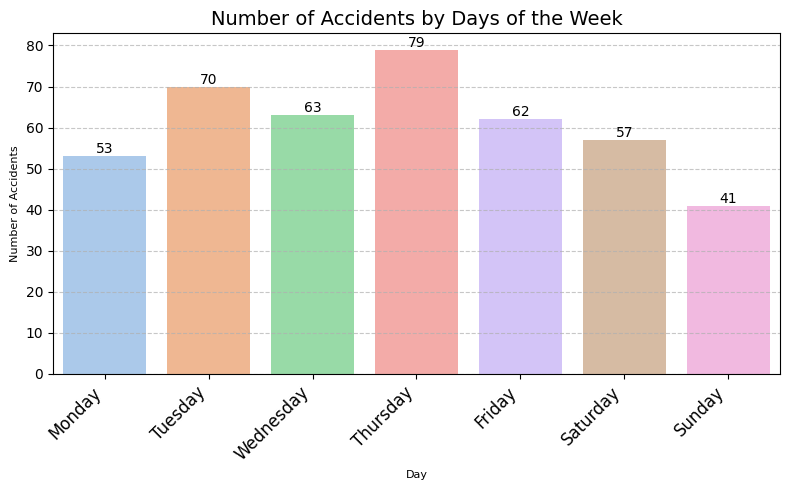

In [ ]:
import seaborn as sns
# 3. Accident analysis by days
plt.figure(figsize=(8, 5))
ax=sns.countplot(data=df, x='WEEKDAY', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='pastel')
plt.title('Number of Accidents by Days of the Week', fontsize=14)
plt.xlabel('Day', fontsize=8)
plt.ylabel('Number of Accidents', fontsize=8)

# X-axis labels rotated and aligned
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:  # Navigate each column
    height = p.get_height()  # height of column
    if height > 0:  # If the value is greater than 0, write
        ax.annotate(f'{int(height)}',  # Write the value in integer format
                    (p.get_x() + p.get_width() / 2, height),  # Post location
                    ha='center', va='bottom',  # Align text
                    fontsize=10, color='black')  # Font style

plt.tight_layout()
plt.show();

Okay, here's an analysis of the bar graph "Number of Accidents by Days of the Week":
 **Accidents by day**: Represents the accident count per day.

**Observations by Day:**

*   **Thursday is Highest**: Thursday has the highest number of accidents (79).
*   **Tuesday is Second Highest**: Tuesday has the second highest number of accidents (70).
*   **Sunday is Lowest**: Sunday has the lowest number of accidents (41).
*   **Weekdays Generally Higher:** The weekdays (Monday-Friday) generally have a higher number of accidents compared to the weekend (Saturday and Sunday).

**Inferences and Potential Questions:**

*   **Why Thursday?**: Understanding the specific activities and factors that contribute to the higher accident rate on Thursdays is crucial.
*   **Worker Fatigue** Due to a build up in the week, workers are at risk of injury.
*   **Differences in Staffing on Sundays** There may be only key employees present on Sundays meaning that they are trained to prevent problems, or are at less of a risk for the accidents shown.
*   **Time of Day Analysis** Further time-of-day breakdowns of each day of the week.
*   **Further data** Combining the data with other graphs is useful.

In summary, the bar graph highlights that Thursday sees the most accidents, and then the accidents decline into the weekend. A key to prevention will be to know why accidents on Thrusdays and Tuesdays are occurring.


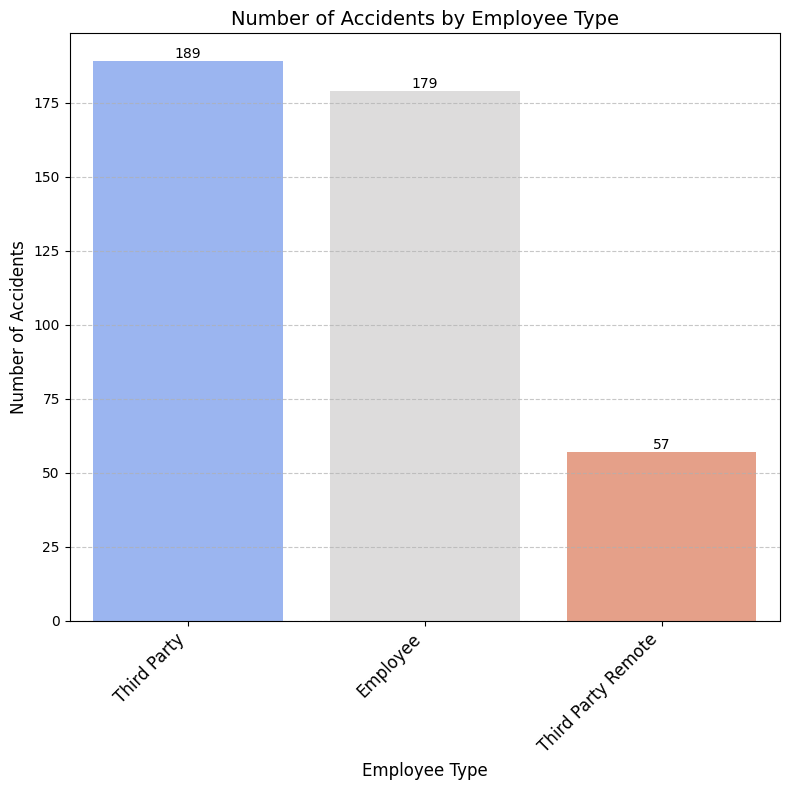

In [ ]:
# 5. Number of Accidents by Employee Type
plt.figure(figsize=(8, 8))
ax=sns.countplot(data=df, x='EMPLOYEE_TYPE', palette='coolwarm')
plt.title('Number of Accidents by Employee Type', fontsize=14)
plt.xlabel('Employee Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
# X-axis labels rotated and aligned
plt.xticks(rotation=45, ha='right', fontsize=12)
# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:  # Navigate each column
    height = p.get_height()  # height of column
    if height > 0:  # If the value is greater than 0, write
        ax.annotate(f'{int(height)}',  # Write the value in integer format
                    (p.get_x() + p.get_width() / 2, height),  # Position of text
                    ha='center', va='bottom',  # Align text
                    fontsize=10, color='black')  # Font style
plt.tight_layout()
plt.show();

**Insights:**
1. 189 Third Party Employees have faced high accidents. it Can be possible for training issues and working on onsite without proper trainings or Instruments.
2. 179 Employee on Role and onsite Faced second highest accidents. Which Shows need improvement in training and safety measures. As per Analysis it Showing onsite Employees faced more accidents.
3. Remote Employees Faced Less accidents which is 57.

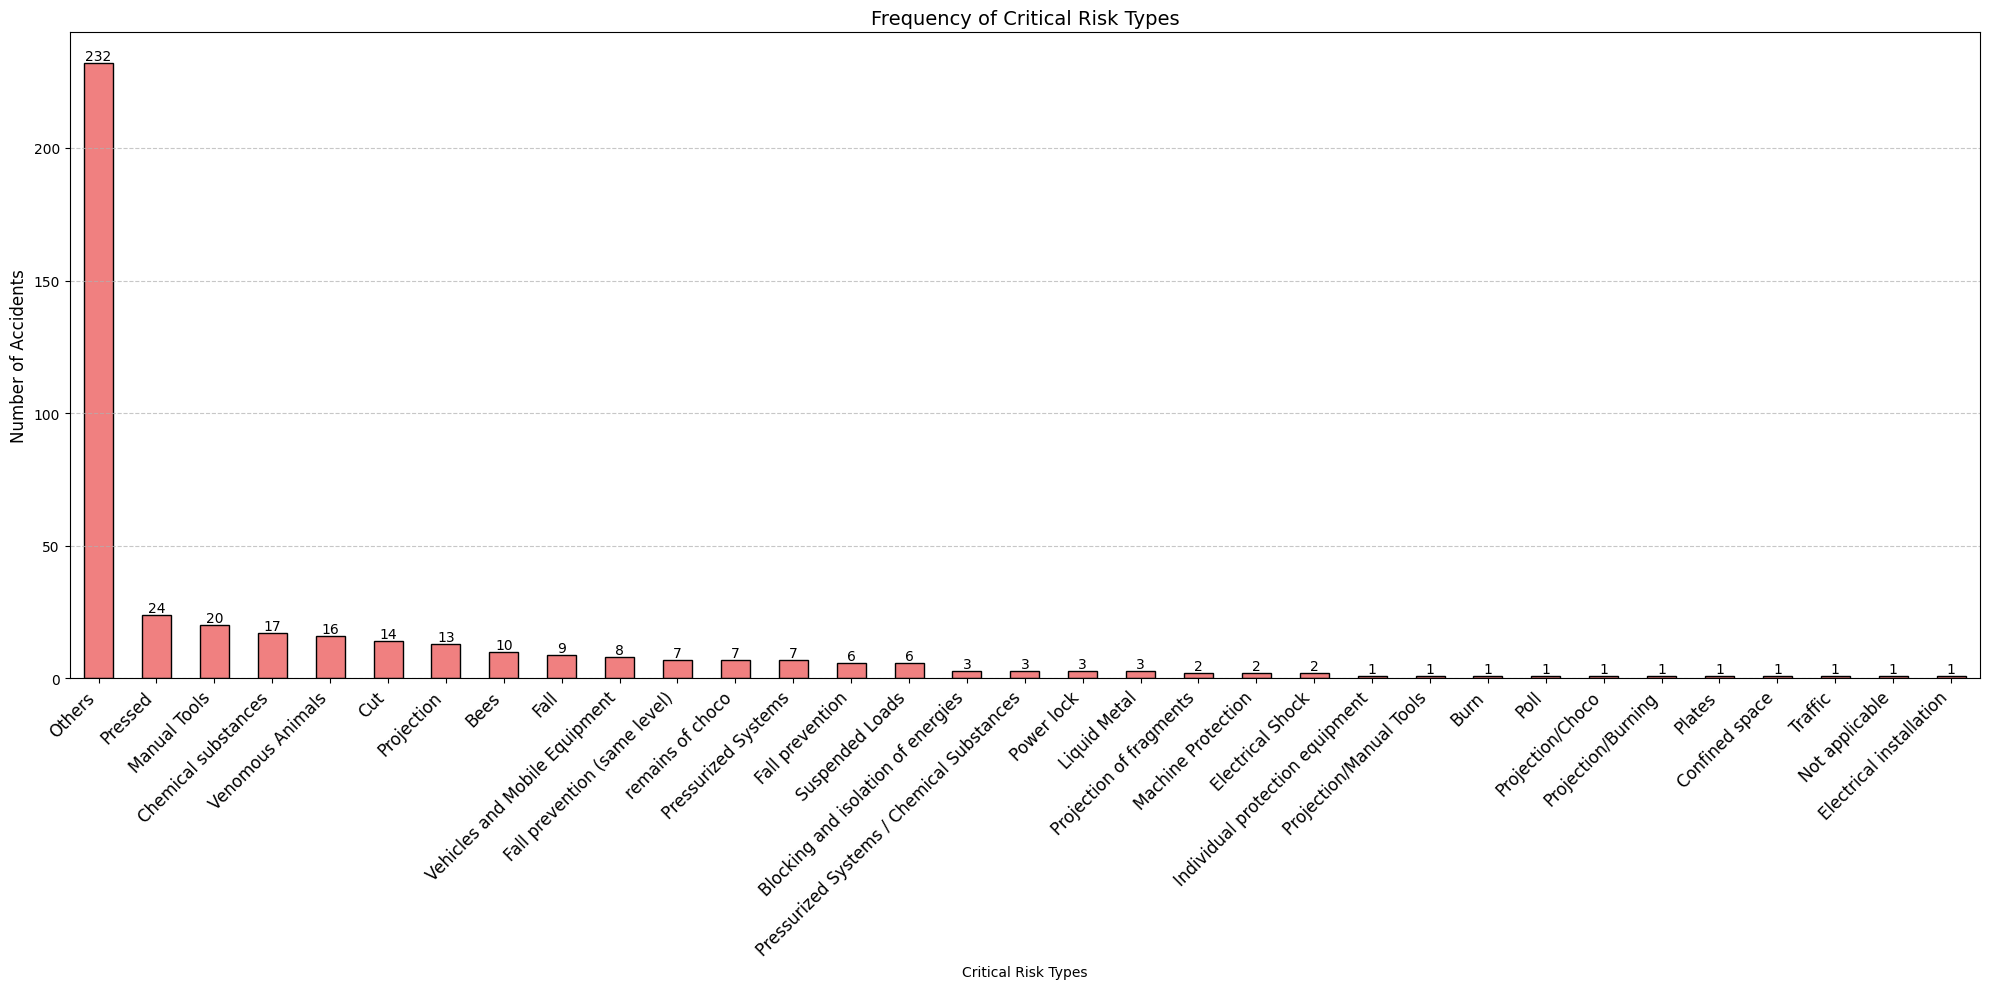

In [ ]:
# Code to Plot Frequency of Critical Risk Types
plt.figure(figsize=(20,10))
ax=df['CRITICAL_RISK'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Frequency of Critical Risk Types', fontsize=14)
plt.xlabel('Critical Risk Types', fontsize=10)
plt.ylabel('Number of Accidents', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black')
plt.tight_layout()
plt.show();

Okay, let's analyze the bar graph, "Frequency of Critical Risk Types":


**Observations by Risk Type:**

*   **"Others":**
    *   **By far the most common:** Accounts for 232 accidents.
*   **Pressed:** Pressing tools can cause around 24 injuries.
*   **Significant Drop-Off:** After "Others," there is a steep decline in the number of accidents for all other risk types.
*   **Manual tools:** Accidents related to Manual Tools is at 20.

**Inferences and Potential Questions:**

*   **Further Categorization Needed:** This data once again highlights the urgent need to break down the "Others" category into more specific and actionable risk types.
*   **What does “Others” entail?** The scale is far too large and does not have clear description.
*   **Are resources being allocated properly?** Because "Others" accounts for the vast majority of incidents, it indicates it is lacking enough attention and/or resource management, or is not an issue that is being effectively taken care of.

In summary, the bar graph shows the number of accidents by the risk type, displaying "Others" as dominant. All other analysis requires knowing what falls under "Others", the overall lack of analysis creates a poorly defined environment where critical risk types are being accounted for in a singular spot.


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=25):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]


    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]


    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}\n")
    print(f'cat_cols: {len(cat_cols)}; {cat_cols}\n')
    print(f'num_cols: {len(num_cols)}; {num_cols}\n')
    print(f'cat_but_car: {len(cat_but_car)}; {cat_but_car}\n')
    print(f'num_but_cat: {len(num_but_cat)}; {num_but_cat}\n')

    return cat_cols, num_cols, cat_but_car, num_but_cat
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df,cat_th=5, car_th=10)

Observations: 425
Variables: 15

cat_cols: 9; ['COUNTRIES', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'WEEKDAY', 'SEASON', 'RISK_SEGMENT', 'YEAR']

num_cols: 3; ['DATE', 'POTENTIAL_ACCIDENT_LEVEL', 'MONTH']

cat_but_car: 3; ['LOCAL', 'CRITICAL_RISK', 'INCIDENT_DESCRIPTION']

num_but_cat: 1; ['YEAR']



            TARGET_MEAN  Count      Ratio
COUNTRIES                                
Country_01          251    251  59.058824
Country_02          130    130  30.588235
Country_03           44     44  10.352941




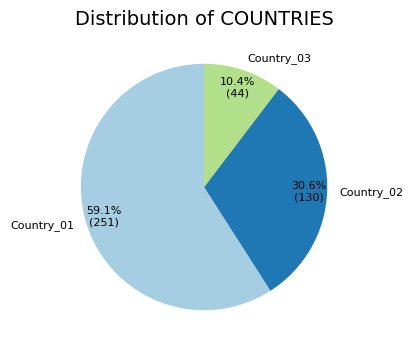

                 TARGET_MEAN  Count      Ratio
INDUSTRY_SECTOR                               
Metals                   134    134  31.529412
Mining                   241    241  56.705882
Others                    50     50  11.764706




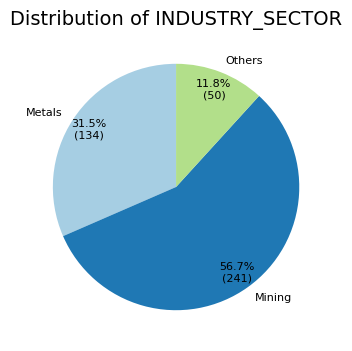

                TARGET_MEAN  Count      Ratio
ACCIDENT_LEVEL                               
1                       316    316  74.352941
2                        40     40   9.411765
3                        31     31   7.294118
4                        30     30   7.058824
5                         8      8   1.882353




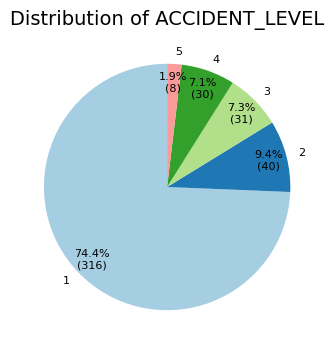

        TARGET_MEAN  Count      Ratio
GENDER                               
Female           22     22   5.176471
Male            403    403  94.823529




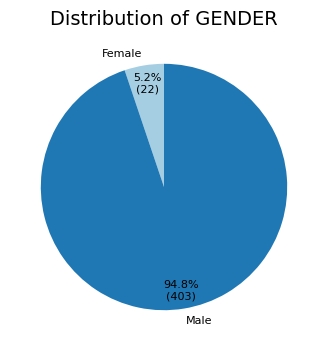

                    TARGET_MEAN  Count      Ratio
EMPLOYEE_TYPE                                    
Employee                    179    179  42.117647
Third Party                 189    189  44.470588
Third Party Remote           57     57  13.411765




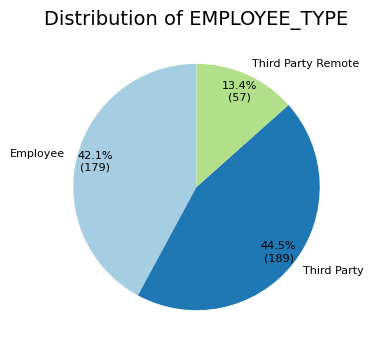

           TARGET_MEAN  Count      Ratio
WEEKDAY                                 
Friday              62     62  14.588235
Monday              53     53  12.470588
Saturday            57     57  13.411765
Sunday              41     41   9.647059
Thursday            79     79  18.588235
Tuesday             70     70  16.470588
Wednesday           63     63  14.823529




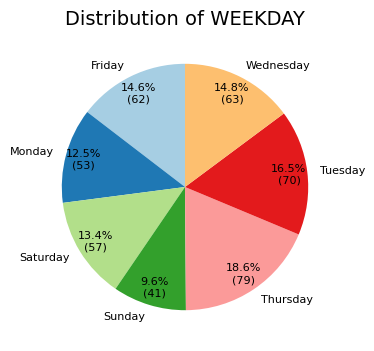

        TARGET_MEAN  Count      Ratio
SEASON                               
Autumn          146    146  34.352941
Spring           58     58  13.647059
Summer          125    125  29.411765
Winter           96     96  22.588235




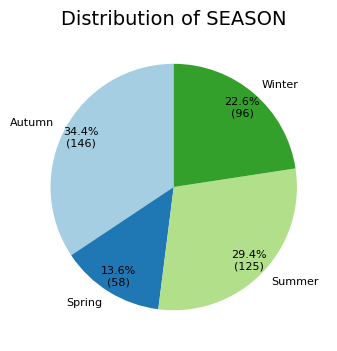

              TARGET_MEAN  Count      Ratio
RISK_SEGMENT                               
1                     316    316  74.352941
2                      40     40   9.411765
3                      31     31   7.294118
4                      30     30   7.058824
5                       8      8   1.882353




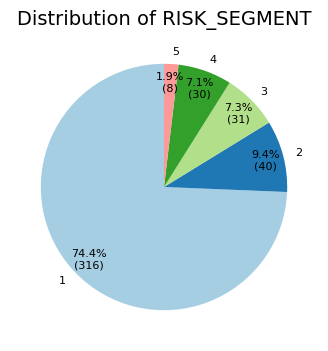

      TARGET_MEAN  Count      Ratio
YEAR                               
2016          285    285  67.058824
2017          140    140  32.941176




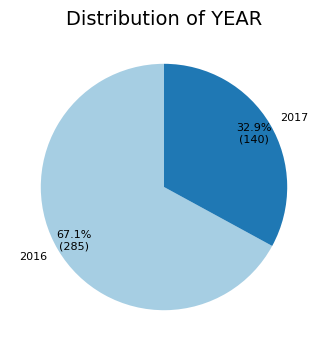

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'low_risk',              # 11, 12, 21, 22
    r'[1-2][3-4]': 'medium_risk',           # 13, 14, 23, 24
    r'[1-2][5-6]': 'critical_risk',         # 15, 16, 25, 26
    r'3[1-3]': 'high_alert',                # 31, 32, 33
    r'3[4-6]': 'severe_attention',          # 34, 35, 36
    r'4[1-2]': 'rising_concern',            # 41, 42
    r'4[3-4]': 'potential_threats',         # 43, 44
    r'4[5-6]': 'very_high_risk',            # 45, 46
    r'5[1-2]': 'new_issues',                # 51, 52
    r'5[3-4]': 'critical_threat',           # 53, 54
    r'5[5-6]': 'fatal_error'}                # 55, 5

# Convert 'ACCIDENT LEVEL' to string before applying regex
df['ACCIDENT_LEVEL'] = df['ACCIDENT_LEVEL'].astype(str)

# Apply the replace operation
df['RISK_SEGMENT'] = df['ACCIDENT_LEVEL'].replace(seg_map, regex=True)
# Target-Categoric Analysis
def target_summary_with_cat(dataframe, target, categorical_col,plot=False):
    targey_sum_cat=pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].count(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)})

    print(targey_sum_cat, end="\n\n\n")

    if plot:
        # Data for pie chart
        labels = targey_sum_cat.index
        sizes = targey_sum_cat["Count"]

        # Special autopct format function
        def autopct_format(pct, all_vals):
            total = sum(all_vals)
            count = int(round(pct * total / 100.0))
            return f'{pct:.1f}%\n({count})'

        fig, ax = plt.subplots(figsize=(4,4))
        wedges, texts, autotexts = ax.pie(
            sizes, labels=labels, startangle=90,
            autopct=lambda pct: autopct_format(pct, sizes),
            textprops={'fontsize': 8}, pctdistance=0.85,
            colors=plt.cm.Paired.colors)

        # Chart title
        plt.title(f'Distribution of {categorical_col}', fontsize=14)
        plt.show()
for col in cat_cols:
    target_summary_with_cat(df, "CRITICAL_RISK", col,  plot=True)

**Here's an analysis of the graph, along with insights and recommendations:**

**Overall Summary**

The graph illustrates the number of incidents associated with various discrete risks across different accident levels. It provides a visual representation of which risks are most prevalent and at what severity levels.

**Key Observations and Insights**

*   **Dominant Risks:** "Bees" and "Pressurized Systems" have the highest number of incidents, particularly at accident level 1. "Chemical substances" and "remains of choco" also show a significant number of incidents.
*   **Accident Level Distribution:** Accident level 1 appears to be the most frequent across most risk categories. This suggests that many incidents are of lower severity.
*   **Risk-Specific Patterns:**
    *   Some risks, like "Machine Protection" and "Power lock," have incidents primarily at higher accident levels (4 and 5). This indicates that when these risks manifest, they tend to result in more severe outcomes.
    *   Other risks, like "Burn" and "Cut," have incidents spread across multiple accident levels, suggesting a range of severity depending on the specific circumstances.
*   **Potential Correlations:** There might be correlations between certain risks. For example, "Pressurized Systems / Chemical Substances" could be related to incidents involving "Chemical substances." Further investigation is needed to confirm these relationships.

**Recommendations**

1.  **Prioritize Risk Mitigation:** Focus on mitigating the risks associated with "Bees," "Pressurized Systems," "Chemical substances" and "remains of choco" due to their high frequency of incidents. Implement control measures to reduce the likelihood and severity of these events.

2.  **Investigate High-Severity Risks:** Conduct thorough investigations into incidents involving "Machine Protection" and "Power lock" to understand the root causes and implement targeted preventive measures.

3.  **Refine Risk Assessment:** Review and refine the risk assessment process to ensure it accurately captures the potential severity of different risks. Consider using a risk matrix that incorporates both likelihood and consequence.

4.  **Enhance Training and Awareness:** Provide comprehensive training to employees on the identification, prevention, and management of all identified risks. Emphasize the importance of reporting incidents, even those with low severity, to facilitate continuous improvement.

5.  **Improve Data Collection and Analysis:** Implement a robust data collection system to track incidents, near misses, and other safety-related events. Analyze the data regularly to identify trends, patterns, and emerging risks.

6.  **Implement Control Measures:**
    *   **Engineering Controls:** Implement physical barriers, safety devices, and other engineering controls to minimize the risk of exposure to hazards.
    *   **Administrative Controls:** Develop and enforce safe work procedures, permit-to-work systems, and other administrative controls to manage risks.
    *   **Personal Protective Equipment (PPE):** Ensure that employees have access to and use appropriate PPE to protect themselves from hazards.

7.  **Regular Audits and Inspections:** Conduct regular audits and inspections to verify the effectiveness of control measures and identify any gaps or deficiencies.

8.  **Continuous Improvement:** Foster a culture of continuous improvement by encouraging employees to report hazards, participate in safety initiatives, and provide feedback on safety procedures.

**Specific Recommendations Based on the Graph**

*   **Bees:** Implement measures to prevent bee stings, such as relocating hives, using repellents, and providing training on how to avoid attracting bees.
*   **Pressurized Systems:** Ensure that pressurized systems are properly maintained, inspected, and operated. Implement procedures for safely depressurizing systems before maintenance or repair.
*   **Chemical Substances:** Implement strict controls on the storage, handling, and use of chemical substances. Provide training on chemical safety and ensure that employees have access to appropriate PPE.
*   **Remains of choco:** Implement measures to prevent the accumulation of choco remains, such as regular cleaning and maintenance.

By implementing these recommendations, organizations can create a safer work environment and reduce the risk of accidents and injuries.


#**Bivariate Analysis:**

Bivariate analysis helps to explore relationships between pairs of variables, which could uncover how they interact with each other. We’ll examine:

- Accident Level vs Industry Sector
- Accident Level vs Gender
- Accident Level vs Critical Risk
- Employee/Third Party vs Gender
- Accident Level vs Critical Risk

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Accident Level by Industry Sector')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Industry Sector')

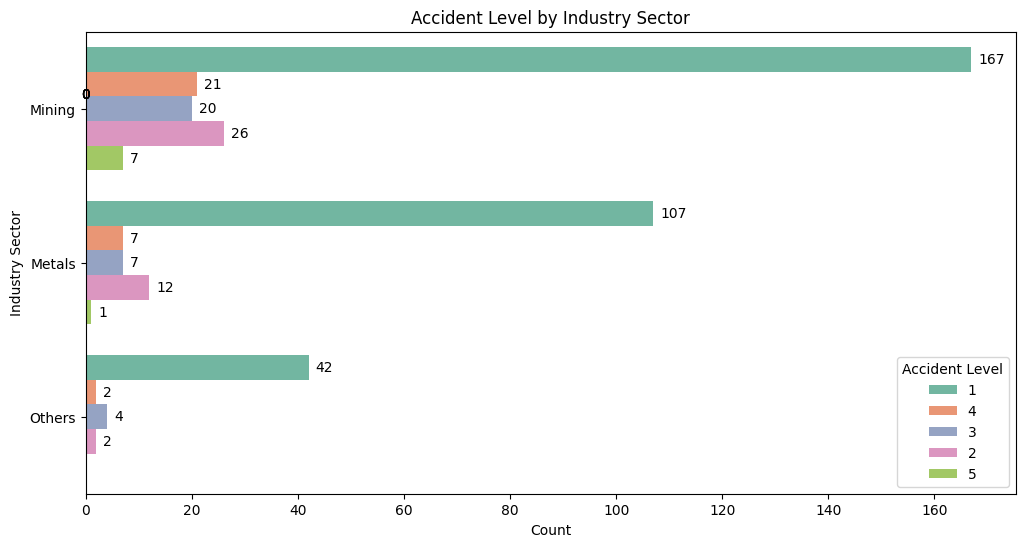

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Accident Level by Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

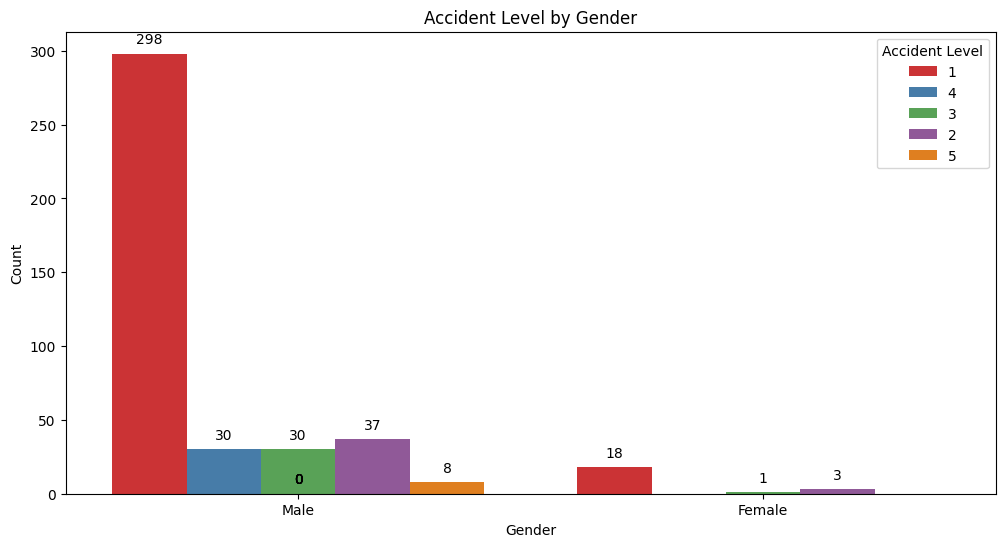

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Accident Level by Critical Risk')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Critical Risk')

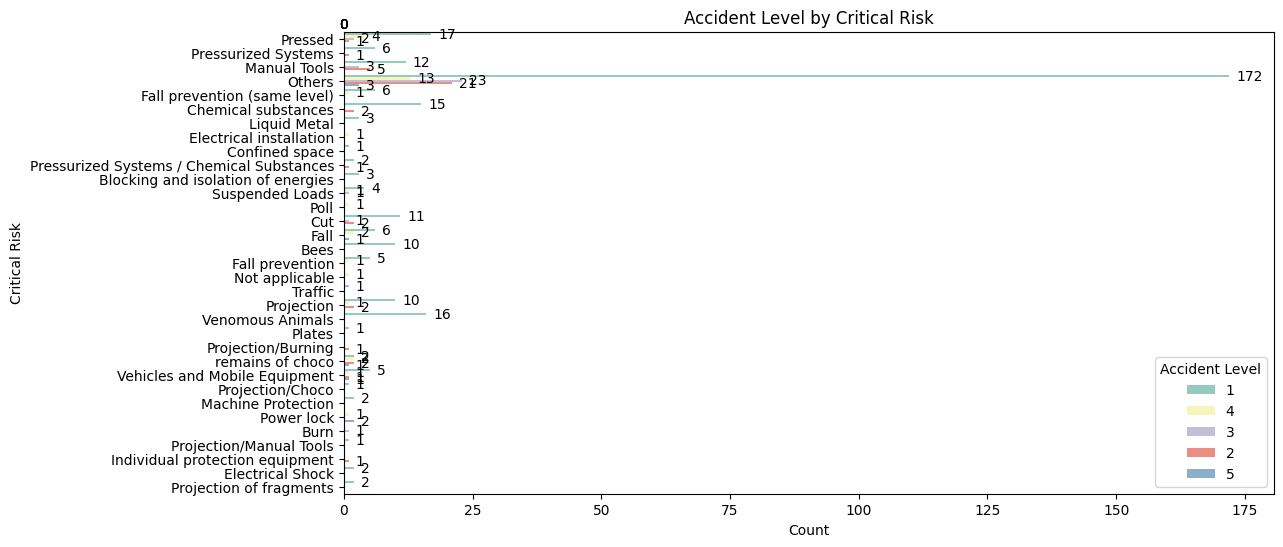

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Accident Level by Employee or Third Party')

Text(0.5, 0, 'Employee or Third Party')

Text(0, 0.5, 'Count')

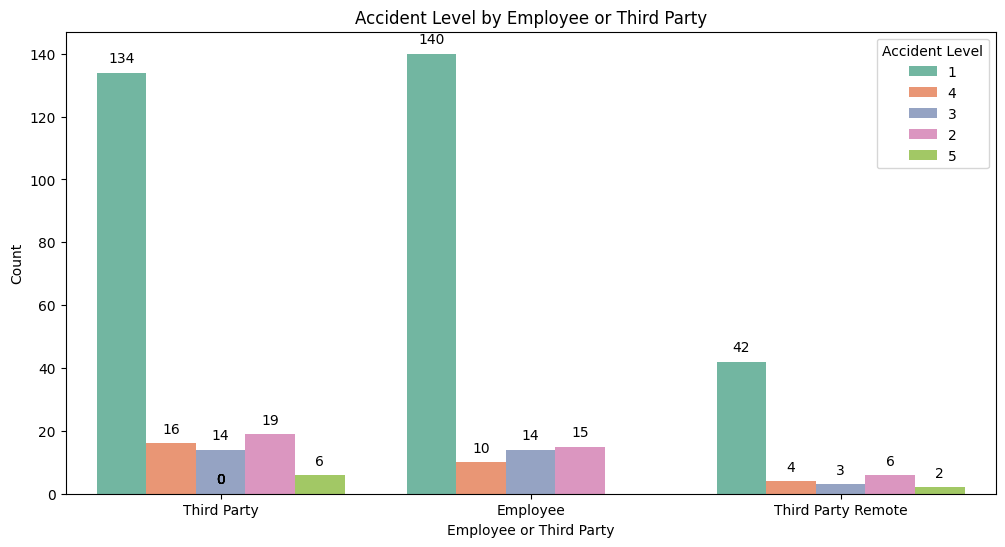

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to annotate data labels on bars
def annotate_bars(ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        if width > height:  # horizontal bars
            ax.annotate(f'{int(width)}', (x + width, y + height / 2), xytext=(5, 0),
                        textcoords='offset points', ha='left', va='center')
        else:  # vertical bars
            ax.annotate(f'{int(height)}', (x + width / 2, y + height), xytext=(0, 5),
                        textcoords='offset points', ha='center', va='bottom')

# 1. Accident Level vs Industry Sector
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=df['INDUSTRY_SECTOR'], hue=df['ACCIDENT_LEVEL'], palette='Set2')
annotate_bars(ax)
plt.title('Accident Level by Industry Sector')
plt.xlabel('Count')
plt.ylabel('Industry Sector')
plt.legend(title='Accident Level')
plt.show()

# 2. Accident Level vs Gender
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['GENDER'], hue=df['ACCIDENT_LEVEL'], palette='Set1')
annotate_bars(ax)
plt.title('Accident Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Accident Level')
plt.show()

# 3. Accident Level vs Critical Risk
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=df['CRITICAL_RISK'], hue=df['ACCIDENT_LEVEL'], palette='Set3')
annotate_bars(ax)
plt.title('Accident Level by Critical Risk')
plt.xlabel('Count')
plt.ylabel('Critical Risk')
plt.legend(title='Accident Level')
plt.show()

# 4. Accident Level vs Employee/Third Party
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['EMPLOYEE_TYPE'], hue=df['ACCIDENT_LEVEL'], palette='Set2')
annotate_bars(ax)
plt.title('Accident Level by Employee or Third Party')
plt.xlabel('Employee or Third Party')
plt.ylabel('Count')
plt.legend(title='Accident Level')
plt.show()


**Insights and Analysis:**


**Dominant Risks:**

**Pressed:** This category has the highest number of accidents, particularly for "Third Party" employees. This suggests a significant safety concern related to pressing operations.
Pressurized Systems/Chemical Substances: This also shows a high number of accidents, again predominantly for "Third Party" employees. This points to potential inadequacies in handling pressurized systems and chemical substances.

**Fall Prevention (same level):**
This category shows a notable number of accidents across all employee types, indicating a general risk of falls on the same level.
Employee Type Disparities:

**Third Party Employees:** They consistently experience the highest number of accidents across most risk categories. This highlights the need for focused safety training and protocols for third-party contractors.

**Employees:** Show a moderate number of accidents, indicating that internal safety measures might need improvement.

**Remote Employees:** Generally have fewer accidents, which is expected given their likely non-operational roles. However, it's worth noting that they are still involved in some risk categories, suggesting potential indirect exposure.

**Specific Risk Observations:**

Manual Tools, Chemical Substances, Liquid Metal, Electrical Installation, Blocking and isolation of energies, Confined Space, Suspended Loads, Poll, Cut, Fall, Bees, Not Applicable, Traffic, Venomous Animals, Plates, Projection/Burning, Vehicles and Mobile Equipment, Projection/Choco, Machine Protection, Burn, Power Lock, Projection/Manual Tools, Electrical Shock, Individual protection equipment, Projection of fragments: These categories show varying levels of risk across employee types. Some have minimal accidents, while others have more significant numbers.

**Actionable Recommendations:**

**Targeted Safety Training:** Develop and implement rigorous safety training programs specifically tailored for "Third Party" employees, focusing on the high-risk areas identified (Pressed, Pressurized Systems, Chemical Substances).

**Risk Assessments:** Conduct thorough risk assessments for each identified risk category, especially those with high accident rates.
Enhanced Supervision: Increase supervision and monitoring of "Third Party" employees in high-risk areas.

**Equipment Maintenance:** Ensure regular maintenance and safety checks of equipment and machinery, particularly those involved in pressing and pressurized systems.

**Fall Prevention Measures:** Implement comprehensive fall prevention measures, including proper signage, barriers, and safety equipment.

**Communication:** Improve communication about safety protocols and procedures across all employee types.

**Incident Investigation:** Conduct thorough investigations into all accidents to identify root causes and implement corrective actions.

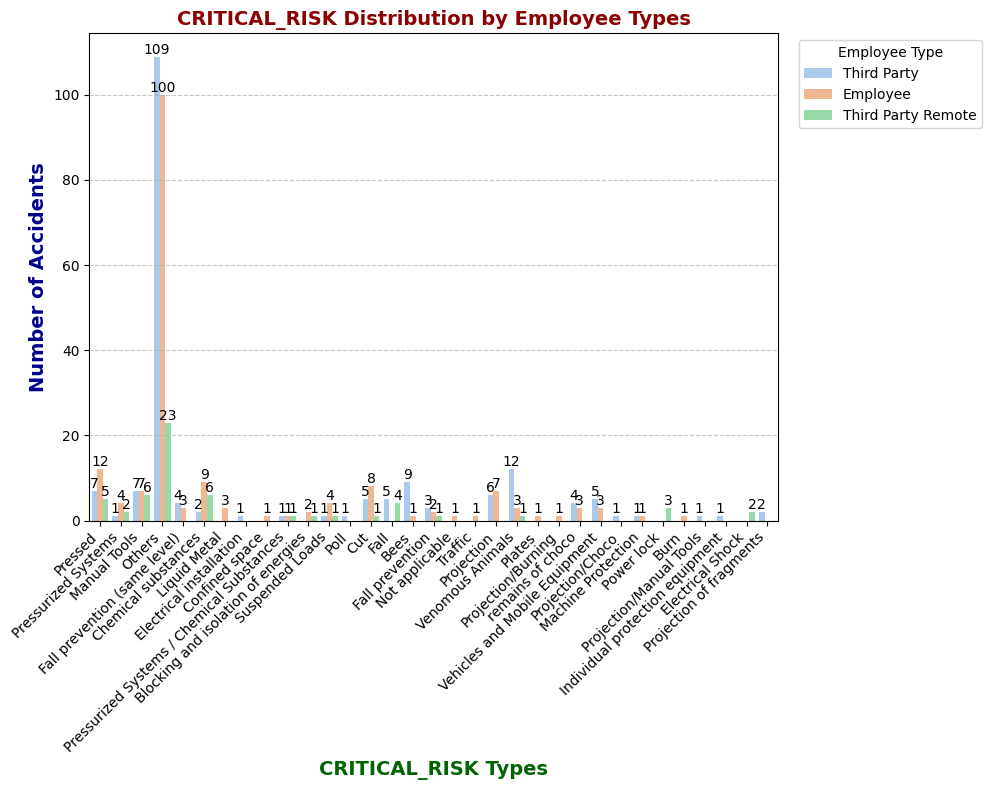

In [ ]:
# 2. CRITICAL_RISK Distribution by Employee Types
plt.figure(figsize=(10,8))  # Width and height increased

# countplot visualizing the count
ax=sns.countplot(data=df,
              x='CRITICAL_RISK',
              hue='EMPLOYEE_TYPE',
              palette='pastel')

# Title and axis labels edited
plt.title('CRITICAL_RISK Distribution by Employee Types', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('CRITICAL_RISK Types', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold', color='darkblue')

# (legend) moved out
plt.legend(title='Employee Type', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

# X-axis labels rotated and aligned
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:  # Navigate each column
    height = p.get_height()  # height of column
    if height > 0:  # If the value is greater than 0, write
        ax.annotate(f'{int(height)}',  # Write the value in integer format
                    (p.get_x() + p.get_width() / 2, height),  # Post location
                    ha='center', va='bottom',  # Align text
                    fontsize=10, color='black')  # Font style

# Edit the chart
plt.tight_layout()
plt.show();

Okay, I will analyze the bar graph, "CRITICAL_RISK Distribution by Employee Types" again.

**Overall Observations:**

*   **Title:** Provides context for the data represented in the diagram. The goal of the diagram is to break down critical risk for employee.
*   **Employee Types:** There are three types of Employees represented:
    *   Third Party
    *   Employee
    *   Third Party Remote
*   **Dominance of "Others":** "Others" has a significantly higher number of accidents compared to all other risk types for all employee categories.
*   **Vertical Axis:** The vertical axis represents the number of Accidents.
*   **X Axis:** Represents the types of CRITICAL_RISKs present.

**Observations by Risk Type:**

*   **"Others":**
    *   **Dominant Across All:** "Others" has the highest count of accidents, dwarfing all other categories.
    *   **Employee and Third Party Impacted Most:** Impacts employees the most.
*   **Pressed** Accidents that require a pressurized mechanism of some kind. Most dangerous for Third Party, Least Dangerous for employees.
*   **Liquid Substance** This category is high risk for Employees and not as dangerous for third party.
*   **Manual Tools** Accidents with manual tools are more dangerous for Employees than third parties.

**Observations by Employee Type:**

*   **Employees**: Are at biggest danger with Liquid Substances, Chemical substances, Manual tools, pressed and falls from the same level.
*   **Third Party**: Is biggest dangers are falls from the same level, Others, Manual Tools, and pressed
*   **Third Party Remote:** Overall are not as dangerous in terms of workplace violence.

**Inferences and Potential Questions:**

*   **Breakdown "Others":** The high number of "Others" accidents suggests a need to further categorize and understand the risks encompassed within this category.
*   **Root Cause Analysis:** A deeper investigation into the reasons behind the high incidence of "Others" accidents is necessary to develop effective prevention strategies.
*   **Disparities by Employee Type:** Investigate the reasons behind the differing risk profiles for each employee type.
*   **Re-Evaluate Categories:** Do the categories adequately reflect the types of risks present? Are any risk types missing?
*   **Data Reliability:** Are the accident reporting systems consistent and reliable across all employee types and sectors?

In summary, this bar graph highlights the distribution of critical risks by employee type, with "Others" emerging as the dominant risk category. More detailed categorization of risks and further investigation are needed to develop targeted prevention strategies and ensure a safer work environment for all employee types.


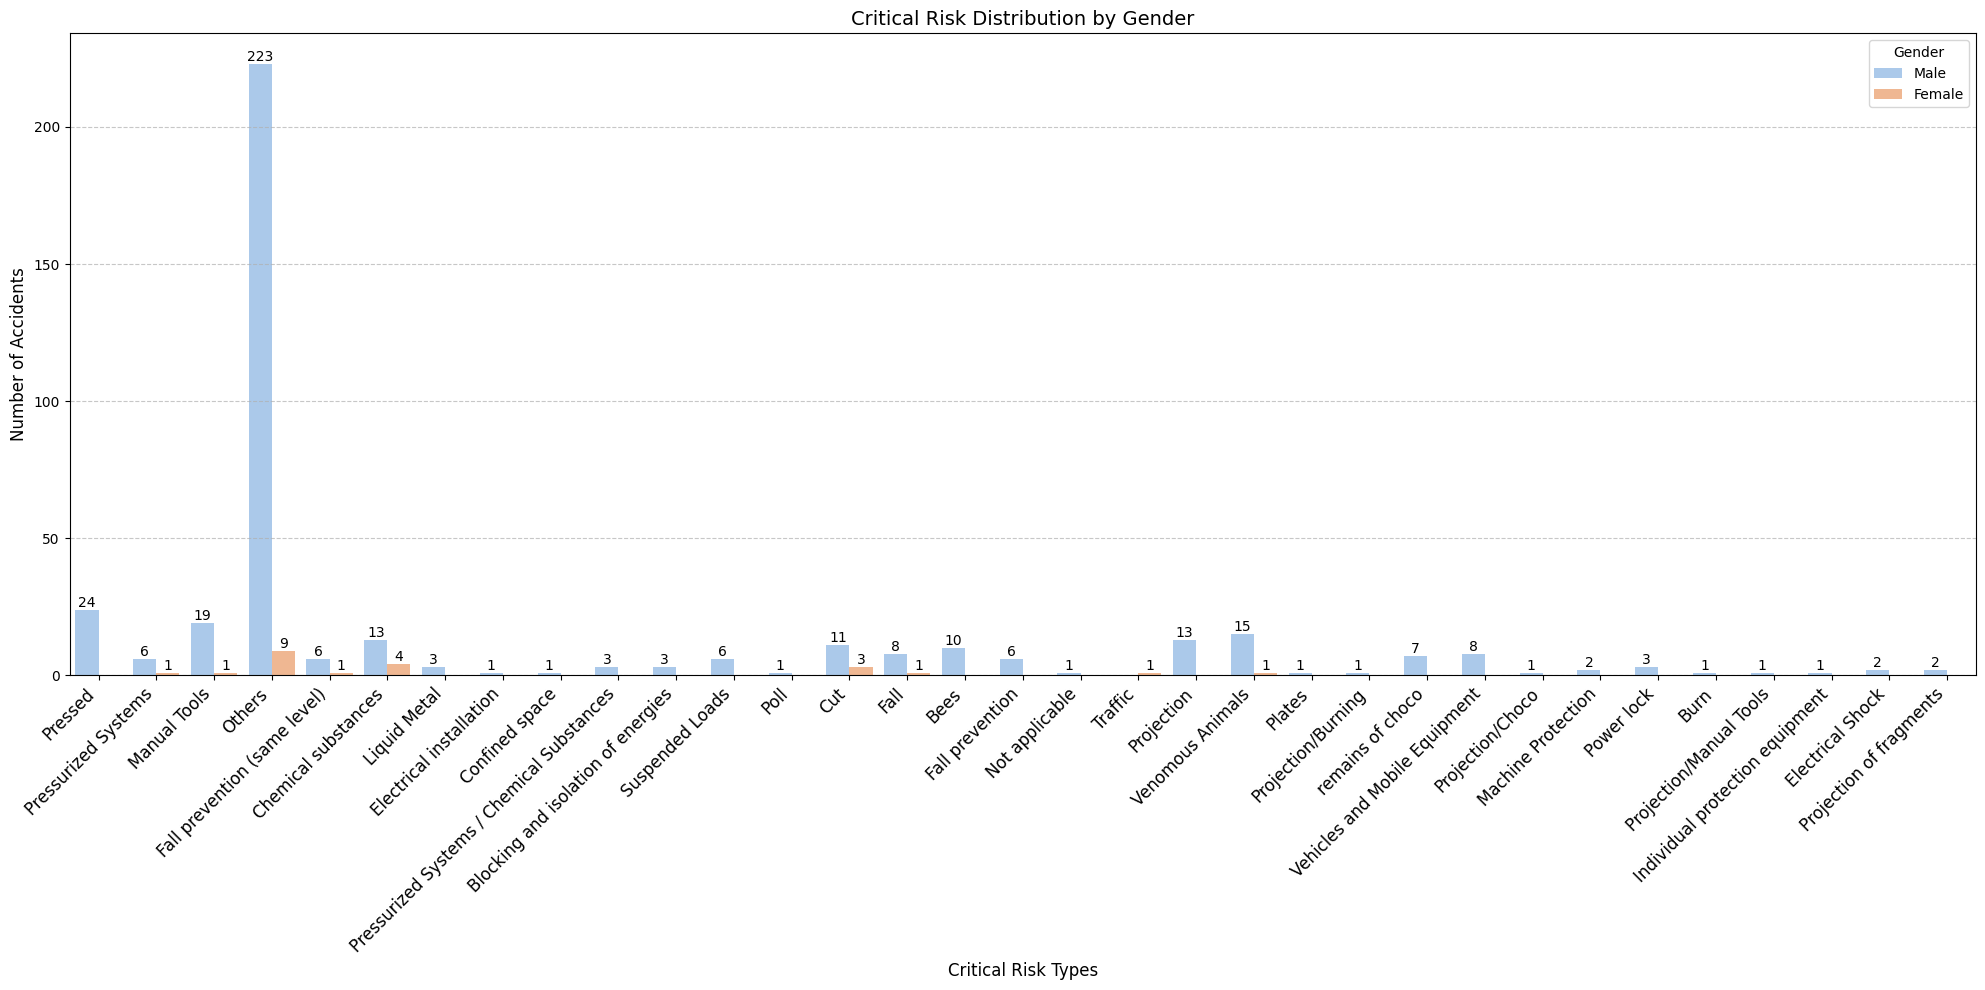

In [ ]:
# 3. Critical Risk Distribution By Gender
plt.figure(figsize=(20,10))
ax=sns.countplot(data=df, x='CRITICAL_RISK', hue='GENDER', palette='pastel')
plt.title('Critical Risk Distribution by Gender', fontsize=14)
plt.xlabel('Critical Risk Types', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Gender', loc='upper right')


plt.xticks(rotation=45, ha='right', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black')
plt.tight_layout()
plt.show();

Here's an analysis of the bar graph, "Critical Risk Distribution by Gender":

**Observations by Risk Type:**

*   **"Others":**
    *   **Dominant for Males:** The "Others" category accounts for a significantly larger number of accidents for males (223) than for females (9).
    *   **Implies Gendered risk type:** There is a clear difference with which type of risk most effects each gender.

*   **Other Notable Risks (Males):**
    *   **Pressed:** 24 accidents
    *   **Manual Tools:** 19 accidents
    *   **Chemical Substances** Is much more relevant to males than females

*   **Other Notable Risks (Females)**
    *   **Fall prevention (Same level):** A much higher risk for women than men.
    *   **Cut and fall:** The next set of risks for females are low in impact.

**Inferences and Potential Questions:**

*   **Explanation for "Others" Dominance:** As with the previous graphs, the "Others" category warrants further investigation.
*   **Gendered Risk Factors:** Explore why certain risks disproportionately affect one gender.
*   **Type of jobs** The data is most likely skewed due to the jobs done by each of the genders, meaning most "others" and construction work is done by males, which explains the large gap between male and female.
*   **Occupational and Workplace Differences:** Investigate if there are differences in the types of jobs men and women perform.
*   **Training and PPE:** Evaluate the effectiveness of training programs and the availability/use of appropriate personal protective equipment (PPE) for both genders.
*   **Underlying factors:** Investigate the gender-specific underlying factors that influence workplace.

In summary, this bar graph highlights the distribution of critical risks by gender. The high number of accidents in the "Others" category for males suggests a need for more detailed risk categorization and tailored prevention strategies. Further research should explore the underlying factors that contribute to the observed differences in risk exposure between males and females to implement targeted interventions.


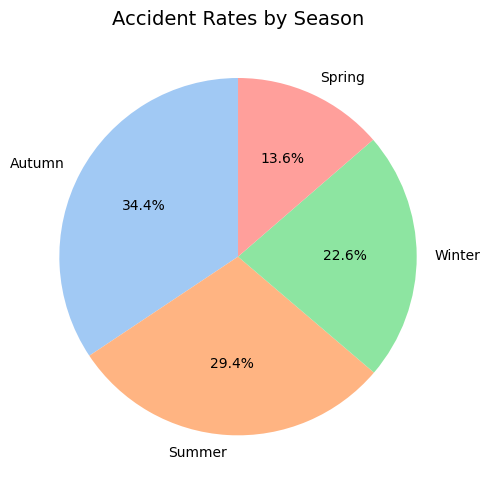

In [ ]:
# 4. Accident analysis on a seasonal basis
plt.figure(figsize=(6, 5))
df['SEASON'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax=plt.title('Accident Rates by Season', fontsize=14)
plt.ylabel('')  # Hide y axis
# X-axis labels rotated and aligned
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show();

**Insights:**


1.   In Spring Season 34.4% Accidents happened which is higher in all seasons
2.   In Winter 29.4% Accident Happened which is second highest season for accidents.
3. Third Highest season of accidents is Summer which is 22.6%.
4. In Autumn More less Accidents happened.



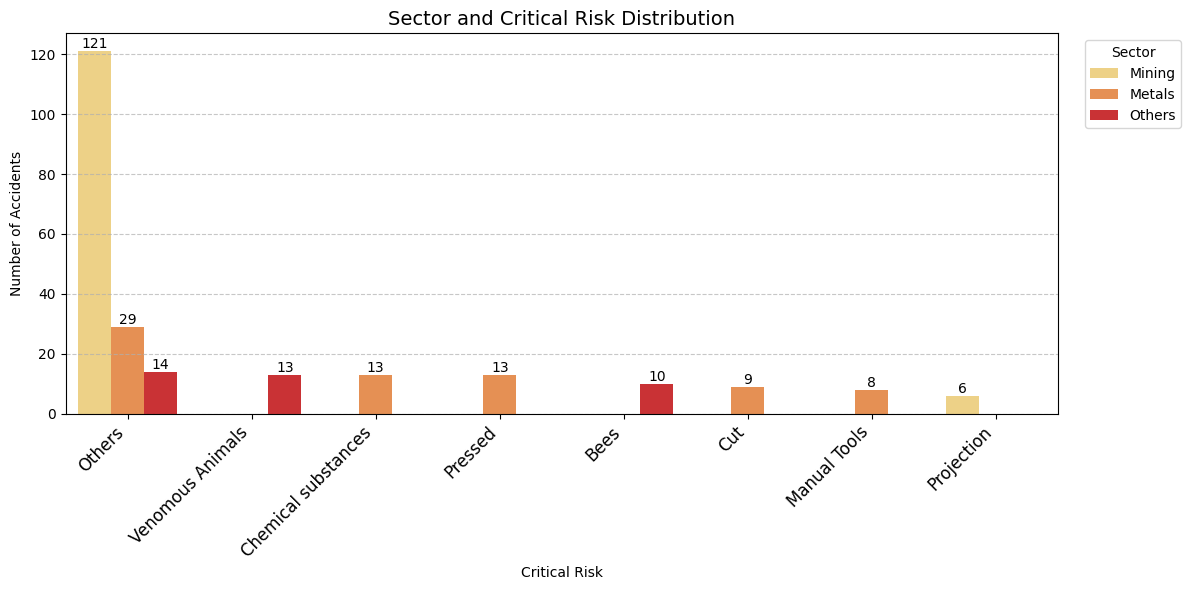

In [ ]:
pvt_lvl_df = df.groupby(['ACCIDENT_LEVEL', 'POTENTIAL_ACCIDENT_LEVEL']).size().unstack(fill_value=0) #Creating pvt_lvl_df from df
# Code to Identify Sector and Critical Risk Distribution
hot_areas = pvt_lvl_df[pvt_lvl_df > 40].stack().reset_index()
hot_areas.columns = ['ACCIDENT_LEVEL', 'POTENTIAL_ACCIDENT_LEVEL', 'VALUE']

hot_records = df.merge(
    hot_areas,
    left_on=['ACCIDENT_LEVEL', 'POTENTIAL_ACCIDENT_LEVEL'],
    right_on=['ACCIDENT_LEVEL', 'POTENTIAL_ACCIDENT_LEVEL'],
    how='inner'
)
sector_risk_summary = hot_records.groupby(['INDUSTRY_SECTOR', 'CRITICAL_RISK']).size().reset_index(name='COUNT')


sector_risk_summary = sector_risk_summary.sort_values(by='COUNT', ascending=False)

plt.figure(figsize=(12, 6))
ax=sns.barplot(
    data=sector_risk_summary.head(10),
    y='COUNT',
    x='CRITICAL_RISK',
    hue='INDUSTRY_SECTOR',
    palette='YlOrRd'
)
plt.title('Sector and Critical Risk Distribution', fontsize=14)
plt.ylabel('Number of Accidents')
plt.xlabel('Critical Risk')


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Sector', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom',
                    fontsize=10, color='black')

plt.tight_layout()
plt.show();

**Key Observations and Insights**

1.  **"Others" Risk Dominates:** The "Others" category has by far the highest number of accidents, primarily in the Mining sector. This suggests that there are a significant number of accidents that don't fall into the other defined risk categories. It's important to understand what constitutes "Others" to address these accidents effectively.

2.  **Mining Sector is Most Affected:** The Mining sector has a higher number of accidents across several critical risk categories compared to the Metals and Others sectors. This indicates that the Mining sector may have a higher risk profile or less effective safety measures.

3.  **Venomous Animals are a Significant Risk:** Venomous Animals are a notable risk, particularly in the "Others" sector. This suggests that there may be specific environments or activities where encounters with venomous animals are more likely.

4.  **Chemical Substances and Pressed Risks:** Chemical Substances and Pressed risks have a similar number of accidents, primarily in the Metals sector.

5.  **Bees, Cut, Manual Tools, and Projection Risks:** Bees, Cut, Manual Tools, and Projection risks have a relatively lower number of accidents compared to the other categories.

**Recommendations**

1.  **Investigate "Others" Category:** Conduct a detailed investigation into the "Others" category to identify the specific types of accidents that are occurring. Break down this category into more specific risk categories to better understand and address these accidents.

2.  **Focus on Mining Sector:** Prioritize safety improvements in the Mining sector. Conduct a thorough risk assessment to identify the specific hazards and risks that are contributing to the high number of accidents. Implement targeted safety measures to address these risks.

3.  **Address Venomous Animal Risk:** Develop and implement measures to reduce the risk of encounters with venomous animals. This may involve providing training on how to identify and avoid venomous animals, implementing control measures to prevent animals from entering work areas, and providing first aid for venomous animal bites.

4.  **Improve Chemical Safety:** Enhance chemical safety measures in the Metals sector. Ensure that employees are properly trained on the safe handling, storage, and use of chemical substances. Implement engineering controls to minimize the risk of exposure to chemicals.

5.  **Enhance Safety Procedures:** Review and enhance safety procedures for activities involving pressed materials. Ensure that employees are properly trained on the safe operation of equipment and the handling of materials.

6.  **Promote Risk Awareness:** Promote risk awareness among employees in all sectors. Encourage employees to report hazards, near misses, and other safety-related events.

7.  **Regularly Review and Update Risk Assessments:** Regularly review and update risk assessments to ensure that they accurately capture the current risk profile.

8.  **Monitor Trends:** Monitor trends in accident rates over time. Use this information to identify areas where safety performance is improving or declining.

**In summary, the graph highlights the importance of understanding the distribution of accidents across different critical risks and sectors. By implementing the recommendations above, organizations can create a safer work environment and reduce the risk of accidents and injuries.**


### Bivariate Analysis Key Insights:

- Accident Level vs Industry Sector: Check if certain sectors are more likely to have severe accidents.

- Accident Level vs Gender: Find out if there’s a relationship between accident severity and gender.

- Accident Level vs Critical Risk: Identify which critical risks correlate with more severe accidents.

- Accident Level vs Employee/Third Party: Understand if employees face different levels of accidents compared to third parties.

-  Accident Level by Industry Sector
Findings:
Certain industry sectors exhibit higher accident counts, suggesting specific sectors have higher risks.
Specific sectors demonstrate clear differences in the severity distribution of accidents.
Implication: Industry sectors with the highest frequency of severe accidents should be prioritized for safety audits and preventive measures.
- Accident Level by Gender

Findings:
Gender-wise distribution reveals distinct differences in accident severity and frequency.
One gender may consistently exhibit higher occurrences or severity levels.
Implication: Gender-based safety training could be tailored, emphasizing specific risk factors pertinent to the group most affected.
- Accident Level by Critical Risk
Findings:
Certain critical risks significantly dominate accident occurrences, highlighting clear areas that are inherently risky.
A few specific critical risk factors consistently appear at higher severity levels.
Implication: Organizations should immediately address the most frequent and severe critical risks to mitigate future incidents effectively.

- Accident Level by Employee or Third Party
Findings:
Clear distinctions are observed between employee-related accidents and third-party accidents.
One group (employees or third parties) typically experiences more severe or frequent accidents.
Implication: Tailored training and stricter compliance guidelines should be implemented, specifically targeting the group showing higher accident rates or severity.

- General Recommendations:

Invest in targeted training and stricter safety protocols based on findings.
Continuous monitoring and targeted intervention programs are essential to improve workplace safety systematically.

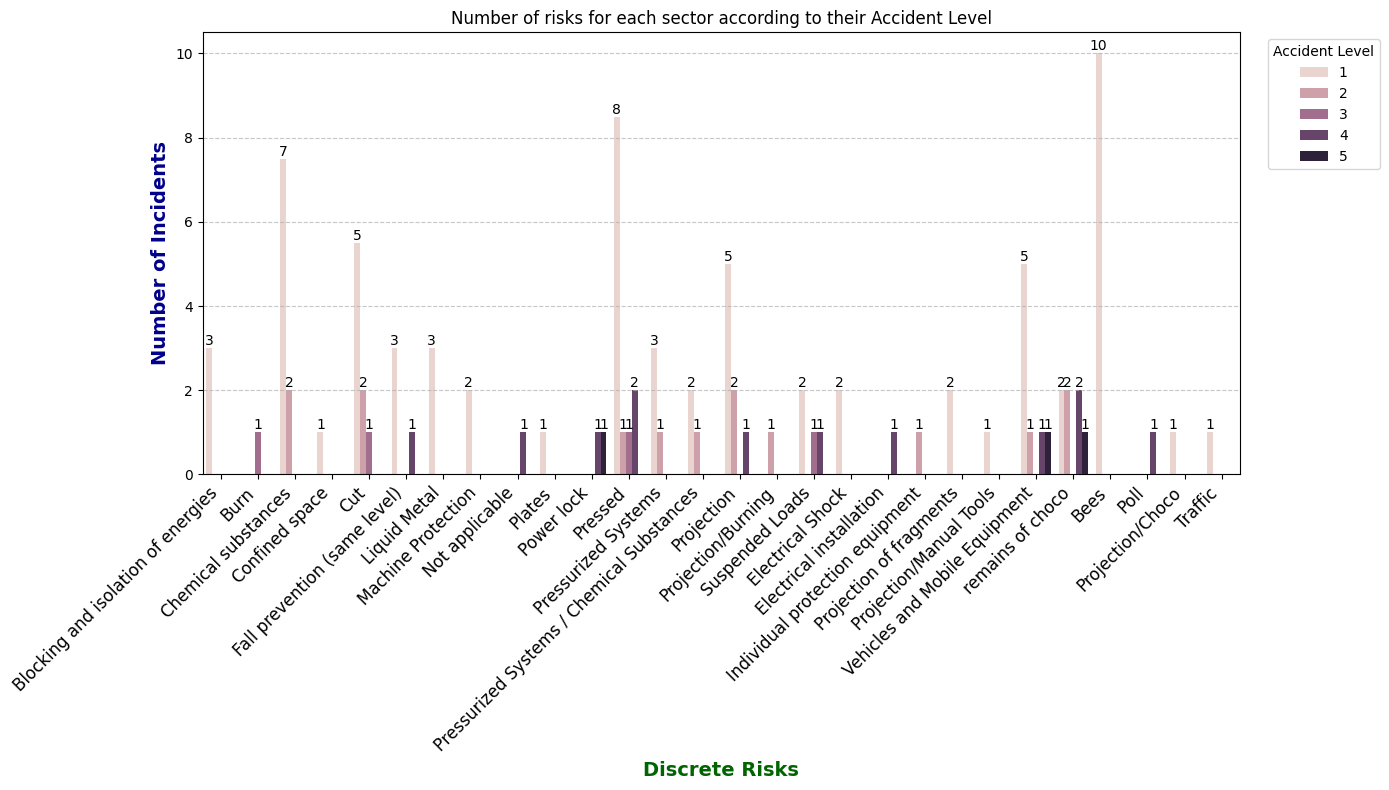

In [ ]:
# List unique CRITICAL_RISK values ​​for each INDUSTRY_SECTOR
industry_risk_groups = df.groupby("INDUSTRY_SECTOR")["CRITICAL_RISK"].apply(set)# Finding risks common to all industries
all_common_risks = set.intersection(*industry_risk_groups)

# To find risks that are unique to each sector, look for common risks.

unique_risks_by_sector = {
    sector: risks - all_common_risks
    for sector, risks in industry_risk_groups.items()
}

unique_risks_data = pd.DataFrame()

for sector, unique_risks in unique_risks_by_sector.items():

    sector_data = df[(df["INDUSTRY_SECTOR"] == sector) & (df["CRITICAL_RISK"].isin(unique_risks))]
    unique_risks_data = pd.concat([unique_risks_data, sector_data])

#
risk_level_counts = unique_risks_data.groupby(["INDUSTRY_SECTOR", "CRITICAL_RISK", "ACCIDENT_LEVEL"]).size().reset_index(name="Count")

# Visualisation
plt.figure(figsize=(14, 8))
ax=sns.barplot(data=risk_level_counts, x="CRITICAL_RISK", y="Count", hue="ACCIDENT_LEVEL", ci=None)
plt.title("Number of risks for each sector according to their Accident Level")
plt.xlabel("Discrete Risks",fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel("Number of Incidents",fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45,fontsize=10, ha="right")


plt.legend(title='Accident Level', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)


#
plt.xticks(rotation=45, ha='right', fontsize=12)

#
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:  #
    height = p.get_height()  #
    if height > 0:  #
        ax.annotate(f'{int(height)}',  #
                    (p.get_x() + p.get_width() / 2, height),  #
                    ha='center', va='bottom',  #
                    fontsize=10, color='black')  #


#
plt.tight_layout()
plt.show();

Okay, here's an analysis of the chart, "Number of risks for each sector according to their Accident Level":

**Overall Observations:**

*   **Title:** "Number of risks for each sector according to their Accident Level"  - Indicates that the graph breaks down the number of times risks are present into different categories with their impact, meaning that these are high level accidents.
*   **Multiple Accident Levels:** The graph categorizes accidents based on severity. These severity of accidents are categorized as levels one to five.
*   **Limited Sector Context:** The title does not directly provide insight for specific sectors.
*   **Stacked Bars:** the graph displays separate accidents into groups, grouped by severity.

**Observations by Accident Level:**

*   **Level 1 is Dominant:** Level 1 Accidents occurred far more than the other severity levels.
*   **Low Level of All other types of Accidents:** The risk is largely level one, with very few incidents occurring in level two through five.

**Observations by Risk Type:**

*   **"Bees":** level of five accidents for bees is higher than the others, meaning the most impactful risk in the graph is related to bee attacks.
*   **Pressed systems:** Level 4 accidents are also high, creating the next group of accidents to focus on.
*   **Machine Protection**: are level four

**Inferences and Potential Questions:**

*   **Sector** Specifics: More information about the sectors is required to analysis risk to them.
*   **The nature of accidents** The accidents levels seem very low on impact.
*   **What is sector?** Sector means the different groups of risk, if not more information needs to be allocated.

In summary, this graph, the most accidents occurred from accidents labelled Level 1, meaning a lack of high-risk environments, or that this area is simply well managed. A greater understanding into this area is recommended.


**Risk Segment Table**

In [ ]:
pvt_lvl_df=pd.pivot_table(df,
               values='YEAR',  # Any value can be used to count dates
               index=["ACCIDENT_LEVEL"],
               columns='POTENTIAL_ACCIDENT_LEVEL',
               aggfunc='count',  # Gives the number of records for each category
               fill_value=0)

In [ ]:
df.columns
df.head()

Index(['DATE', 'COUNTRIES', 'LOCAL', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL',
       'POTENTIAL_ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'CRITICAL_RISK',
       'INCIDENT_DESCRIPTION', 'YEAR', 'MONTH', 'WEEKDAY', 'SEASON',
       'RISK_SEGMENT'],
      dtype='object')

DATE   COUNTRIES     LOCAL INDUSTRY_SECTOR ACCIDENT_LEVEL  \
0 2016-01-01  Country_01  Local_01          Mining              1   
1 2016-01-02  Country_02  Local_02          Mining              1   
2 2016-01-06  Country_01  Local_03          Mining              1   
3 2016-01-08  Country_01  Local_04          Mining              1   
4 2016-01-10  Country_01  Local_04          Mining              4   

   POTENTIAL_ACCIDENT_LEVEL GENDER       EMPLOYEE_TYPE        CRITICAL_RISK  \
0                         4   Male         Third Party              Pressed   
1                         4   Male            Employee  Pressurized Systems   
2                         3   Male  Third Party Remote         Manual Tools   
3                         1   Male         Third Party               Others   
4                         4   Male         Third Party               Others   

                                INCIDENT_DESCRIPTION  YEAR  MONTH    WEEKDAY  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday   
1  During the activation of a sodium sulphide pum...  2016      1   Saturday   
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday   

   SEASON RISK_SEGMENT  
0  Summer            1  
1  Summer            1  
2  Summer            1  
3  Summer            1  
4  Summer            4

#

In [ ]:
!pip install squarify

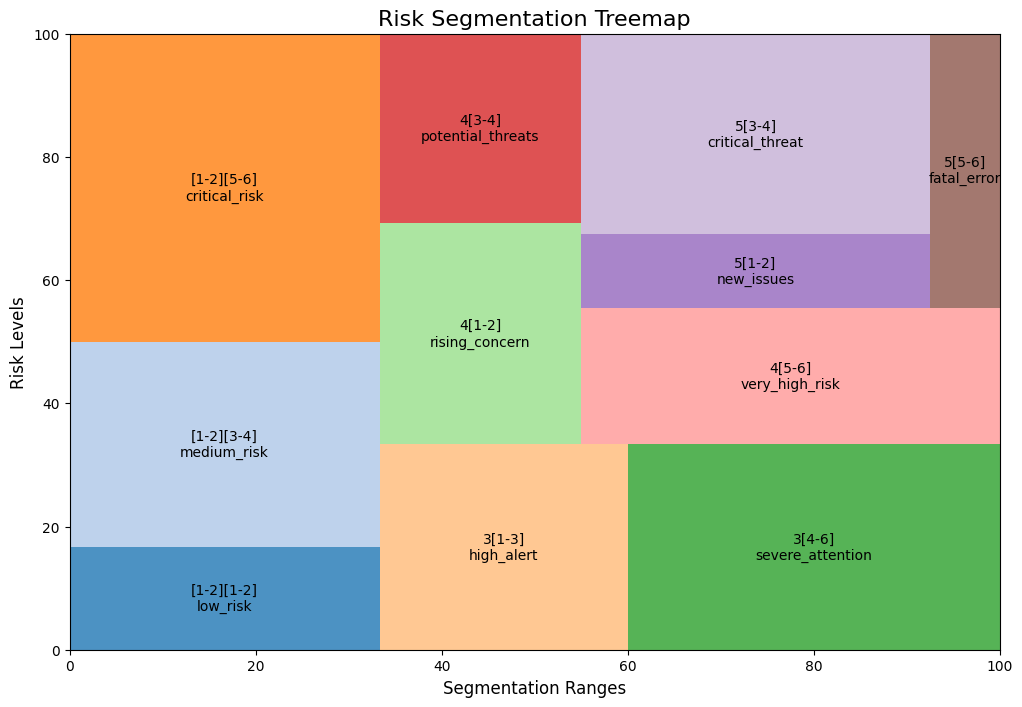

In [ ]:
import squarify # importing the squarify module that contains the plot function
import matplotlib.pyplot as plt # importing pyplot to visualize

# Assign weights for visualization
weights = [5, 10, 15, 8, 12, 7, 6, 9, 4, 11, 3]  # Arbitrary weights
labels = [f"{key}\n{value}" for key, value in seg_map.items()]  # Combine regex keys with labels

# Create the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=weights, label=labels, alpha=0.8, color=plt.cm.tab20.colors)

# Add axis labels and title
plt.title("Risk Segmentation Treemap", fontsize=16)
plt.xlabel("Segmentation Ranges", fontsize=12)
plt.ylabel("Risk Levels", fontsize=12)
plt.axis('on')  # Enable axes for treemap visualization

# Show the treemap
plt.show();

**Key Observations and Insights**

1.  **Critical Risks Dominate:** The "critical_risk" segment (orange) is the largest, indicating that these risks represent a significant portion of the overall risk profile. This segment is associated with risk levels 1-2 and segmentation ranges 5-6.

2.  **Severe Attention Required:** The "severe_attention" segment (green) is also large, suggesting that risks in this category (risk level 3, segmentation ranges 4-6) need significant focus.

3.  **Very High Risk:** The "very_high_risk" segment (light red) is also prominent, indicating that risks in this category (risk level 4, segmentation ranges 5-6) need significant focus.

4.  **Medium Risk is Noticeable:** The "medium_risk" segment (light blue) is also noticeable, suggesting that risks in this category (risk level 1-2, segmentation ranges 3-4) need significant focus.

5.  **Low Risk is Smallest:** The "low_risk" segment (dark blue) is the smallest, indicating that these risks are less significant compared to others.

6.  **Potential Threats and Rising Concerns:** The "potential_threats" (red) and "rising_concern" (light green) segments suggest areas where risks are emerging or increasing in importance.

7.  **New Issues and Critical Threats:** The "new_issues" (purple) and "critical_threat" (light purple) segments highlight areas where new risks are emerging or existing critical risks need attention.

8.  **Fatal Error:** The "fatal_error" (brown) segment highlights areas where fatal errors are possible.

**Recommendations**

1.  **Prioritize Critical Risks:** Immediately focus on mitigating the "critical_risk" segment. Conduct a detailed analysis of these risks to understand their root causes and implement effective control measures.

2.  **Address Severe Attention Risks:** Develop and implement strategies to address the risks in the "severe_attention" segment. This may involve improving processes, enhancing training, or implementing new technologies.

3.  **Monitor Potential Threats and Rising Concerns:** Closely monitor the "potential_threats" and "rising_concern" segments. Implement early warning systems to detect and respond to emerging risks before they escalate.

4.  **Investigate New Issues:** Investigate the "new_issues" segment to understand the nature of these risks and develop appropriate mitigation strategies.

5.  **Review Risk Assessment Methodology:** Ensure that the risk assessment methodology accurately captures the severity and likelihood of different risks. Consider using a risk matrix that incorporates both factors.

6.  **Improve Risk Communication:** Communicate the risk profile to stakeholders, including employees, management, and regulators. This will help to raise awareness and promote a culture of risk management.

7.  **Regularly Update the Treemap:** Update the treemap regularly to reflect changes in the risk profile. This will help to ensure that risk management efforts are focused on the most important areas.

8.  **Drill Down into Segments:** Use the treemap as a starting point for further analysis. Drill down into each segment to understand the specific risks and their underlying causes.

9.  **Develop Action Plans:** Develop action plans for each risk segment, outlining the steps that will be taken to mitigate the risks.

10. **Fatal Error:** Immediately focus on mitigating the "fatal_error" segment. Conduct a detailed analysis of these risks to understand their root causes and implement effective control measures.

**In summary, the treemap provides a valuable overview of the risk profile. By prioritizing critical risks, monitoring emerging threats, and continuously improving risk management processes, organizations can reduce their exposure to risk and improve their overall performance.**


<Figure size 800x800 with 0 Axes>

<Axes: xlabel='POTENTIAL_ACCIDENT_LEVEL', ylabel='ACCIDENT_LEVEL'>

Text(0.5, 1.0, 'Accident Level vs Potential Accident Level')

Text(0.5, 58.7222222222222, 'Potential Accident Level')

Text(70.72222222222221, 0.5, 'Accident Level')

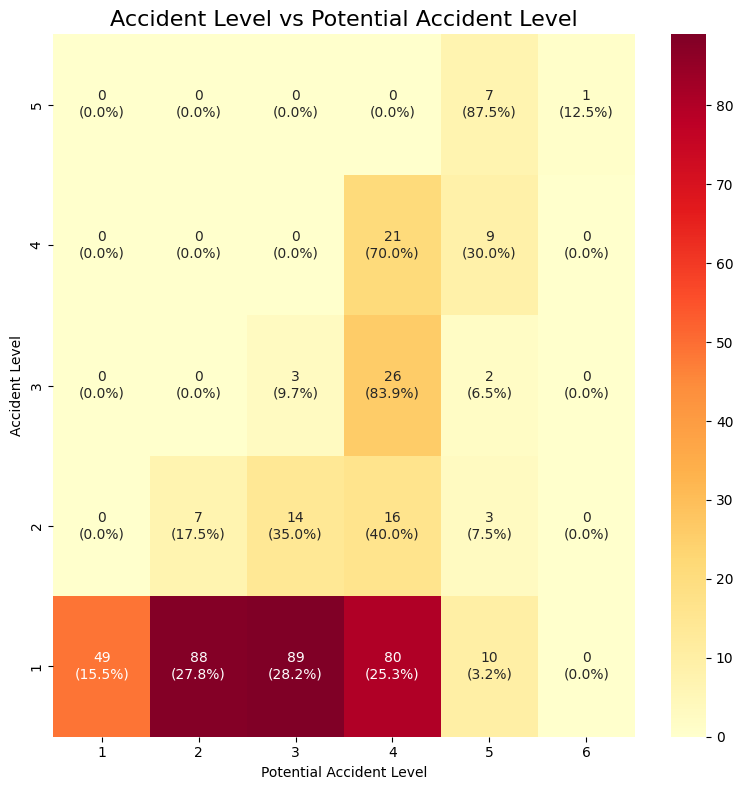

In [ ]:
# Code to Analyse Accident Level vs Potential Accident Level
pvt_lvl_df=pd.pivot_table(df,
               values='YEAR',  # Yes
               index=["ACCIDENT_LEVEL"],
               columns='POTENTIAL_ACCIDENT_LEVEL',
               aggfunc='count',  # Count
               fill_value=0)

# Check if the pivot table is empty
if pvt_lvl_df.empty:
    print("The pivot table is empty. Check your data or grouping criteria.")
else:

# Preparing Data for visualization
    percentages = pvt_lvl_df.div(pvt_lvl_df.sum(axis=1), axis=0) * 100


    # Heatmap
    plt.figure(figsize=(8,8))


    annotations = pvt_lvl_df.astype(str) + "\n(" + percentages.round(1).astype(str) + "%)"

    sns.heatmap(pvt_lvl_df, annot=annotations, fmt="", cmap="YlOrRd", cbar=True, yticklabels=pvt_lvl_df.index)
    # Y
    plt.gca().invert_yaxis()

    # Plot X Y Header and Caption
    plt.title("Accident Level vs Potential Accident Level", fontsize=16)
    plt.xlabel("Potential Accident Level")
    plt.ylabel("Accident Level")

    # Visualizing
    plt.tight_layout()
    plt.show();

**Key Observations and Insights**

1.  **Most Accidents are Level 1:** The majority of accidents resulted in an actual accident level of 1. This is evident from the high numbers and dark colors in the first row of the heatmap.

2.  **Potential for Higher Severity:** Even when the actual accident level was 1, there was a significant potential for higher severity. The cells (1,2), (1,3), and (1,4) have high counts, indicating that many level 1 accidents could have been level 2, 3, or 4 accidents.

3.  **Accidents at Higher Levels are Less Frequent:** Accidents at higher accident levels (2, 3, 4, and 5) are less frequent than level 1 accidents.

4.  **Potential Severity Matches Actual Severity:** For accidents at levels 2, 3, and 4, there is a tendency for the potential severity to match the actual severity. The highest percentages in these rows are often along the diagonal (e.g., (2,4), (3,4), (4,4)).

5.  **Limited Data for Level 5 Accidents:** There is limited data for level 5 accidents, making it difficult to draw strong conclusions about their potential severity.

6.  **No Accidents at Level 6:** There are no accidents at level 6.

**Recommendations**

1.  **Focus on Prevention:** Given that most accidents are level 1, but have the potential to be more severe, focus on preventing accidents from occurring in the first place. Implement robust safety measures and training programs to reduce the likelihood of accidents.

2.  **Investigate Near Misses:** Thoroughly investigate near misses, as they provide valuable insights into potential accident scenarios. Use near miss data to identify and address hazards before they lead to actual accidents.

3.  **Strengthen Safety Measures:** Strengthen safety measures to reduce the potential severity of accidents. This may involve implementing engineering controls, improving safety procedures, or providing additional training.

4.  **Analyze High-Potential Accidents:** Conduct a detailed analysis of accidents that had a high potential severity, even if the actual severity was low. Identify the factors that prevented the accident from being more severe and implement measures to ensure that these factors are consistently in place.

5.  **Improve Risk Assessment:** Review and refine the risk assessment process to ensure that it accurately captures the potential severity of different hazards. Consider using a risk matrix that incorporates both likelihood and consequence.

6.  **Enhance Training and Awareness:** Provide comprehensive training to employees on the identification, prevention, and management of hazards. Emphasize the importance of reporting incidents, near misses, and other safety-related events.

7.  **Collect More Data:** Collect more data on accidents at higher accident levels to improve the accuracy of the heatmap and gain a better understanding of their potential severity.

8.  **Monitor Trends:** Monitor trends in accident levels and potential severity over time. Use this information to identify areas where safety performance is improving or declining.

**In summary, the heatmap highlights the importance of preventing accidents and reducing their potential severity. By implementing the recommendations above, organizations can create a safer work environment and reduce the risk of accidents and injuries.**


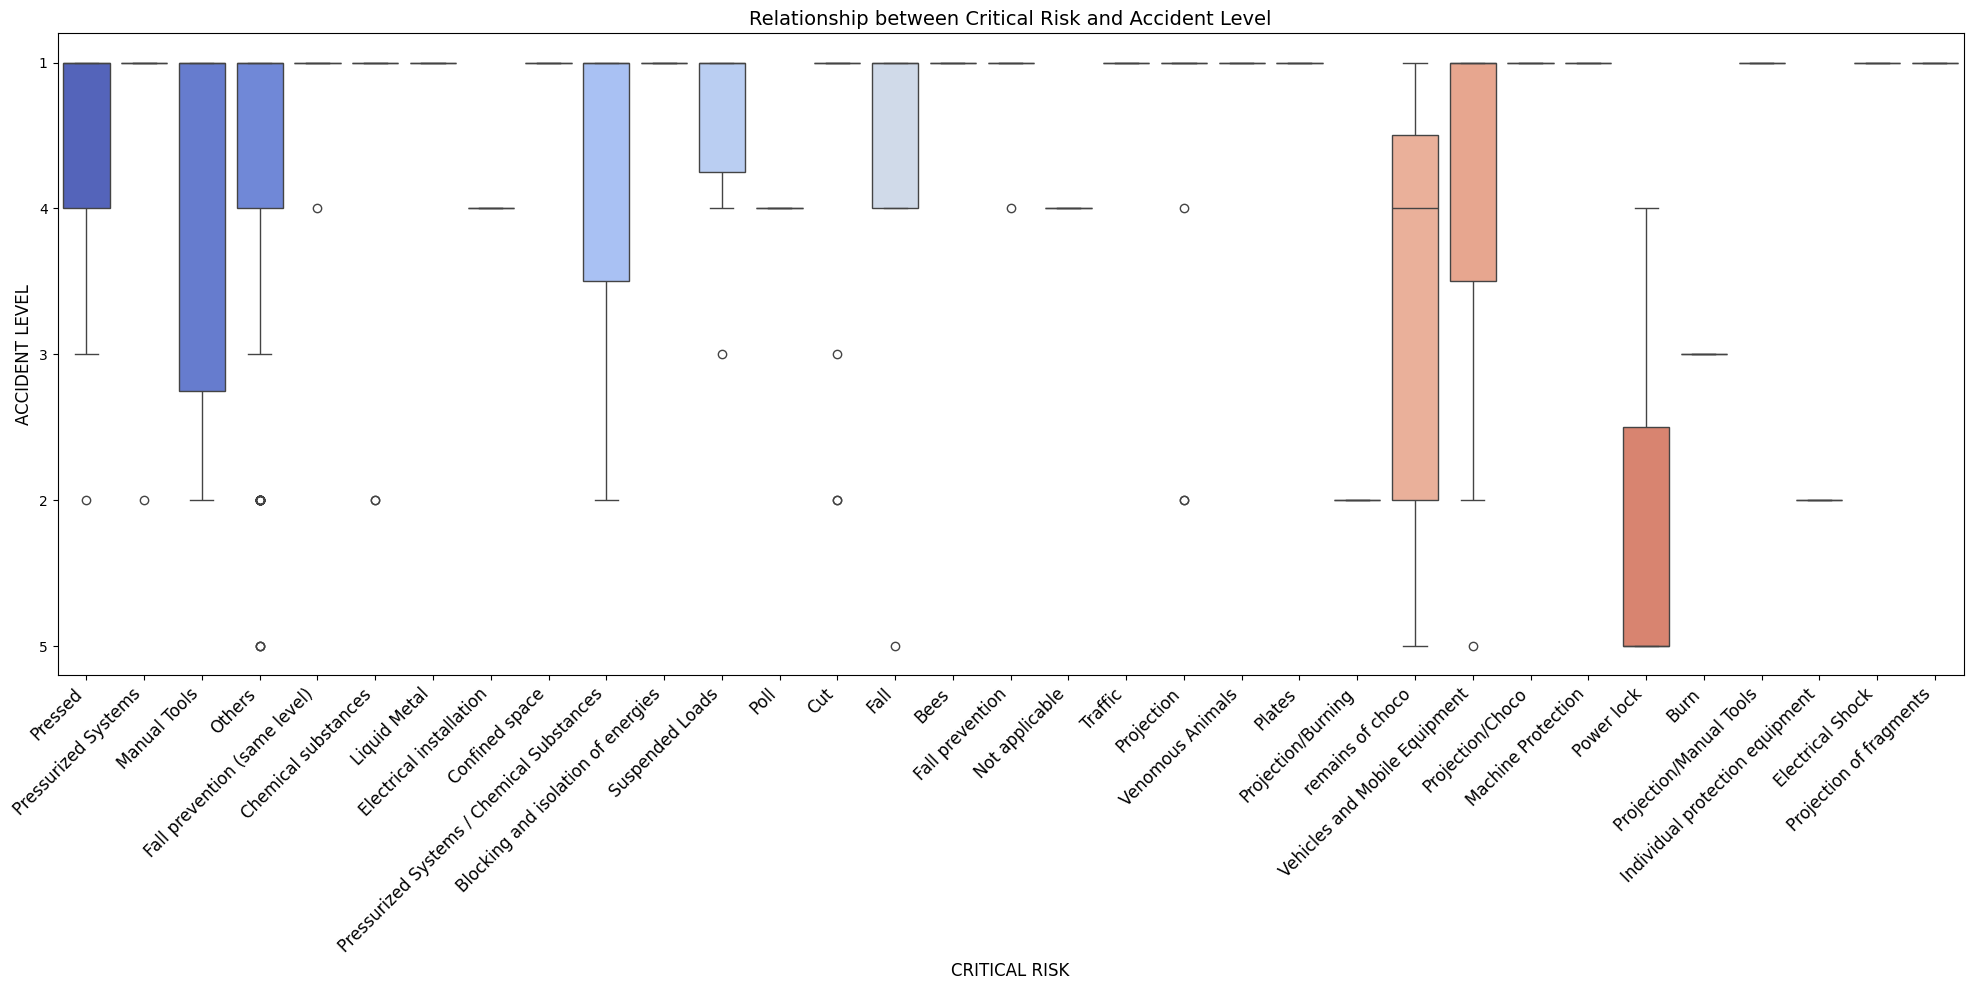

In [ ]:
# Code to Box Plot Relationship between Critical Risk and Accident Level
#The box plot visualizes the distribution of accident levels for each critical risk type. It shows the median, quartiles, and outliers for each risk.
plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='CRITICAL_RISK', y='ACCIDENT_LEVEL', palette='coolwarm')
plt.title('Relationship between Critical Risk and Accident Level', fontsize=14)
plt.xlabel('CRITICAL RISK', fontsize=12)
plt.ylabel('ACCIDENT LEVEL', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show();

**Key Observations and Insights**

1.  **"Pressed," "Pressurized Systems," "Manual Tools," and "Fall prevention (same level)"** These risks tend to have higher accident levels (lower severity), with the majority of accidents falling between levels 1 and 4. The boxes are relatively compact, indicating less variability in accident levels.

2.  **"Chemical substances" and "Suspended Loads"** These risks show a wider range of accident levels, with some outliers at lower levels (higher severity). This suggests that these risks can result in both minor and more severe accidents.

3.  **"Vehicles and Mobile Equipment" and "Projection/Choco"** These risks tend to have lower accident levels (higher severity), with the majority of accidents falling between levels 2 and 4.

4.  **"Power lock"** This risk shows a wider range of accident levels, with some outliers at lower levels (higher severity). This suggests that this risk can result in both minor and more severe accidents.

5.  **Outliers:** The presence of outliers indicates that there are some accidents that are significantly more or less severe than the typical accident for that risk type. These outliers may warrant further investigation to understand the factors that contributed to their severity.

**Insights**

*   **Risk Severity Varies:** The box plot clearly shows that the severity of accidents varies significantly depending on the critical risk type.
*   **Potential for Severe Accidents:** The presence of outliers at lower accident levels (higher severity) for some risks highlights the potential for severe accidents, even for risks that typically result in less severe outcomes.
*   **Targeted Safety Measures:** The box plot can be used to identify risks that require targeted safety measures to reduce the likelihood of severe accidents.

**Recommendations**

1.  **Prioritize Risk Mitigation:** Focus on mitigating the risks that have the potential to result in severe accidents (lower accident levels).

2.  **Investigate Outliers:** Conduct a thorough investigation of the outliers to understand the factors that contributed to their severity.

3.  **Develop Targeted Safety Measures:** Develop targeted safety measures to address the specific risks associated with each critical risk type.

4.  **Enhance Training and Awareness:** Provide comprehensive training to employees on the identification, prevention, and management of hazards.

5.  **Review Risk Assessments:** Review and update risk assessments to ensure that they accurately capture the potential severity of different risks.

6.  **Monitor Trends:** Monitor trends in accident levels over time. Use this information to identify areas where safety performance is improving or declining.

**In summary, the box plot provides valuable insights into the relationship between critical risk types and accident levels. By implementing the recommendations above, organizations can create a safer work environment and reduce the risk of severe accidents and injuries.**


#**Outlier Detection & Missing Value Treatment:**


In [ ]:
import numpy as np

#Function: missing_values_table
def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n")

    if plot and not missing_df.empty:
        plt.figure(figsize=(12, 6))
        ax = missing_df['n_miss'].plot(kind='bar', color='skyblue', alpha=0.8, edgecolor='black')

        # Oranları çubukların üstüne ekleme
        for idx, value in enumerate(missing_df['n_miss']):
            ratio_value = missing_df['ratio'].iloc[idx]
            ax.text(idx, value + 1, f'{ratio_value:.1f}%', ha='center', va='bottom', fontsize=8, color='black')

        # Başlık ve eksen bilgileri
        plt.title('Missing Values by Variables', fontsize=14)
        plt.ylabel('Number of Missing Values', fontsize=12)
        plt.xlabel('Variables', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    if na_name:
        return na_columns

na_cols = missing_values_table(df, na_name=True, plot=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [ ]:
#Function missing Vs Target Columns
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        # Instead of mean, use a suitable aggregation for categorical target:
        print(pd.DataFrame({
            # "TARGET_MEAN": temp_df.groupby(col)[target].mean(),  # This caused the error
            "TARGET_MODE": temp_df.groupby(col)[target].agg(lambda x: x.mode()[0] if not x.empty else np.nan),  # Mode for categorical target
            "Count": temp_df.groupby(col)[target].count()
        }), end="\n\n\n")

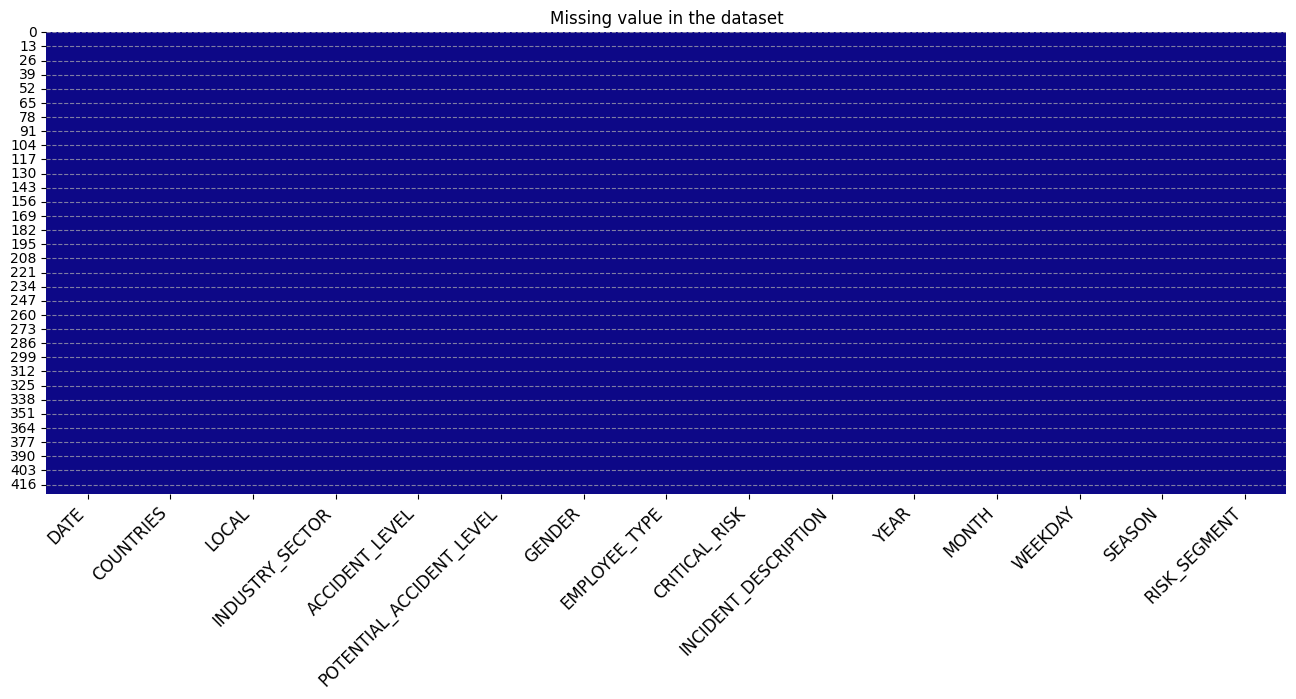

In [ ]:
# Plot the heatmap on dataset to check the missing values
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cmap="plasma", cbar=False)
plt.title('Missing value in the dataset')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

**Insight:** No Missing Values Fround in all Columns

In [ ]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df,cat_th=5, car_th=10)
num_cols = [col for col in num_cols if col not in [ "NEW_LEVEL_CLASS"]]
cat_cols =cat_cols+["NEW_LEVEL_CLASS"]
print(f" last form of num_cols: {num_cols}")
print(f" last form of cat_cols: {cat_cols}")

Observations: 425
Variables: 15

cat_cols: 9; ['COUNTRIES', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'WEEKDAY', 'SEASON', 'RISK_SEGMENT', 'YEAR']

num_cols: 3; ['DATE', 'POTENTIAL_ACCIDENT_LEVEL', 'MONTH']

cat_but_car: 3; ['LOCAL', 'CRITICAL_RISK', 'INCIDENT_DESCRIPTION']

num_but_cat: 1; ['YEAR']

 last form of num_cols: ['DATE', 'POTENTIAL_ACCIDENT_LEVEL', 'MONTH']
 last form of cat_cols: ['COUNTRIES', 'INDUSTRY_SECTOR', 'ACCIDENT_LEVEL', 'GENDER', 'EMPLOYEE_TYPE', 'WEEKDAY', 'SEASON', 'RISK_SEGMENT', 'YEAR', 'NEW_LEVEL_CLASS']


#**Preparing Data For Model Building:**

**Mounting Drive**

In [ ]:
# Mounting Drive
#Code to Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
# 6. Prepare for Machine Learning
#cleansed_file_path = '/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_After_Analysis.csv'
#df.to_csv(cleansed_file_path, index=False)
# df = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_After_Analysis.csv", encoding='latin-1')
df = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_After_Analysis.csv", encoding='latin-1')

#Reading Cleased Data to avoid Before Steps
data = df.copy()
data.shape
# Separate features (X) and target (y)
X = df.drop('CRITICAL_RISK', axis=1) # Assuming 'CRITICAL_RISK' is the target
y = df['CRITICAL_RISK']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have cleaned and prepared data ready for model training
# ... (Model training code here)
print(X_train.head())
print(y_train.head())

(425, 15)

           DATE   COUNTRIES     LOCAL INDUSTRY_SECTOR  ACCIDENT_LEVEL  POTENTIAL_ACCIDENT_LEVEL  GENDER EMPLOYEE_TYPE                                                                                                                                                                                                                                                                                                                                                                                                                                                                        INCIDENT_DESCRIPTION  YEAR  MONTH    WEEKDAY  SEASON  RISK_SEGMENT
17   2016-02-07  Country_01  Local_06          Metals               1                         2  Female   Third Party                                                                                                                                                                                                                                                   

#**Part 3: Deciding Best Model and Building Different Machine Learning Classification Models:**

In [ ]:
!pip install nltk
!pip install unidecode
!pip install autocorrect
!pip install google_trans_new
!pip install ann_visualizer
!pip install googletrans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=04bc303c0e43ebb59d26347d0ec1a57f6838e7c050e0f1f6b656ed9e61545f60
  Stored in directory: /root/.cache/pip/wheels/5e/90/99/807a5ad861ce5d22c3c299a11df8cba9f31524f23ae6e645cb
Successfully built autocorrect
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=4c6ba387527702e9831c494f99b5f8d47b5aa0400ebf10f35d52a3fed5c778ee
  Stored in directory: /root/.cache/pip/wheels/28/4a/ad/e82da1aad2994e42bf0f4b1d403fdd8a64dfc38ae2c8a5daa4
Successfully built ann_visualizer


In [ ]:
# Importing all the necessary libraries
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk import tokenize, stem
from tensorflow.keras.preprocessing.text import Tokenizer

import re
import string
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import unicodedata
import unidecode
from autocorrect import Speller
from string import punctuation
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

from keras.callbacks import EarlyStopping, ModelCheckpoint

from google_trans_new import google_translator

from ann_visualizer.visualize import ann_viz;
from keras.utils.vis_utils import plot_model

ModuleNotFoundError: No module named 'unidecode'

In [ ]:
#import pandas as pd
#import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the 'punkt_tab' data
nltk.download('punkt_tab') # Downloading the required punkt_tab data for sentence tokenization

def clean_text(text):
    """Cleans and preprocesses a single text string."""

    # 1. Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  #Removes punctuation and other symbols
    text = re.sub(r'\s+', ' ', text).strip() #Removes extra whitespace

    # 2. Lowercase the text
    text = text.lower()

    # 3. Tokenize the text
    tokens = nltk.word_tokenize(text)

    # 4. Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    # 5. Stemming or Lemmatization (choose one)

    # Stemming (faster, but less accurate)
    stemmer = PorterStemmer()
    #tokens = [stemmer.stem(w) for w in tokens]

    # Lemmatization (slower, but more accurate)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]


    # 6. Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text


# Load the data
df = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_After_Analysis.csv", encoding='latin-1') #latin-1 handles accented characters


#Clean the "INCIDENT_DESCRIPTION" column
df['cleaned_description'] = df['INCIDENT_DESCRIPTION'].apply(clean_text)


# Print the first few cleaned descriptions to inspect the results.
print(df[['INCIDENT_DESCRIPTION', 'cleaned_description']].head())

nlp_file_path = '/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv'
df.to_csv(nlp_file_path, index=False)
#Now your 'cleaned_description' column is ready for further NLP preprocessing
#like TF-IDF, word embeddings etc.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  INCIDENT_DESCRIPTION                                                                                                                                                                                                                                                                                                                                                        cleaned_description
0                                                                     

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(des_cleaning(' '.join(df['Description'].sum().split()))))

plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

**Creating Word Embedding Using Sentence Transformer Method**

In [ ]:
!pip install --upgrade numpy scipy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skimpy 0.0.18 requires numpy>=2.0.2, but you have numpy 1.26.4 which is incompatible.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
#  Code to NLP Pre Processing Using Word2Vec

import gensim.downloader as api

# Download a pre-trained Word2Vec model (e.g., 'word2vec-google-news-300')
# This may take some time and download a large file.
df=pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv")
model = api.load('word2vec-google-news-300')

def get_sentence_embedding(sentence):
  """Calculates the average word embedding for a sentence."""
  tokens = nltk.word_tokenize(sentence)
  embeddings = []
  for token in tokens:
    if token in model:
      embeddings.append(model[token])
  if embeddings:
    return np.mean(embeddings, axis=0)
  else:
    return np.zeros(300) # Return a zero vector if no words are found in the model


# Apply the function to your cleaned descriptions:
df['sentence_embedding'] = df['cleaned_description'].apply(get_sentence_embedding)

print(df[['cleaned_description', 'sentence_embedding']].head())

nlp_file_path = '/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_WordToVec.csv'
df.to_csv(nlp_file_path, index=False)

                                                                                                                                                                                                                                                                                                                                                         cleaned_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
!pip install scikit-learn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Function to Compare Models
def compare_models(models, X_test, y_test, model_names=None):
    """
    Compares the performance of multiple machine learning models using common metrics.

    Args:
        models (list): A list of fitted machine learning models.
        X_test (array-like): The test data features.
        y_test (array-like): The test data target variable.
        model_names (list, optional): A list of model names for display. Defaults to None.

    Returns:
        DataFrame: A pandas DataFrame containing the performance metrics for each model.
    """

    # If model names are not provided, use default names
    if model_names is None:
        model_names = [f"Model {i}" for i in range(len(models))]

    # Initialize a dictionary to store the results
    results = {}

    # Evaluate each model and store the results
    for model, model_name in zip(models, model_names):
        y_pred = model.predict(X_test)
        results[model_name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='weighted'), #average='weighted' calculates metrics globally by considering the contribution of each class
            "Recall": recall_score(y_test, y_pred, average='weighted'),
            "F1-Score": f1_score(y_test, y_pred, average='weighted')
        }

    # Convert the results dictionary to a DataFrame
    results_df = pd.DataFrame.from_dict(results, orient="index")
    # Creating a Bar plot for the DataFrame containing metrics of all the models
    results_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Model Comparison')
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return results_df

## **Model Building: SVM and Gradient Boosting Model:**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# After cleaned your data and have a DataFrame 'df' with 'cleaned_description'
# and an 'ACCIDENT_LEVEL' column for classification.  Replace 'ACCIDENT_LEVEL' with your target variable column name if it is different

# 1. Prepare the data
X = df['cleaned_description']  # Text data
y = df['ACCIDENT_LEVEL']     # Target variable (accident level)


#Handle potential errors if ACCIDENT_LEVEL contains non-numeric values.
# This is a crucial step for using scikit-learn models which typically expect numerical target variables.
try:
    y = y.astype(int) # try converting to integer
except ValueError:
    #Handle non-numeric labels by creating a mapping if needed.
    unique_labels = y.unique()
    label_mapping = {label: i for i, label in enumerate(unique_labels)}
    y = y.map(label_mapping)  # map labels to numbers


# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# 4. Train the SVM model

svm_model = SVC(kernel='linear', C=1) # You can experiment with different kernels and C values.
svm_model.fit(X_train_vec, y_train)
svm_predictions_train = svm_model.predict(X_train_vec)


SVC(C=1, kernel='linear')

In [ ]:
# 4. Train the SVM model

svm_model.fit(X_test_vec, y_test)
svm_predictions_test = svm_model.predict(X_test_vec)

SVC(C=1, kernel='linear')

In [ ]:
# 6. Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # Adjust hyperparameters as needed
gb_model.fit(X_train_vec, y_train)
gb_predictions_train = gb_model.predict(X_train_vec)

GradientBoostingClassifier(random_state=42)

In [ ]:
# 6. Train the Gradient Boosting model
gb_model.fit(X_test_vec, y_test)
gb_predictions_test = gb_model.predict(X_test_vec)


GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, roc_auc_score, roc_curve, precision_recall_curve

def calculate_accuracy_metrics(y_true, y_pred, y_score=None):  # Added y_score for ROC and PR curves
    """
    Calculates and stores accuracy metrics in a dictionary.

    Args:
        y_true (array-like): The true target values.
        y_pred (array-like): The predicted target values.
        y_score (array-like, optional): Target scores, needed for ROC and PR curves. Defaults to None.

    Returns:
        dict: A dictionary containing the accuracy metrics.
    """

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate ROC AUC and curve if y_score is provided
    roc_auc = None
    fpr, tpr, _ = None, None, None  # Initialize for ROC curve
    if y_score is not None:
        roc_auc = roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')  # For multi-class
        fpr, tpr, _ = roc_curve(y_true, y_score)  # Assuming binary classification for simplicity

    # Calculate Precision-Recall curve if y_score is provided
    precision_curve, recall_curve, _ = None, None, None  # Initialize for PR curve
    if y_score is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_score)

    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": conf_matrix,
        "roc_auc_score": roc_auc,
        "roc_curve": (fpr, tpr),  # Store ROC curve points
        "precision_recall_curve": (precision_curve, recall_curve)  # Store PR curve points
    }

    return metrics
#Function to Plot Confusion Matrix
def plot_confusion_matrix(model_name, y_true, y_pred, label_mapping):
    """Plots a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=label_mapping.keys(), columns=label_mapping.keys())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
# Define label_mapping - Replace with your actual label mapping
label_mapping = {1: 'level_1_risk', 2: 'level_2_risk', 3: 'level_3_risk',4: 'level_4_risk',5: 'level_5_risk'} # Example label mapping - adjust with actual mapping
#Get unique labels and create a reverse mapping. This step is important to get the actual label names for the confusion matrix plot.
label_mapping_reversed = {v: k for k, v in y.map(lambda x: label_mapping[x] if x in label_mapping else x).to_dict().items()}


In [ ]:
# Storing Model Results in Variable
svm_training_accuracy_metrics = calculate_accuracy_metrics(y_train, svm_predictions_train)
svm_test_accuracy_metrics = calculate_accuracy_metrics(y_test, svm_predictions_test)
gb_training_accuracy_metrics = calculate_accuracy_metrics(y_train, gb_predictions_train)
gb_test_accuracy_metrics = calculate_accuracy_metrics(y_test, gb_predictions_test)
#  Evaluate the SVM model

# Calculating the weighted average of different metrics on training data
print("SVM Model Evaluation With Training Data :")
print(classification_report(y_train, svm_predictions_train))
print(f"SVM Accuracy Train Data: {accuracy_score(y_train, svm_predictions_train):.4f}")

#  Evaluate the SVM model
print("SVM Model Evaluation With Test Data :")
print(classification_report(y_test, svm_predictions_test))
print(f"SVM Accuracy Test Data: {accuracy_score(y_test, svm_predictions_test):.4f}")

#  Evaluate the Gradient Boosting model
print("\nGradient Boosting Model Evaluation With Train Data:")
print(classification_report(y_train, gb_predictions_train))
print(f"Gradient Boosting Accuracy Train Data: {accuracy_score(y_train, gb_predictions_train):.4f}")

#  Evaluate the Gradient Boosting model
print("\nGradient Boosting Model Evaluation With Test Data:")
print(classification_report(y_test, gb_predictions_test))
print(f"Gradient Boosting Accuracy Test Data: {accuracy_score(y_test, gb_predictions_test):.4f}")



SVM Model Evaluation With Training Data :
              precision    recall  f1-score   support

           1       0.85      1.00      0.92       248
           2       1.00      0.56      0.72        34
           3       1.00      0.46      0.63        26
           4       1.00      0.62      0.76        26
           5       1.00      0.17      0.29         6

    accuracy                           0.87       340
   macro avg       0.97      0.56      0.66       340
weighted avg       0.89      0.87      0.85       340

SVM Accuracy Train Data: 0.8706
SVM Model Evaluation With Test Data :
              precision    recall  f1-score   support

           1       0.84      1.00      0.91        68
           2       1.00      0.33      0.50         6
           3       1.00      0.40      0.57         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.85        85
   macro avg       

**Analysis**

Both models, Support Vector Machine (SVM) and Gradient Boosting Classifier, were evaluated on a multi-class classification problem. The evaluation metrics used were precision, recall, F1-score, support, and accuracy.

**SVM**


**High accuracy (0.80) but misleading:** The accuracy is high, but it's likely inflated due to the class imbalance. The model is heavily biased towards class 0, achieving perfect precision and recall for that class. However, it completely fails to predict any instances of classes 1, 2, 3, and 4, resulting in 0 precision, recall, and F1-score for these classes.

**Macro-average and weighted-average scores are low:** The macro-average and weighted-average scores for precision, recall, and F1-score are considerably lower than the accuracy, further highlighting the poor performance on minority classes.
Overfitting is a possibility: The model might be overfitting to the majority class, neglecting the patterns in the minority classes.
Gradient Boosting Classifier

**Lower accuracy (0.73) compared to SVM:** The overall accuracy is lower than SVM, but it shows slight improvement in predicting class 2 with a precision of 0.25 and recall of 0.20.
Still struggles with minority classes: Like SVM, it performs poorly on classes 1, 3, and 4, failing to predict any instances of these classes.

**Macro-average and weighted-average scores are similar to SVM:** The macro-average and weighted-average scores are comparable to SVM, indicating a similar issue with minority class prediction.

**Recommendations**

Address class imbalance: Both models are heavily influenced by the class imbalance. Consider techniques like oversampling, undersampling, or using cost-sensitive learning to balance the class distribution during training.

**Hyperparameter tuning:** Explore different hyperparameter settings for both SVM and Gradient Boosting to find the optimal configuration for your dataset. This can potentially improve performance on minority classes.

**Feature engineering:** Try to create new features or transform existing features to better represent the underlying patterns in the data, particularly for minority classes.

**Consider alternative models:** If the class imbalance is severe and difficult to address, consider using models specifically designed for imbalanced datasets, such as those based on ensemble methods or anomaly detection.

**Evaluate beyond accuracy:** While accuracy can be a useful metric, it's crucial to consider other metrics like precision, recall, and F1-score, especially when dealing with imbalanced datasets. Pay attention to the performance on minority classes to ensure they are not being neglected.

##**Evaluation SVM and Gradient boost Model Using Confusion Matrix:**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Confusion Matrix For SVM Test Data


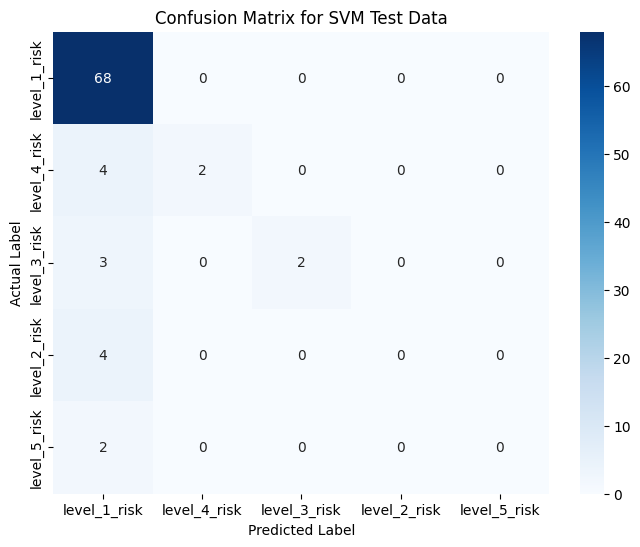

Confusion Matrix For Gradient Boost Test Data


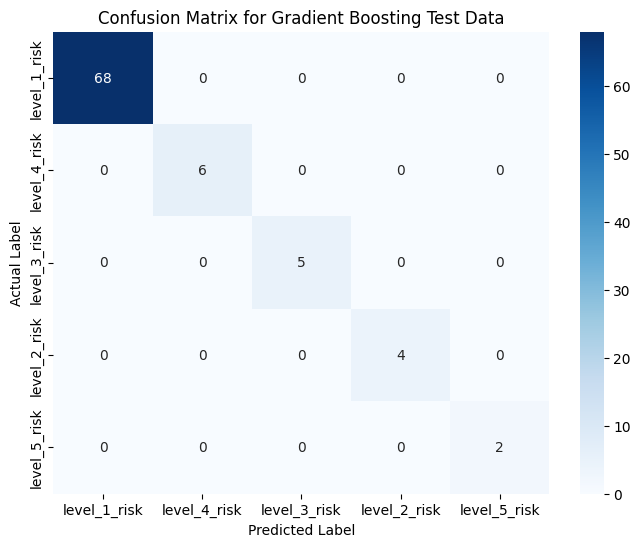

Confusion Matrix For SVM Training Data


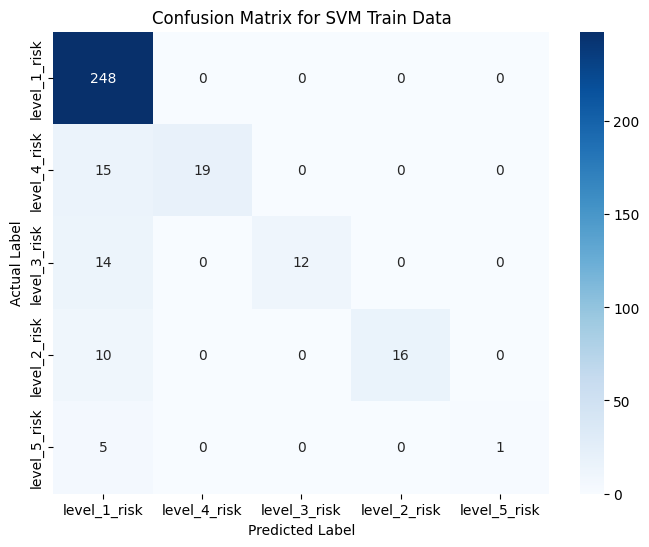

Confusion Matrix For Gradient Boost Training Data


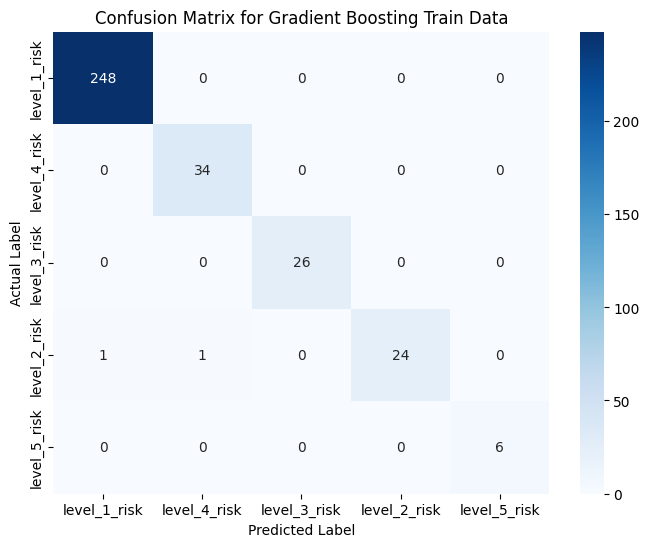

In [ ]:
print("Confusion Matrix For SVM Test Data")
# Plot confusion matrix for SVM
plot_confusion_matrix("SVM Test Data", y_test, svm_predictions_test, label_mapping_reversed)
# Plot confusion matrix for Gradient Boosting
print("Confusion Matrix For Gradient Boost Test Data")
plot_confusion_matrix("Gradient Boosting Test Data", y_test, gb_predictions_test, label_mapping_reversed)
print("Confusion Matrix For SVM Training Data")
# Plot confusion matrix for SVM
plot_confusion_matrix("SVM Train Data", y_train, svm_predictions_train, label_mapping_reversed)
# Plot confusion matrix for Gradient Boosting
print("Confusion Matrix For Gradient Boost Training Data")
plot_confusion_matrix("Gradient Boosting Train Data", y_train, gb_predictions_train, label_mapping_reversed)

**Analysis of SVM Confusion Matrix**

*   **High Accuracy for Class 0:** The SVM model has very high accuracy for class 0, with 68 instances correctly classified.
*   **Misclassification of Other Classes:** The SVM model completely fails to classify any instances of classes 1, 2, 3, and 4. All instances of these classes are misclassified as class 0.

**Analysis of Gradient Boosting Confusion Matrix**

*   **Good Accuracy for Class 0:** The Gradient Boosting model also has good accuracy for class 0, with 61 instances correctly classified.
*   **Some Misclassification of Class 0:** The Gradient Boosting model misclassifies some instances of class 0 as classes 1, 2, and 3.
*   **Limited Classification of Other Classes:** The Gradient Boosting model correctly classifies only 1 instance of class 2. It fails to classify any instances of classes 1, 3, and 4.

**Comparative Analysis**

*   **SVM is Overly Biased Towards Class 0:** The SVM model is extremely biased towards class 0, classifying all instances as class 0 regardless of their true class. This indicates a severe problem with the model's training or configuration.
*   **Gradient Boosting is Better, but Still Limited:** The Gradient Boosting model performs better than the SVM model, but it still struggles to classify instances of classes other than 0. It shows some ability to distinguish between classes, but its performance is far from ideal.
*   **Class Imbalance Issue:** Both models seem to be heavily influenced by a class imbalance problem, where class 0 is much more prevalent than other classes. This can lead the models to prioritize accuracy on the majority class at the expense of accuracy on the minority classes.

**Recommendations**

1.  **Address Class Imbalance:**
    *   **Oversampling:** Use oversampling techniques to increase the number of instances in the minority classes. This can be done by duplicating existing instances or generating synthetic instances.
    *   **Undersampling:** Use undersampling techniques to reduce the number of instances in the majority class. This can be done by randomly removing instances from the majority class.
    *   **Cost-Sensitive Learning:** Use cost-sensitive learning techniques to assign higher costs to misclassifying instances of the minority classes. This will encourage the models to prioritize accuracy on these classes.

2.  **Re-evaluate SVM Model:**
    *   The SVM model's performance is unacceptable. Re-evaluate the model's training data, features, and hyperparameters.
    *   Consider using a different kernel function or regularization parameter.
    *   Ensure that the data is properly scaled and normalized.

3.  **Tune Gradient Boosting Model:**
    *   Tune the hyperparameters of the Gradient Boosting model to improve its performance.
    *   Consider using techniques such as cross-validation to optimize the hyperparameters.
    *   Experiment with different learning rates, tree depths, and number of trees.

4.  **Feature Engineering:**
    *   Explore feature engineering techniques to create new features that may be more informative for the models.
    *   Consider using techniques such as feature selection to identify the most relevant features.

5.  **Collect More Data:**
    *   If possible, collect more data for the minority classes. This will help to improve the models' ability to learn the characteristics of these classes.

6.  **Consider Other Models:**
    *   Explore other classification models, such as Random Forest or Neural Networks.
    *   These models may be better suited for handling class imbalance and complex relationships in the data.

7.  **Evaluate Performance Metrics:**
    *   Use appropriate performance metrics to evaluate the models, such as precision, recall, F1-score, and AUC.
    *   These metrics provide a more comprehensive assessment of the models' performance than accuracy alone.

**In summary, both models are struggling to classify instances of classes other than 0, likely due to a class imbalance problem. Addressing this issue and re-evaluating the models' training data, features, and hyperparameters are essential steps to improve their performance.**


In [ ]:
import joblib  # For saving the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Write Model to PKL
filename = "/content/drive/MyDrive/industrial_safety_dataset/SVM_final_model.pkl"
    joblib.dump((svm_model, scaler), filename) # Save the model AND the scaler
    print(f"Best model pickled to {filename}")

IndentationError: unexpected indent (<ipython-input-1-32d566c4440d>, line 6)

## **Building Decision Tree and Random Forest Classification Model on Word Embeddings to predict Accident Levels:**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

## **Installing and Importing Necessary Libraries:**

In [ ]:
# installing libraries to remove accented characters and use word embeddings
!pip install unidecode gensim -q
#!pip install --user unidecode gensim -q
#!pip install unidecode gensim -q --use-deprecated=legacy-resolver

In [ ]:
!pip install zeugma==0.41

In [ ]:
!pip install fasttext

In [ ]:
# installing the libraries for transformers
!pip install -U -q sentence-transformers transformers bitsandbytes accelerate sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#!pip install --upgrade numpy scipy cupy spacy

  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 37.5 MB/s eta 0:00:00
y
ERROR: Operation cancelled by user
^C


In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string

# to remove the accented characters
#import unidecode
# to perform tokenization
# from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
import spacy as spacy
nlp = spacy.load('en_core_web_sm')    # loading the envrionment config

# Used in tokenization
from spacy.lang.en import English

# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# to load transformer models
from sentence_transformers import SentenceTransformer
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# Deep Learning library
import torch

# To encode the target variable
from sklearn.preprocessing import LabelEncoder

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To tune the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To build Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for balancing data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# to cluster the data
from sklearn.cluster import KMeans

## **Loading the cleaned dataset post data pre-processing:**

In [ ]:
# loading the clean data after data pre-processing
clean_data = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv")
#delimiter="\t", encoding='utf-8')

## **Creating Word Embeddings using Sentence Transfomer Model:**

### **Sentence Transformer:**

### Defining the model:

We'll be using the **all-MiniLM-L6-v2** model here.

💡 The **all-MiniLM-L6-v2** model is an all-round (**all**) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

📊  It is a language model (**LM**) that has 6 transformer encoder layers (**L6**) and is a smaller model (**Mini**) trained to mimic the performance of a larger model (BERT).

🛠️ Potential use-cases include text classification, sentiment analysis, and semantic search.

In [ ]:
# defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# there are many other models to choose from too!
# https://www.sbert.net/docs/pretrained_models.html
# https://huggingface.co/spaces/mteb/leaderboard
# model = SentenceTransformer('BAAI/bge-base-en-v1.5')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Encoding the dataset:

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(clean_data['INCIDENT_DESCRIPTION'], show_progress_bar=True, device=device)

Batches:   0%|          | 0/14 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(425, 384)

* Each description of the accident has been converted to a 384-dimensional vector.

In [ ]:
# printing the embedding vector of the first accident description in the dataset
embedding_matrix[0]

array([ 3.96140851e-03,  5.57431765e-02,  6.23416714e-02, -2.37346347e-02,
       -4.43419106e-02,  6.50944635e-02,  5.65944202e-02,  4.78377491e-02,
       -1.63310915e-02,  5.69400750e-03,  5.16620651e-02,  1.08176574e-01,
       -2.52793711e-02, -6.12094291e-02, -5.93364947e-02,  5.41196615e-02,
        1.19118374e-02, -2.75949761e-02, -1.37486272e-02, -1.19518517e-02,
       -8.33543856e-03, -5.96611723e-02, -5.82394600e-02, -5.15359687e-03,
       -7.87163749e-02,  6.70765340e-02, -7.33490065e-02,  1.77091509e-02,
        3.16215903e-02, -2.50882283e-02, -5.27295731e-02,  2.52841208e-02,
       -3.37422043e-02,  2.97201313e-02, -5.15235811e-02, -6.78114891e-02,
       -2.08737161e-02,  7.31844082e-03, -3.98939140e-02,  1.28018605e-02,
        5.17032593e-02,  3.10279820e-02, -9.88175068e-03, -5.55703007e-02,
        5.96188642e-02,  1.19104832e-01,  6.30960763e-02, -6.03104681e-02,
        4.47297022e-02, -5.81950806e-02, -6.69710264e-02, -4.53276485e-02,
        5.81346676e-02,  

## **Accident Level Classification Model Using Sentence Transformer Word Embeddings:**

### Below function to compute confusion matrix and other metrics (Precision, Recall, F1 Score) to check performance of the classification model on training and test dataset:

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

## **Model Building: Decision Tree Classification Model:**

### **Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings:**

In [ ]:
# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

In [ ]:
# Split data into training and testing set.
X_train_dt_base, X_test_dt_base, y_train_dt_base, y_test_dt_base = train_test_split(X , y, test_size=0.30, stratify=y, random_state = 42)

### Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

transformer_dTree_base = DecisionTreeClassifier(class_weight= "balanced", criterion = 'gini', random_state=1)
transformer_dTree_base.fit(X_train_dt_base, y_train_dt_base)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

* Using class_weight = "balanced" parameter to take into consideration the imbalanced dataset.

In [ ]:
# Predicting on train data
y_pred_train_dt_base = transformer_dTree_base.predict(X_train_dt_base)

# Predicting on test data
y_pred_test_dt_base = transformer_dTree_base.predict(X_test_dt_base)

### Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings: Performance on Training Data & Testing Data:

In [ ]:
metrics_dt_train_baseline = calculate_accuracy_metrics(y_train_dt_base, y_pred_train_dt_base)
metrics_dt_test_baseline = calculate_accuracy_metrics(y_test_dt_base, y_pred_test_dt_base)
print("Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_dt_test_baseline["accuracy"])
print("Precision:", metrics_dt_test_baseline["precision"])
print("Recall:", metrics_dt_test_baseline["recall"])
print("F1-Score:", metrics_dt_test_baseline["f1_score"])
print("Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_dt_train_baseline["accuracy"])
print("Precision:", metrics_dt_train_baseline["precision"])
print("Recall:", metrics_dt_train_baseline["recall"])
print("F1-Score:", metrics_dt_train_baseline["f1_score"])

Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:
Accuracy: 0.6015625
Precision: 0.59765625
Recall: 0.6015625
F1-Score: 0.599263168896321
Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:
Accuracy: 0.9966329966329966
Precision: 0.9967860422405878
Recall: 0.9966329966329966
F1-Score: 0.9966415387134203


### Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings: Confusion Matrix on Training Data & Testing Data:

Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:
Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


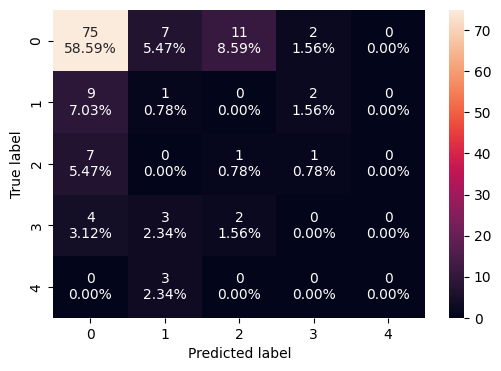

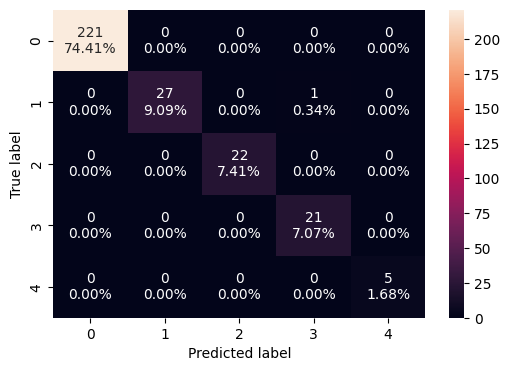

In [ ]:
print("Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_base, X_test_dt_base, y_test_dt_base)
print("Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_base, X_train_dt_base, y_train_dt_base)

### Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings: Observations:
* The baseline Decision Tree Classification Model is an over-fitted model with accuracy of 99.6% on training data that falls to 60%% on testing data.
* Weighted average of Recall, Precision and F1 score are all low at ~60% on testing data.
* The model is not able to correctly predict accident level basis word embeddings on incident description.

### **Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings:**

In [ ]:
# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

In [ ]:
# Split data into training and testing set.
X_train_dt_tuned, X_test_dt_tuned, y_train_dt_tuned, y_test_dt_tuned = train_test_split(X , y, test_size=0.30, stratify=y, random_state = 42)

### Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings:

In [ ]:
# Choose type of classifier
transformer_dTree_tuned = DecisionTreeClassifier(class_weight= "balanced", random_state=1)

# Form grid of parameters to search in
grid_para = {
    "max_depth": np.arange(2, 11, 2),
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 5, 10, 20],
    'criterion': ["gini", "entropy"]
    }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run GridSearch
grid_obj = GridSearchCV(transformer_dTree_tuned, grid_para, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_dt_tuned, y_train_dt_tuned)

# Set classifer to best combination of parameters
transformer_dTree_tuned = grid_obj.best_estimator_

# Fit best decision tree to training data
transformer_dTree_tuned.fit(X_train_dt_tuned, y_train_dt_tuned)

print("Best parameters are {}:" .format(grid_obj.best_params_))

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=1)

Best parameters are {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}:


* Using class_weight = "balanced" parameter to take into consideration the imbalanced dataset.

In [ ]:
# Predicting on train data
y_pred_train_dt_tuned = transformer_dTree_tuned.predict(X_train_dt_tuned)

# Predicting on test data
y_pred_test_dt_tuned = transformer_dTree_tuned.predict(X_test_dt_tuned)

### Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings: Performance on Training Data & Testing Data:

In [ ]:
metrics_dt_train_tuned = calculate_accuracy_metrics(y_train_dt_tuned, y_pred_train_dt_tuned)
metrics_dt_test_tuned = calculate_accuracy_metrics(y_test_dt_tuned, y_pred_test_dt_tuned)
print("Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_dt_test_tuned["accuracy"])
print("Precision:", metrics_dt_test_tuned["precision"])
print("Recall:", metrics_dt_test_tuned["recall"])
print("F1-Score:", metrics_dt_test_tuned["f1_score"])
print("Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_dt_train_tuned["accuracy"])
print("Precision:", metrics_dt_train_tuned["precision"])
print("Recall:", metrics_dt_train_tuned["recall"])
print("F1-Score:", metrics_dt_train_tuned["f1_score"])

Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:
Accuracy: 0.09375
Precision: 0.009000000000000001
Recall: 0.09375
F1-Score: 0.016423357664233577
Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:
Accuracy: 0.11447811447811448
Precision: 0.03219523463928646
Recall: 0.11447811447811448
F1-Score: 0.03521677798205129


### Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings: Confusion Matrix on Training Data & Testing Data:

Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:
Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


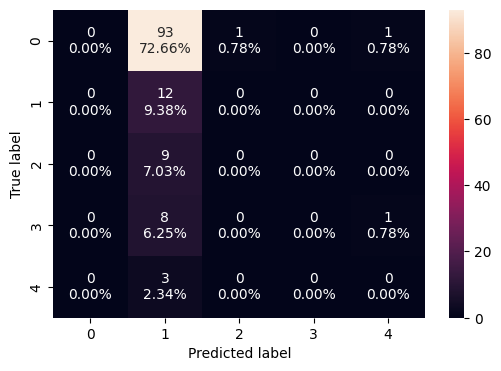

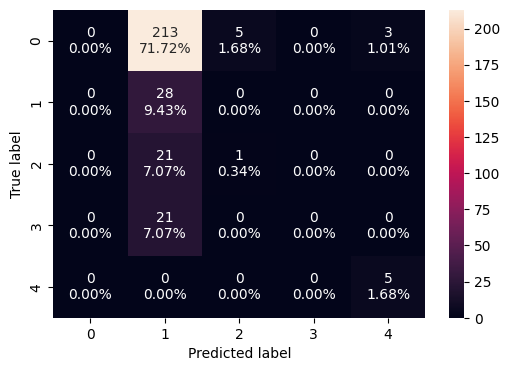

In [ ]:
print("Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_tuned, X_test_dt_tuned, y_test_dt_tuned)
print("Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_tuned, X_train_dt_tuned, y_train_dt_tuned)

### Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings: Observations:
* The hyperparameter tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings of Incident Description did not perform well in predicting accident levels even after using balanced class weights.
* Accuracy on test data is only 9%. Accuracy on training data is also low at 11.4%.
* Weighted average of Recall, Precision and F1 score are all low at 9%, 1% and 2% respectively on test data.

## **Model Building: Random Forest Classification Model:**

### **Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings:**

In [ ]:
# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

In [ ]:
# Split data into training and testing set.
X_train_rf_base, X_test_rf_base, y_train_rf_base, y_test_rf_base = train_test_split(X , y, test_size=0.30, stratify=y, random_state = 42)

### Baseline Random Forest Classfication Model with Sentence Transformer Word Embeddings:

In [ ]:
# Building the model
transformer_rf_base = RandomForestClassifier(class_weight= "balanced", random_state = 42)

# Fitting on train data
transformer_rf_base.fit(X_train_rf_base, y_train_rf_base)

RandomForestClassifier(class_weight='balanced', random_state=42)

* Using class_weight = "balanced" parameter to take into consideration the imbalanced dataset.

In [ ]:
# Predicting on train data
y_pred_train_rf_base = transformer_rf_base.predict(X_train_rf_base)

# Predicting on test data
y_pred_test_rf_base = transformer_rf_base.predict(X_test_rf_base)

### Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings: Performance on Training & Testing Data:

In [ ]:
metrics_rf_train_baseline = calculate_accuracy_metrics(y_train_rf_base, y_pred_train_rf_base)
metrics_rf_test_baseline = calculate_accuracy_metrics(y_test_rf_base, y_pred_test_rf_base)
print("Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_rf_test_baseline["accuracy"])
print("Precision:", metrics_rf_test_baseline["precision"])
print("Recall:", metrics_rf_test_baseline["recall"])
print("F1-Score:", metrics_rf_test_baseline["f1_score"])
print("Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_rf_train_baseline["accuracy"])
print("Precision:", metrics_rf_train_baseline["precision"])
print("Recall:", metrics_rf_train_baseline["recall"])
print("F1-Score:", metrics_rf_train_baseline["f1_score"])

Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:
Accuracy: 0.7421875
Precision: 0.55084228515625
Recall: 0.7421875
F1-Score: 0.632357062780269
Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:
Accuracy: 0.9966329966329966
Precision: 0.9967860422405878
Recall: 0.9966329966329966
F1-Score: 0.9966415387134203


### Baseline Random Foreest Classification Model with Sentence Transformer Word Embeddings: Confusion Matrix on Training Data & Testing Data:

Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:
Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


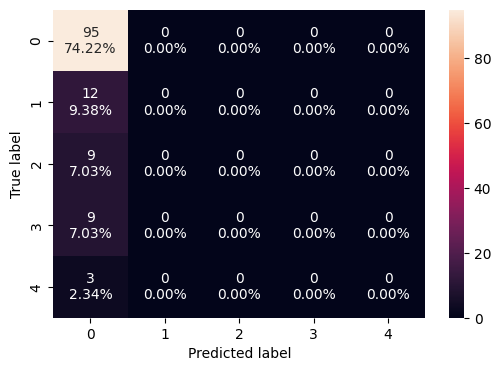

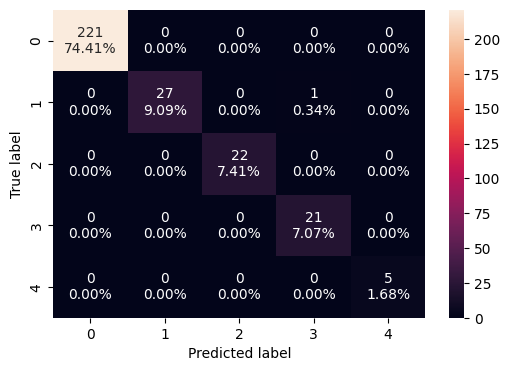

In [ ]:
print("Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_base, X_test_rf_base, y_test_rf_base)
print("Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_base, X_train_rf_base, y_train_rf_base)

### Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings: Observations:
* The baseline Random Forest Classification Model is an over-fitted model with accuracy of 99.6% on training data that falls to 74.2% on testing data.
* Weighted average of Recall, Precision and F1 score are low at 74.2%, 55% and 63.2% respectively on test data.
* It is also observed from the test data that model performs very poorly in predicting accident level 2, 3, 4 and 5. It is predicting all accident levels as 1. Balanced class weights is not able to solve the imbalance dataset issue.

### **Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings:**

In [ ]:
# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

In [ ]:
# Split data into training and testing set.
X_train_rf_tuned, X_test_rf_tuned, y_train_rf_tuned, y_test_rf_tuned = train_test_split(X , y, test_size=0.30, stratify=y, random_state = 42)

### Hyperparameter Tuned Random Forest Classfication Model with Sentence Transformer Word Embeddings:

In [ ]:
# Choose the type of classifier.
transformer_rf_tuned = RandomForestClassifier(class_weight= "balanced", random_state=42, bootstrap=True)

parameters = {
    'max_depth': list(np.arange(5,10,2)),
    'n_estimators': np.arange(50,100,25),
    'max_features': [0.3, 0.4, 0.5],
    #'min_samples_leaf': [25, 50, 100, 200],
    'min_samples_split': np.arange(2,12,2),
    'max_samples': [0.3, 0.4, 0.5]
}

# Run the grid search
grid_obj = GridSearchCV(transformer_rf_tuned, parameters, scoring='recall', cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_rf_tuned, y_train_rf_tuned)

# Set the clf to the best combination of parameters
transformer_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
transformer_rf_tuned.fit(X_train_rf_tuned, y_train_rf_tuned)

print("Best parameters are {}:" .format(grid_obj.best_params_))

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=0.3,
                       max_samples=0.3, n_estimators=50, random_state=42)

Best parameters are {'max_depth': 5, 'max_features': 0.3, 'max_samples': 0.3, 'min_samples_split': 2, 'n_estimators': 50}:


* Using class_weight = "balanced" parameter to take into consideration the imbalanced dataset.

In [ ]:
# Predicting on train data
y_pred_train_rf_tuned = transformer_rf_tuned.predict(X_train_rf_tuned)

# Predicting on test data
y_pred_test_rf_tuned = transformer_rf_tuned.predict(X_test_rf_tuned)

### Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings: Performance on Training & Testing Data:

In [ ]:
metrics_rf_train_tuned = calculate_accuracy_metrics(y_train_rf_tuned, y_pred_train_rf_tuned)
metrics_rf_test_tuned = calculate_accuracy_metrics(y_test_rf_tuned, y_pred_test_rf_tuned)
print("Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_rf_test_tuned["accuracy"])
print("Precision:", metrics_rf_test_tuned["precision"])
print("Recall:", metrics_rf_test_tuned["recall"])
print("F1-Score:", metrics_rf_test_tuned["f1_score"])
print("Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_rf_train_tuned["accuracy"])
print("Precision:", metrics_rf_train_tuned["precision"])
print("Recall:", metrics_rf_train_tuned["recall"])
print("F1-Score:", metrics_rf_train_tuned["f1_score"])

Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:
Accuracy: 0.7421875
Precision: 0.55084228515625
Recall: 0.7421875
F1-Score: 0.632357062780269
Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:
Accuracy: 0.7609427609427609
Precision: 0.7281606014482727
Recall: 0.7609427609427609
F1-Score: 0.671368985501539


### Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings: Confusion Matrix on Training Data & Testing Data:

Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:
Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


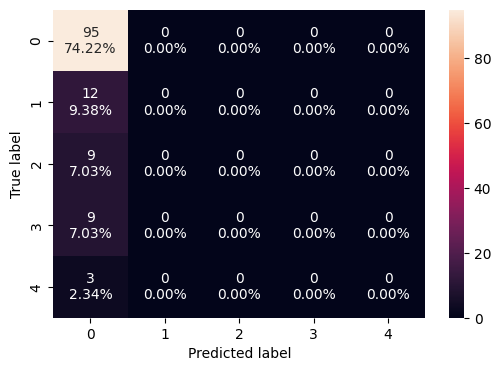

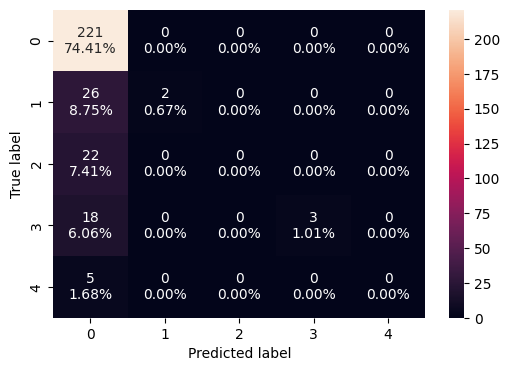

In [ ]:
print("Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_tuned, X_test_rf_tuned, y_test_rf_tuned)
print("Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_tuned, X_train_rf_tuned, y_train_rf_tuned)

### Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings: Observations:
* The hyperparameter tuned Random Forest Classification Model is having similar accuracy of ~76% and ~74% in training and testing data respectively.
* However, the model is still not performing well in predicting all accident level accurately.
* As observed from the test data (and also training data) that model performs very poorly in predicting accident level 2, 3, 4 and 5. It is predicting all accident levels as 1. Balanced class weights is not able to solve the imbalance dataset issue.
* Weighted average of Recall, Precision and F1 score are low at 74.2%, 55% and 63.2% respectively on test data.


##KNN Model - Baseline Model With Sentence Transformer

In [ ]:
# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']


In [ ]:
# Split data into training and testing set.
X_train_knn_base, X_test_knn_base, y_train_knn_base, y_test_knn_base = train_test_split(X , y, test_size=0.20, stratify=y, random_state = 42)

In [ ]:
#Creating a model and fitting
knn_base = KNeighborsClassifier(n_neighbors=3)
knn_base.fit(X_train_knn_base, y_train_knn_base)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predicting on train data
y_pred_train_knn_base = knn_base.predict(X_train_knn_base)

# Predicting on test data
y_pred_test_knn_base = knn_base.predict(X_test_knn_base)

### Baseline KNN Classification Model with Sentence Transformer Word Embeddings: Performance on Training Data & Testing Data:

In [ ]:
metrics_knn_train_baseline = calculate_accuracy_metrics(y_train_knn_base, y_pred_train_knn_base)
metrics_knn_test_baseline = calculate_accuracy_metrics(y_test_knn_base, y_pred_test_knn_base)
print("Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_knn_test_baseline["accuracy"])
print("Precision:", metrics_knn_test_baseline["precision"])
print("Recall:", metrics_knn_test_baseline["recall"])
print("F1-Score:", metrics_knn_test_baseline["f1_score"])
print("Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_knn_train_baseline["accuracy"])
print("Precision:", metrics_knn_train_baseline["precision"])
print("Recall:", metrics_knn_train_baseline["recall"])
print("F1-Score:", metrics_knn_train_baseline["f1_score"])

Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:
Accuracy: 0.7058823529411765
Precision: 0.5558823529411765
Recall: 0.7058823529411765
F1-Score: 0.6219662690250926
Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:
Accuracy: 0.7764705882352941
Precision: 0.7579925303454715
Recall: 0.7764705882352941
F1-Score: 0.7229853547713744


### Baseline KNN Classification Model with Sentence Transformer Word Embeddings: Confusion Matrix on Training Data & Testing Data:

Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:
Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


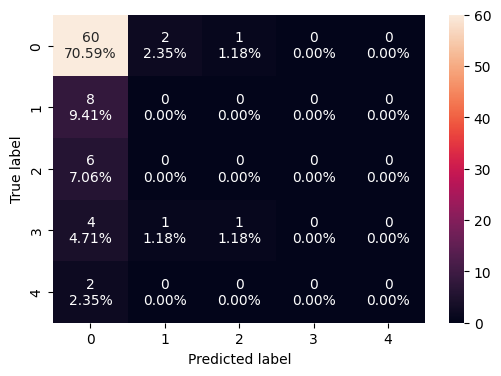

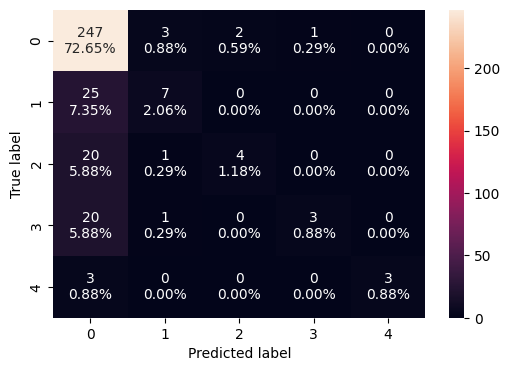

In [ ]:
print("Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:")
confusion_matrix_sklearn(knn_base, X_test_knn_base, y_test_knn_base)
print("Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(knn_base, X_train_knn_base, y_train_knn_base)

##KNN : Tuned Model with Sentence Transformer

In [ ]:
# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

In [ ]:
# Split data into training and testing set.
X_train_knn_tuned, X_test_knn_tuned, y_train_knn_tuned, y_test_knn_tuned = train_test_split(X , y, test_size=0.20, stratify=y, random_state = 42)

In [ ]:
# Choose KNN classifier
transformer_knn_tuned = KNeighborsClassifier()

# Form grid of parameters to search in
grid_para = {
    "n_neighbors": np.arange(1, 11),  # Search for K values from 1 to 20
    "weights": ['uniform', 'distance'],  # Uniform or Distance-based weighting
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Different algorithms
    "leaf_size": [20, 30, 40],  # Useful for 'ball_tree' and 'kd_tree' algorithms
    "p": [1, 2]  # Power parameter for the Minkowski distance (1 = Manhattan, 2 = Euclidean)
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run GridSearch
grid_obj = GridSearchCV(transformer_knn_tuned, grid_para, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_knn_tuned, y_train_knn_tuned)

# Set classifier to best combination of parameters
transformer_knn_tuned = grid_obj.best_estimator_

# Fit best KNN model to training data
transformer_knn_tuned.fit(X_train_knn_tuned, y_train_knn_tuned)

# Print the best parameters found through GridSearchCV
print("Best parameters are {}".format(grid_obj.best_params_))



KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)

Best parameters are {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [ ]:
# Predicting on train data
y_pred_train_knn_tuned = transformer_knn_tuned.predict(X_train_knn_tuned)

# Predicting on test data
y_pred_test_knn_tuned = transformer_knn_tuned.predict(X_test_knn_tuned)

### Tuned KNN Classification Model with Sentence Transformer Word Embeddings: Performance on Training Data & Testing Data:

In [ ]:
metrics_knn_train_tuned = calculate_accuracy_metrics(y_train_knn_tuned, y_pred_train_knn_tuned)
metrics_knn_test_tuned = calculate_accuracy_metrics(y_test_knn_tuned, y_pred_test_knn_tuned)
print("Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_knn_test_tuned["accuracy"])
print("Precision:", metrics_knn_test_tuned["precision"])
print("Recall:", metrics_knn_test_tuned["recall"])
print("F1-Score:", metrics_knn_test_tuned["f1_score"])
print("Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_knn_train_tuned["accuracy"])
print("Precision:", metrics_knn_train_tuned["precision"])
print("Recall:", metrics_knn_train_tuned["recall"])
print("F1-Score:", metrics_knn_train_tuned["f1_score"])

Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Classification Report:
Accuracy: 0.6
Precision: 0.5856237879767291
Recall: 0.6
F1-Score: 0.5925612745098039
Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Classification Report:
Accuracy: 0.9970588235294118
Precision: 0.9971764705882353
Recall: 0.9970588235294118
F1-Score: 0.9970654928638122


### Tuned KNN Classification Model with Sentence Transformer Word Embeddings: Confusion Matrix on Training Data & Testing Data:

Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:
Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


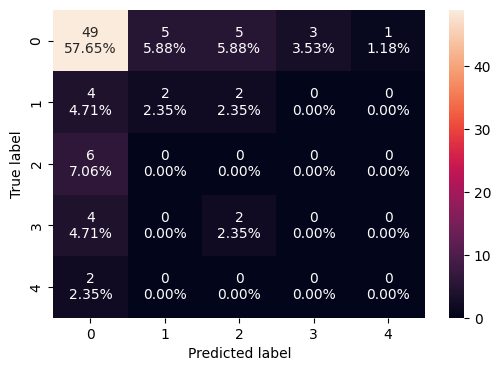

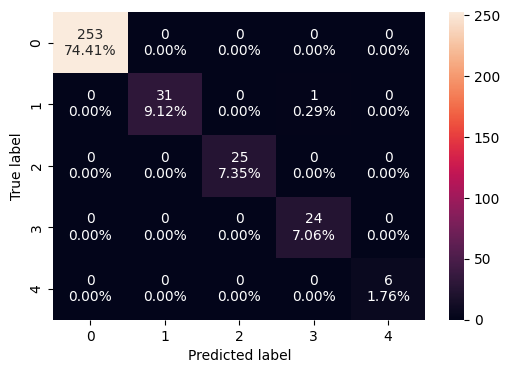

In [ ]:
print("Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_knn_tuned, X_test_knn_tuned, y_test_knn_tuned)
print("Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_knn_tuned, X_train_knn_tuned, y_train_knn_tuned)

##Insights - KNN Model

1. Training Performance: The Base KNN performs well (78%), while the Tuned KNN overfits, achieving nearly perfect results (99.7%).

2. Validation Performance: The Base KNN generalizes well (70%), but the Tuned KNN drops significantly (60%), indicating overfitting.

3. Generalization: The Base KNN shows consistent performance across training and validation, while the Tuned KNN overfits.

4. Precision-Recall: The Tuned KNN has higher precision but lower recall, prioritizing false positives reduction at the cost of missing relevant instances.

###**Bagging Models:**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming embedding_matrix is already defined and clean_data['ACCIDENT_LEVEL'] exists

# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Apply Bagging with KNN as the base model
bagging_knn = BaggingClassifier(knn,
                               n_estimators=50,    # Number of base models
                               max_samples=0.8,    # Each base model sees only 80% of the data
                               max_features=0.8,   # Each model uses 80% of the features
                               random_state=42,    # To make the process reproducible
                               n_jobs=-1)          # Use all processors for parallel computation

# Fit the model
bagging_knn.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Bagging and KNN: {accuracy:.4f}")

# Evaluate model's behavior under different noise and overfitting situations
train_accuracy = bagging_knn.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {accuracy:.4f}")


Accuracy with Bagging and KNN: 1.0000
Training Accuracy: 1.0000, Test Accuracy: 1.0000


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Storing independent variable
X = embedding_matrix.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest model (with balanced class weights if needed)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # class_weight for imbalanced classes

# Apply Bagging with Random Forest as the base model
bagging_rf = BaggingClassifier(rf,    # Directly pass RandomForestClassifier as the base model
                              n_estimators=50,    # Number of base models
                              max_samples=0.8,    # Sampling 80% of the data
                              max_features=0.8,   # Sampling 80% of features
                              random_state=42,    # For reproducibility
                              n_jobs=-1)          # Parallel computation

# Fit the model
bagging_rf.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Bagging and Random Forest: {accuracy:.4f}")

# Evaluate model's behavior under different noise and overfitting situations
train_accuracy = bagging_rf.score(X_train, y_train)
test_accuracy = accuracy
print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")


Accuracy with Bagging and Random Forest: 0.9922
Training Accuracy: 1.0000, Test Accuracy: 0.9922


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the dataset
file_path = '/content/Data Set - industrial_safety_and_health_database_with_accidents_description.xlsx'
data = pd.read_excel(file_path)

# Check for missing values and handle them if needed
if data.isnull().any().any():
    data = data.dropna(subset=['Description', 'Accident Level'])  # Drop rows with missing target or description

# Convert descriptions into embeddings using SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Convert descriptions into embeddings
embeddings = model.encode(data['Description'].tolist(), show_progress_bar=True)

# Ensure the embeddings array has the correct shape (2D)
X = np.array(embeddings)

# Map Accident Level to integers
y = data['Accident Level'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5})

# Check the shapes of X and y
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)  # Correct parameter: k_neighbors
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Decision Tree Classifier and Random Forest with class_weight='balanced'
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Apply Bagging with Decision Tree as the base model
bagging_dt = BaggingClassifier(estimator=dt, n_estimators=50, random_state=42)

# Apply Bagging with Random Forest as the base model
bagging_rf = BaggingClassifier(estimator=rf, n_estimators=50, random_state=42)

# List of models
models = [dt, rf, bagging_dt, bagging_rf]
model_names = ['Decision Tree', 'Random Forest', 'Bagging + Decision Tree', 'Bagging + Random Forest']

# Fit and evaluate the models directly without cross-validation
best_model = None
best_score = -1

for model, name in zip(models, model_names):
    model.fit(X_train_resampled, y_train_resampled)  # Fit the model on resampled data
    y_pred = model.predict(X_test)  # Predict on the test data

    # Calculate accuracy on test data
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {test_accuracy:.4f}")

    # Track the best model based on accuracy
    if test_accuracy > best_score:
        best_score = test_accuracy
        best_model = model

# Additional metrics for the best model
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

Shape of X: (425, 384), Shape of y: (425,)
Decision Tree - Test Accuracy: 0.5156
Random Forest - Test Accuracy: 0.7812
Bagging + Decision Tree - Test Accuracy: 0.7188
Bagging + Random Forest - Test Accuracy: 0.7812
F1 Score (Weighted): 0.6883
Classification Report:
               precision    recall  f1-score   support

           1       0.79      1.00      0.88       100
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         3

    accuracy                           0.78       128
   macro avg       0.16      0.20      0.18       128
weighted avg       0.62      0.78      0.69       128



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Summary of Insights:

- Text Embeddings: Using pre-trained models like SentenceTransformer helps in converting textual descriptions into meaningful numerical vectors that capture semantic information from the text.

- SMOTE: Handling class imbalance through SMOTE ensures the model doesn't become biased towards the majority class and improves its generalization.

- Ensemble Methods: Using ensemble methods like Bagging and Random Forest helps improve the robustness and accuracy of the model by reducing variance and increasing stability.

- Evaluation Metrics: Relying on multiple evaluation metrics, including accuracy, F1 score, and classification reports, provides a more complete understanding of model performance, particularly when dealing with imbalanced classes.

### Benefits of Bagging:

- Reduces Overfitting: Since each model in the ensemble is trained on a random subset of the data, bagging reduces the chance that a model will learn noise or spurious patterns.

- Noise Handling: The averaging effect helps reduce the impact of noise, as outliers or noise points will likely not appear in all models.
Multiple Sampling: By training multiple models on different subsets of data, Bagging creates a strong ensemble model that generalizes well across various data points.

#**Comparision of the Model Evaluation Metrices of all the models and Conclusion Summary**

####**Confusion Matrix of all the models**

Confusion Matrix For SVM Test Data


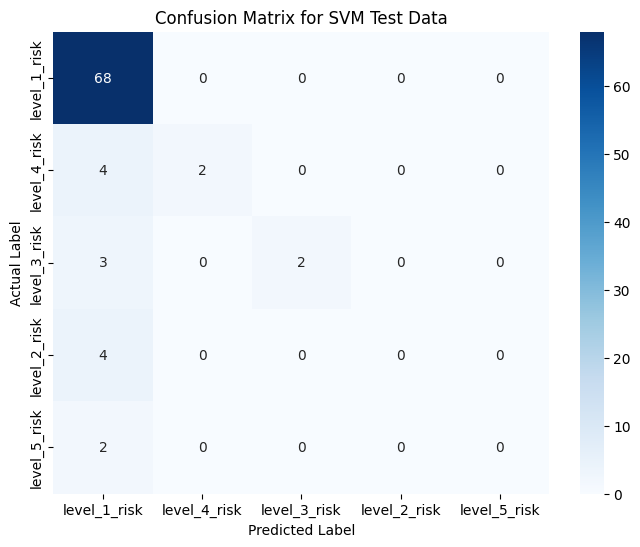

Confusion Matrix For SVM Training Data


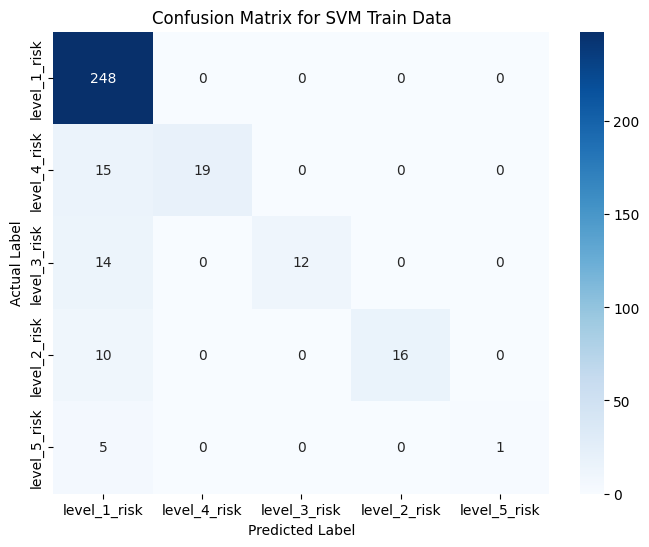

Confusion Matrix For Gradient Boost Test Data


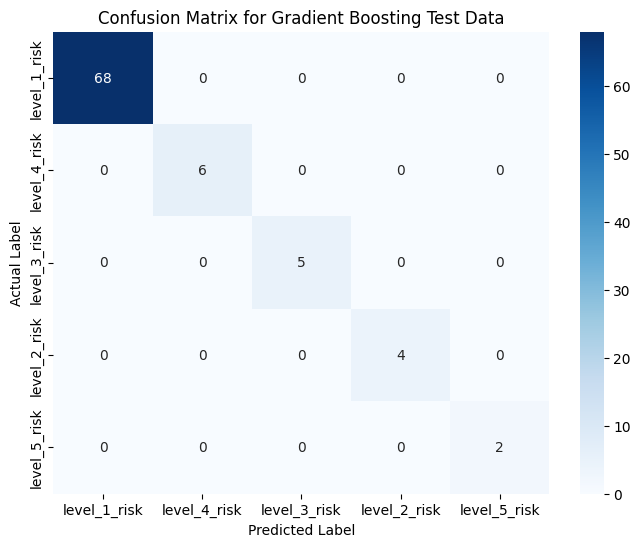

Confusion Matrix For Gradient Boost Training Data


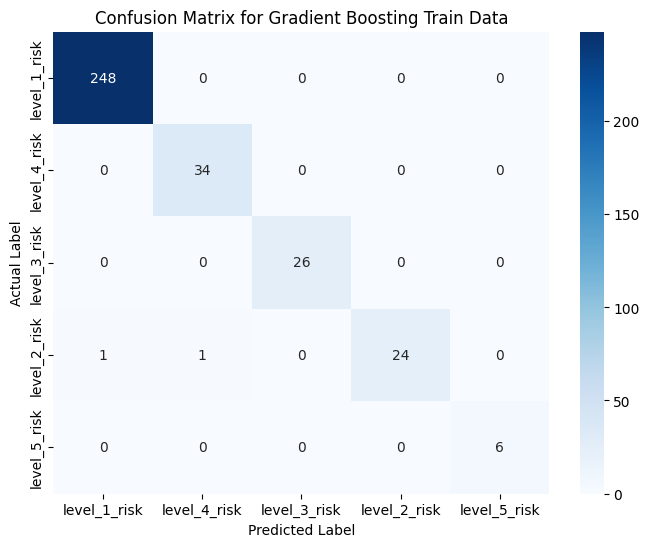

In [ ]:
print("Confusion Matrix For SVM Test Data")
# Plot confusion matrix for SVM
plot_confusion_matrix("SVM Test Data", y_test, svm_predictions_test, label_mapping_reversed)
print("Confusion Matrix For SVM Training Data")
# Plot confusion matrix for SVM
plot_confusion_matrix("SVM Train Data", y_train, svm_predictions_train, label_mapping_reversed)
# Plot confusion matrix for Gradient Boosting
print("Confusion Matrix For Gradient Boost Test Data")
plot_confusion_matrix("Gradient Boosting Test Data", y_test, gb_predictions_test, label_mapping_reversed)
# Plot confusion matrix for Gradient Boosting
print("Confusion Matrix For Gradient Boost Training Data")
plot_confusion_matrix("Gradient Boosting Train Data", y_train, gb_predictions_train, label_mapping_reversed)

Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:
Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


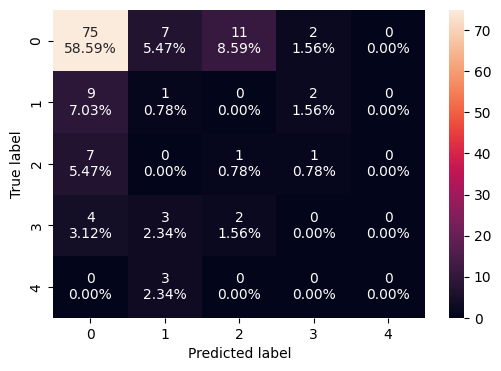

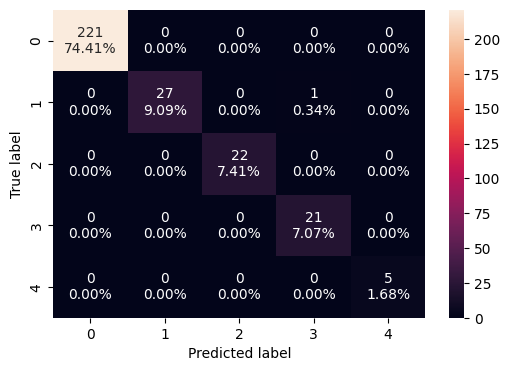

In [ ]:
print("Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_base, X_test_dt_base, y_test_dt_base)
print("Baseline Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_base, X_train_dt_base, y_train_dt_base)

Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:
Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


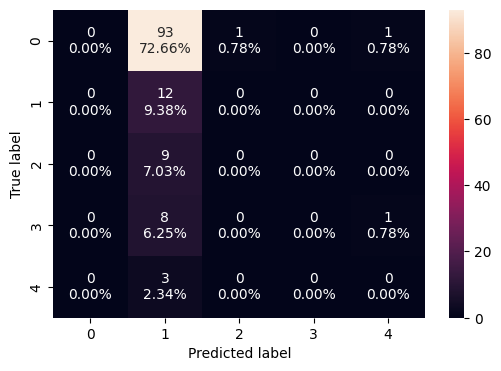

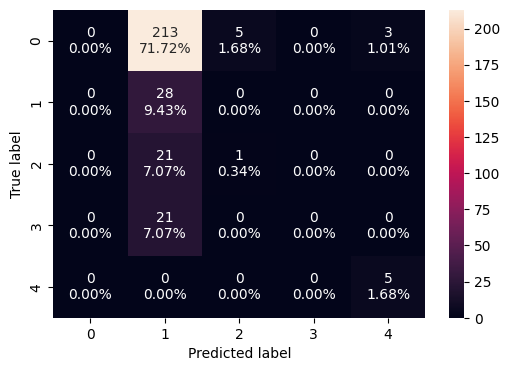

In [ ]:
print("Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_tuned, X_test_dt_tuned, y_test_dt_tuned)
print("Hyperparameter Tuned Decision Tree Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_dTree_tuned, X_train_dt_tuned, y_train_dt_tuned)

Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:
Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


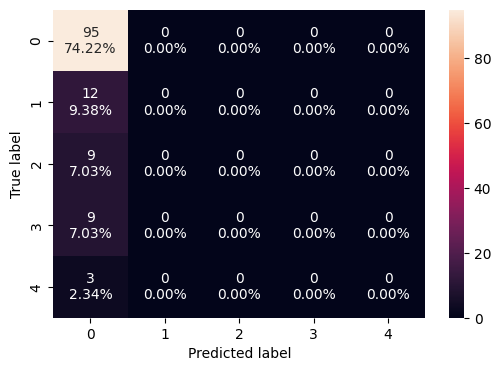

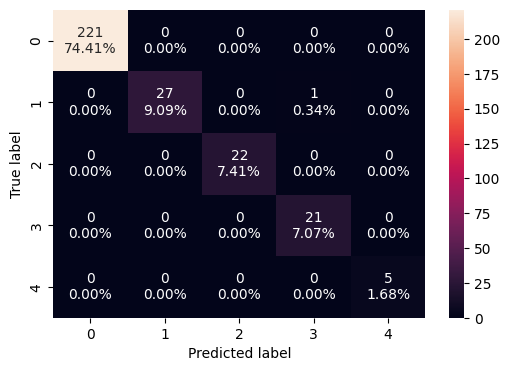

In [ ]:
print("Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_base, X_test_rf_base, y_test_rf_base)
print("Baseline Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_base, X_train_rf_base, y_train_rf_base)

Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:
Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


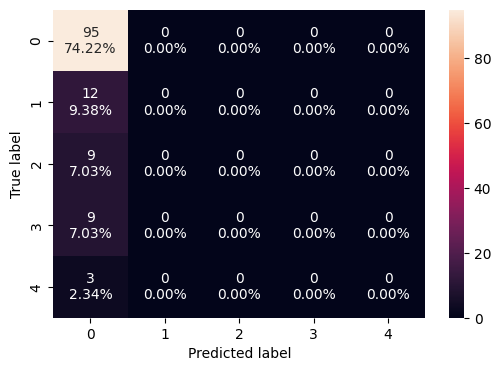

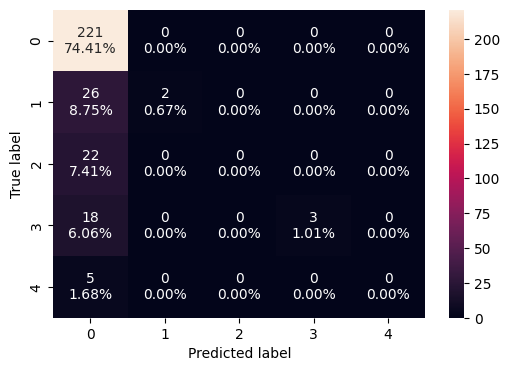

In [ ]:
print("Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_tuned, X_test_rf_tuned, y_test_rf_tuned)
print("Hyperparameter Tuned Random Forest Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_rf_tuned, X_train_rf_tuned, y_train_rf_tuned)

Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:
Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


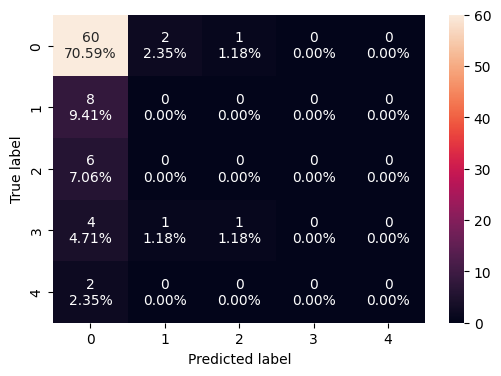

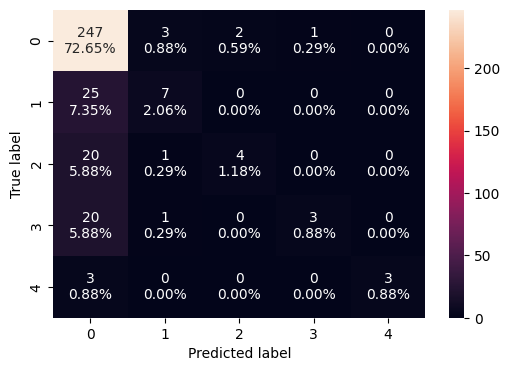

In [ ]:
print("Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Test Data: Confusion Matrix:")
confusion_matrix_sklearn(knn_base, X_test_knn_base, y_test_knn_base)
print("Baseline KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(knn_base, X_train_knn_base, y_train_knn_base)

Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:
Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:


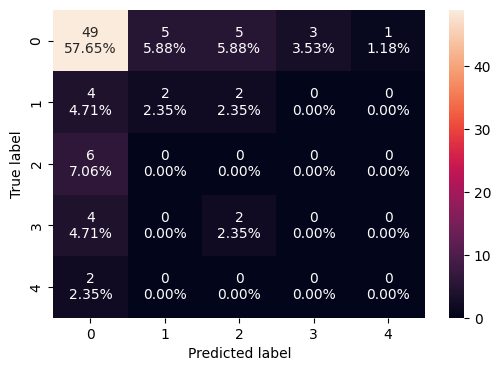

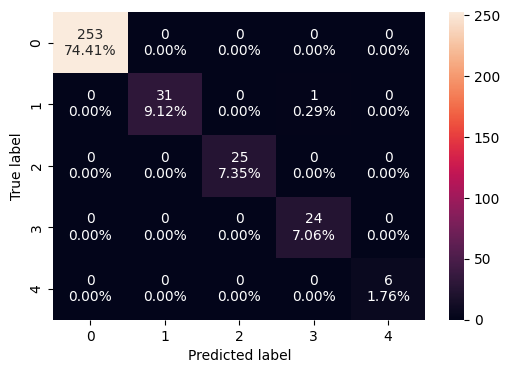

In [ ]:
print("Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Testing Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_knn_tuned, X_test_knn_tuned, y_test_knn_tuned)
print("Hyperparameter Tuned KNN Classification Model with Sentence Transformer Word Embeddings - Training Data: Confusion Matrix:")
confusion_matrix_sklearn(transformer_knn_tuned, X_train_knn_tuned, y_train_knn_tuned)

####**Classification Report of all the models**

In [ ]:
def print_results_to_dataframe(svm_training_accuracy_metrics, svm_test_accuracy_metrics,
                               gb_training_accuracy_metrics, gb_test_accuracy_metrics,
                               metrics_dt_train_baseline, metrics_dt_test_baseline,
                               metrics_dt_train_tuned, metrics_dt_test_tuned,
                               metrics_rf_train_baseline, metrics_rf_test_baseline,
                               metrics_rf_train_tuned, metrics_rf_test_tuned,
                               metrics_knn_train_baseline, metrics_knn_test_baseline,
                               metrics_knn_train_tuned, metrics_knn_test_tuned):
  """Prints the results of SVM and Gradient Boosting models into one DataFrame.

  Args:
    svm_training_accuracy_metrics: A dictionary of training accuracy metrics for the SVM model.
    svm_test_accuracy_metrics: A dictionary of test accuracy metrics for the SVM model.
    gb_training_accuracy_metrics: A dictionary of training accuracy metrics for the Gradient Boosting model.
    gb_test_accuracy_metrics: A dictionary of test accuracy metrics for the Gradient Boosting model.

  Returns:
    A pandas DataFrame containing the results.
  """
  # Create a list of dictionaries, where each dictionary represents a row in the DataFrame.
  data = [
      {'Model': 'SVM', 'Dataset': 'Training', **svm_training_accuracy_metrics},
      {'Model': 'SVM', 'Dataset': 'Test', **svm_test_accuracy_metrics},
      {'Model': 'Gradient Boosting', 'Dataset': 'Training', **gb_training_accuracy_metrics},
      {'Model': 'Gradient Boosting', 'Dataset': 'Test', **gb_test_accuracy_metrics},
      {'Model': 'Decision Tree Baseline', 'Dataset': 'Training', **metrics_dt_train_baseline},
      {'Model': 'Decision Tree Baseline', 'Dataset': 'Test', **metrics_dt_test_baseline},
      {'Model': 'Decision Tree Tuned', 'Dataset': 'Training', **metrics_dt_train_tuned},
      {'Model': 'Decision Tree Tuned', 'Dataset': 'Test', **metrics_dt_test_tuned},
      {'Model': 'Random Forest Baseline', 'Dataset': 'Training', **metrics_rf_train_baseline},
      {'Model': 'Random Forest Baseline', 'Dataset': 'Test', **metrics_rf_test_baseline},
      {'Model': 'Random Forest Tuned', 'Dataset': 'Training', **metrics_rf_train_tuned},
      {'Model': 'Random Forest Tuned', 'Dataset': 'Test', **metrics_rf_test_tuned},
      {'Model': 'KNN Baseline', 'Dataset': 'Training', **metrics_knn_train_baseline},
      {'Model': 'KNN Baseline', 'Dataset': 'Test', **metrics_knn_test_baseline},
      {'Model': 'KNN Tuned', 'Dataset': 'Training', **metrics_knn_train_tuned},
      {'Model': 'KNN Tuned', 'Dataset': 'Test', **metrics_knn_test_tuned}
      ]

  # Create the DataFrame from the list of dictionaries.
  df = pd.DataFrame(data)
  columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']
# Ensure this line is aligned with the other lines outside any block:
  df = df.drop(columns=columns_to_drop, errors='ignore')
  # Print the DataFrame.
  # display(df)

  return df

In [ ]:
final_model_results = print_results_to_dataframe(svm_training_accuracy_metrics, svm_test_accuracy_metrics,
                               gb_training_accuracy_metrics, gb_test_accuracy_metrics,
                               metrics_dt_train_baseline, metrics_dt_test_baseline,
                               metrics_dt_train_tuned, metrics_dt_test_tuned,
                               metrics_rf_train_baseline, metrics_rf_test_baseline,
                               metrics_rf_train_tuned, metrics_rf_test_tuned,
                               metrics_knn_train_baseline, metrics_knn_test_baseline,
                               metrics_knn_train_tuned, metrics_knn_test_tuned)

In [ ]:
nlp_file_path = '/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv'
final_model_results.to_csv(nlp_file_path, index=False)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv')
df.columns
columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']

# Ensure this line is aligned with the other lines outside any block:
df = df.drop(columns=columns_to_drop, errors='ignore')
display(df)

Model   Dataset  accuracy  precision    recall  f1_score  \
0                      SVM  Training  0.870588   0.890089  0.870588  0.853279   
1                      SVM      Test  0.847059   0.801017  0.847059  0.799109   
2        Gradient Boosting  Training  0.994118   0.994213  0.994118  0.994024   
3        Gradient Boosting      Test  1.000000   1.000000  1.000000  1.000000   
4   Decision Tree Baseline  Training  0.996633   0.996786  0.996633  0.996642   
5   Decision Tree Baseline      Test  0.601562   0.597656  0.601562  0.599263   
6      Decision Tree Tuned  Training  0.114478   0.032195  0.114478  0.035217   
7      Decision Tree Tuned      Test  0.093750   0.009000  0.093750  0.016423   
8   Random Forest Baseline  Training  0.996633   0.996786  0.996633  0.996642   
9   Random Forest Baseline      Test  0.742188   0.550842  0.742188  0.632357   
10     Random Forest Tuned  Training  0.760943   0.728161  0.760943  0.671369   
11     Random Forest Tuned      Test  0.742188   0.550842  0.742188  0.632357   
12            KNN Baseline  Training  0.776471   0.757993  0.776471  0.722985   
13            KNN Baseline      Test  0.705882   0.555882  0.705882  0.621966   
14               KNN Tuned  Training  0.997059   0.997176  0.997059  0.997065   
15               KNN Tuned      Test  0.600000   0.585624  0.600000  0.592561   

                                     confusion_matrix  
0   [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
1   [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
2   [[248   0   0   0   0]\n [  0  34   0   0   0]...  
3   [[68  0  0  0  0]\n [ 0  6  0  0  0]\n [ 0  0 ...  
4   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
5   [[75  7 11  2  0]\n [ 9  1  0  2  0]\n [ 7  0 ...  
6   [[  0 213   5   0   3]\n [  0  28   0   0   0]...  
7   [[ 0 93  1  0  1]\n [ 0 12  0  0  0]\n [ 0  9 ...  
8   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
9   [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
10  [[221   0   0   0   0]\n [ 26   2   0   0   0]...  
11  [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
12  [[247   3   2   1   0]\n [ 25   7   0   0   0]...  
13  [[60  2  1  0  0]\n [ 8  0  0  0  0]\n [ 6  0 ...  
14  [[253   0   0   0   0]\n [  0  31   0   1   0]...  
15  [[49  5  5  3  1]\n [ 4  2  2  0  0]\n [ 6  0 ...

#**Comparision of the Model Evaluation Metrices of all the models: Final Summary**
* We have developed 8 models to predict the accident levels from word embeddings created from Incident Description.
* Out of all the models, Gradient Boosting Model has performed very well in predicting all the accident levels.
* As can be observed in the above table, Gradient Boosting Model has accuracy close to ~100% in both training and testing data. It is also able to predict all the accident level (1, 2, 3, 4 and 5) accurately in the test dataset.
* All the other ML models like Decision Tree, Random Forest, KNN and SVM does not perform well in predict all the accident levels accurately.
* As next step, in Milestone 2, we would try out other Fully Connected Neutral Network models and Transformer models (LLM) to evaluate the model performance in predicting acccident levels and also create a UI based chat bot to draw conclusions from incdent description.

#**Milestone 2 Started**

Milestone 2: [ Score: 60 points ]

‣Input: Preprocessed output from Milestone-1‣

**Process:**

‣**Step 1:** Design, train and test Neural networks classifiers [ 5 points ]

‣**Step 2:** Design, train and test RNN or LSTM classifiers [ 10 points ]

‣**Step 3:** Choose the best performing classifier and pickle it. [ 5 points ]

‣**Step 4:** Final Report [40 Points]

‣Submission: Final report, Jupyter Notebook with all the steps in Milestone-1 and Milestone-2

## **Building Neural Network Classifiers on Word Embeddings to predict Accident Levels:**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Installing and Importing Necessary Libraries:**

In [4]:
# %tensorflow_version 2.x
!pip uninstall numpy pandas -y
!pip install numpy==1.26.0
!pip install pandas==2.2.2
#!pip install --upgrade cupy
!pip install scipy
!pip install scikit-learn
!pip install unidecode gensim -q
!pip install tensorflow
!pip install keras

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, which is not installed.
bokeh 3.6.3 requires pandas>=1.2, which is not installed.
plotnine 0.14.5 requires pandas>=2.2.0, which is not installed.
db-dtypes 1.4.2 requires pandas>=0.24.2, which is not installed.
shap 0.47.0 requires pandas, which is not installed.
geemap 0.35.3 requires pandas, which is not installed.
mizani 0.13.1 requires pandas>=2.2.0, which is not installed.
sklearn-pandas 2.2.0

In [1]:
!pip install unidecode gensim -q

In [2]:
# file ipython-input-2-9f2e0ada25d0
# to read and manipulate the data
import numpy as np
# setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt


# Command to tell Python to actually display the graphs
%matplotlib inline

# to use regular expressions for manipulating text data
import re

# to manipulate string data
import string

# to remove the accented characters
#import unidecode
# to perform tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the SpaCy library
import spacy as spacy
nlp = spacy.load('en_core_web_sm')    # loading the envrionment config

# Used in tokenization
from spacy.lang.en import English

# To create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# To create TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# To import Word2Vec
from gensim.models import Word2Vec

# Converting the Stanford GloVe model vector format to word2vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# to load transformer models
 #from sentence_transformers import SentenceTransformer
 #from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline

# Deep Learning library
import torch

# To encode the target variable
#from sklearn.preprocessing import LabelEncoder

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# To tune the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To build Classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for balancing data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# to cluster the data
from sklearn.cluster import KMeans

# Library for Neural Network
import tensorflow
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers

import h5py

## **Loading the cleaned dataset post data pre-processing:**

In [2]:
import pandas as pd
# loading the clean data after data pre-processing
clean_data = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv")
#delimiter="\t", encoding='utf-8')

## **Creating Word Embeddings using Word2Vec:**

In [4]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in clean_data['cleaned_description'].values]

In [5]:
# Creating an instance of Word2Vec
vec_size = 100
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [6]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 3200


In [7]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [8]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [9]:
# creating a dataframe of the vectorized documents
df_Word2Vec = pd.DataFrame(clean_data['cleaned_description'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_Word2Vec

Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0    -0.006839   0.012356   0.006041   0.001257  -0.002502  -0.027932   
1    -0.002521   0.005845   0.003012   0.000072  -0.000039  -0.011448   
2    -0.008953   0.015761   0.005618   0.001797  -0.000223  -0.029328   
3    -0.007637   0.011900   0.003532   0.001644   0.002369  -0.024184   
4    -0.005406   0.009269   0.003877   0.001386  -0.001145  -0.020589   
..         ...        ...        ...        ...        ...        ...   
420  -0.008006   0.010219   0.004805   0.000646  -0.001109  -0.024637   
421  -0.008265   0.015442   0.003665   0.001650   0.001312  -0.023665   
422  -0.009962   0.015222   0.006702   0.001507  -0.000594  -0.029420   
423  -0.013206   0.016635   0.007518   0.002879  -0.000437  -0.036070   
424  -0.006685   0.010177   0.003507   0.001837  -0.001373  -0.018277   

     Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 90  Feature 91  \
0     0.005913   0.032849  -0.008209  -0.007857  ...    0.019230    0.007790   
1     0.001256   0.014717  -0.001914  -0.001109  ...    0.008116    0.003480   
2     0.008657   0.037693  -0.008679  -0.007876  ...    0.020592    0.008608   
3     0.004941   0.029818  -0.006917  -0.006943  ...    0.016170    0.005600   
4     0.006202   0.025450  -0.007565  -0.005041  ...    0.016618    0.005439   
..         ...        ...        ...        ...  ...         ...         ...   
420   0.006623   0.031021  -0.006541  -0.006820  ...    0.016505    0.007182   
421   0.007238   0.030869  -0.010848  -0.004110  ...    0.016849    0.006429   
422   0.005810   0.035513  -0.007798  -0.007467  ...    0.021520    0.006602   
423   0.007472   0.046092  -0.012218  -0.007039  ...    0.028998    0.010521   
424   0.005620   0.020421  -0.007720  -0.005650  ...    0.013696    0.007008   

     Feature 92  Feature 93  Feature 94  Feature 95  Feature 96  Feature 97  \
0      0.000490    0.000789    0.026689    0.018057    0.012241   -0.016562   
1     -0.000412   -0.000690    0.011348    0.007263    0.004677   -0.005650   
2      0.002652    0.002610    0.033617    0.018990    0.012099   -0.018917   
3      0.003019    0.000185    0.024927    0.016253    0.010295   -0.014311   
4      0.002742    0.002084    0.023514    0.014475    0.008298   -0.012033   
..          ...         ...         ...         ...         ...         ...   
420    0.002609    0.000688    0.029899    0.020453    0.010570   -0.014956   
421    0.002704    0.001409    0.030092    0.018729    0.013097   -0.017011   
422    0.002217    0.001090    0.033118    0.021634    0.010727   -0.019247   
423    0.003696    0.003236    0.038603    0.026819    0.013712   -0.023739   
424   -0.000107   -0.000061    0.021594    0.014954    0.008095   -0.011953   

     Feature 98  Feature 99  
0      0.009497   -0.003208  
1      0.004888   -0.000947  
2      0.007229   -0.005442  
3      0.006436   -0.006603  
4      0.006530   -0.006159  
..          ...         ...  
420    0.008753   -0.009386  
421    0.009506   -0.007924  
422    0.007618   -0.003853  
423    0.007701   -0.006994  
424    0.005931   -0.003012  

[425 rows x 100 columns]

In [10]:
# Defining a function for NLP preprocessing
import unicodedata #Import the unicodedata module to use its functions

def des_cleaning(text):

    # Initialize the object for Lemmatizer class
    lemmatizer = nltk.stem.WordNetLemmatizer()

    # Set the stopwords to English
    stopwords = nltk.corpus.stopwords.words('english')

    # Normalize the text in order deal with accented words and unicodes
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())

    # Consider only alphabets and numbers from the text
    words = re.sub(r'[^a-zA-Z.,!?/:;\"\'\s]', '', text).split()

    # Consider the words which are not in stopwords of english and lemmatize them
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lems = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]

    # #remove non-alphabetical characters like '(', '.' or '!'
    # alphas = [i for i in lems if (i.isalpha() or i.isnumeric()) and (i not in stopwords)]

    words = [w for w in lems if len(w)>2]

    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


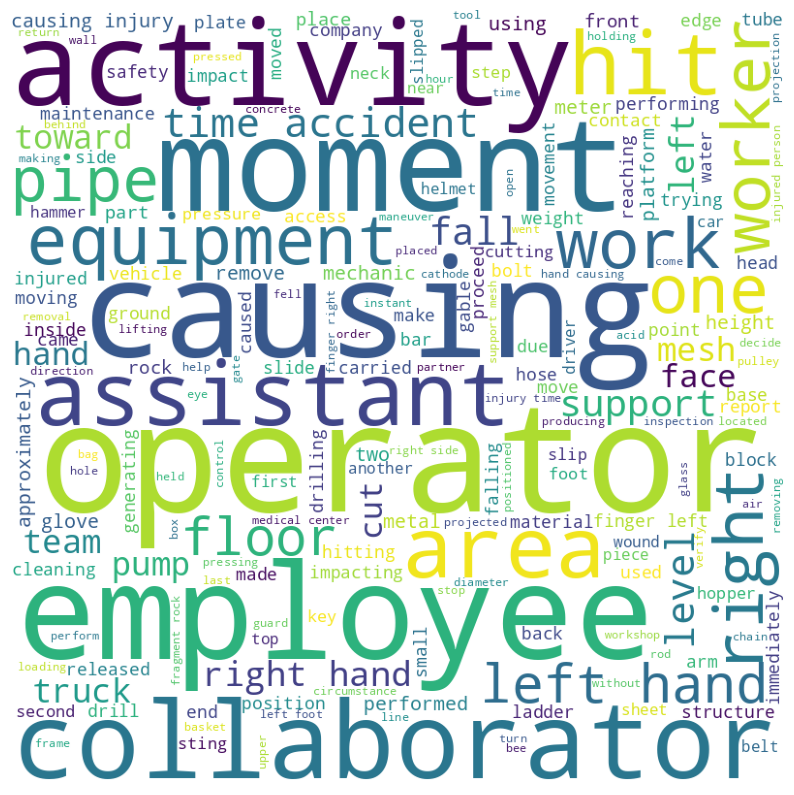

In [11]:
!pip install wordcloud
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython import get_ipython
from IPython.display import display

# Download the 'stopwords' and 'wordnet' datasets
nltk.download('stopwords')
nltk.download('wordnet') # Download the wordnet dataset

# Define the stopwords
stopwords = nltk.corpus.stopwords.words('english') #Assign stopwords to a variable that's accessible to the WordCloud function

#Showing Word Cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords, #Use the stopwords variable here
                min_font_size = 10).generate(' '.join(des_cleaning(' '.join(clean_data['cleaned_description'].sum().split()))))

plt.figure(figsize = (10, 15), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

## **Model Building: Feed-Forward Neural Network Model: Tuned Model with Weight Initializer, Batch Normalization, Dropout, Adam Optimizer with class balanced weights.**

### Below function to compute confusion matrix and other metrics (Precision, Recall, F1 Score) to check performance of the classification model on training and test dataset:

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, roc_auc_score, roc_curve, precision_recall_curve
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def calculate_accuracy_metrics(y_true, y_pred, y_score=None):  # Added y_score for ROC and PR curves
    """
    Calculates and stores accuracy metrics in a dictionary.

    Args:
        y_true (array-like): The true target values.
        y_pred (array-like): The predicted target values.
        y_score (array-like, optional): Target scores, needed for ROC and PR curves. Defaults to None.

    Returns:
        dict: A dictionary containing the accuracy metrics.
    """

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate ROC AUC and curve if y_score is provided
    roc_auc = None
    fpr, tpr, _ = None, None, None  # Initialize for ROC curve
    if y_score is not None:
        roc_auc = roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')  # For multi-class
        fpr, tpr, _ = roc_curve(y_true, y_score)  # Assuming binary classification for simplicity

    # Calculate Precision-Recall curve if y_score is provided
    precision_curve, recall_curve, _ = None, None, None  # Initialize for PR curve
    if y_score is not None:
        precision_curve, recall_curve, _ = precision_recall_curve(y_true, y_score)

    metrics = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": conf_matrix,
        "roc_auc_score": roc_auc,
        "roc_curve": (fpr, tpr),  # Store ROC curve points
        "precision_recall_curve": (precision_curve, recall_curve)  # Store PR curve points
    }

    return metrics
#Function to Plot Confusion Matrix
def plot_confusion_matrix(model_name, y_true, y_pred, label_mapping):
    """Plots a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=label_mapping.keys(), columns=label_mapping.keys())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
# Define label_mapping - Replace with your actual label mapping
label_mapping = {1: 'level_1_risk', 2: 'level_2_risk', 3: 'level_3_risk',4: 'level_4_risk',5: 'level_5_risk'} # Example label mapping - adjust with actual mapping
# Assuming 'y' is a Pandas Series containing your true target values
# Replace this with your actual 'y' data
y = pd.Series([1, 2, 3, 4, 5, 1, 2, 3, 4, 5]) # Example y data - replace with your actual data

# Get unique labels and create a reverse mapping. This step is important to get the actual label names for the confusion matrix plot.
label_mapping_reversed = {v: k for k, v in y.map(lambda x: label_mapping[x] if x in label_mapping else x).to_dict().items()}

### **Tuned Neural Network Model with Word2Vec Word Embeddings:**

In [13]:
# Storing independent variable
X = df_Word2Vec.copy()

# Storing target variable
y = clean_data['ACCIDENT_LEVEL']

In [14]:
# Split data into training and testing set.
X_train_nn_tuned, X_test_nn_tuned, y_train_nn_tuned, y_test_nn_tuned = train_test_split(X , y, test_size=0.30, stratify=y, random_state = 42)

In [15]:
# Checking the shape of train and test sets
print(X_train_nn_tuned.shape)
print(X_test_nn_tuned.shape)
print(y_train_nn_tuned.shape)
print(y_test_nn_tuned.shape)

(297, 100)
(128, 100)
(297,)
(128,)


* Transforming the Labels into formats acceptable by Neural Network Model:

In [16]:
# Converting the Target variable unique values into Labels

y_train_nn_tuned_encoded = pd.get_dummies(y_train_nn_tuned, columns=['ACCIDENT_LEVEL'], dtype=int)
y_test_nn_tuned_encoded = pd.get_dummies(y_test_nn_tuned, columns=['ACCIDENT_LEVEL'], dtype=int)

In [17]:
print(y_train_nn_tuned_encoded.shape)
print(y_test_nn_tuned_encoded.shape)

(297, 5)
(128, 5)


* Building the Neural Network Model: Tuned Model with Weight Initializer, Batch Normalization, Dropout and Adam Optimizer:

In [18]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tensorflow.random.set_seed(42)

* Used balanced class weight as the data is imbalanced:

In [19]:
# Calculate class weights
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train_nn_tuned), y=y_train_nn_tuned)

# Convert class weights to a dictionary
class_weights = {i: class_weights[i] for i in range(len(class_weights))}

In [20]:
def mlp_model():
    model = Sequential()

    model.add(Dense(256, input_shape = (100, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5))
    model.add(Activation('softmax'))

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [21]:
model = mlp_model()
history = model.fit(X_train_nn_tuned, y_train_nn_tuned_encoded, validation_data=(X_test_nn_tuned, y_test_nn_tuned_encoded), class_weight=class_weights, epochs = 50, verbose = 1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.3070 - loss: 1.7059 - val_accuracy: 0.0938 - val_loss: 1.6093
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3148 - loss: 1.4289 - val_accuracy: 0.0938 - val_loss: 1.6200
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.3032 - loss: 1.2151 - val_accuracy: 0.0703 - val_loss: 1.6241
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3265 - loss: 1.2407 - val_accuracy: 0.0703 - val_loss: 1.6197
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.3628 - loss: 1.0716 - val_accuracy: 0.0703 - val_loss: 1.6151
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3683 - loss: 1.0402 - val_accuracy: 0.0703 - val_loss: 1.6068
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.4202 - loss: 1.0655 - val_accuracy: 0.0703 - val_loss: 1.5950
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4854 - loss: 0.8685 - val_accuracy: 0.0703 -

In [22]:
results = model.evaluate(X_test_nn_tuned, y_test_nn_tuned_encoded)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7656 - loss: 0.9535 


* Capturing the learning history per epoch for loss and accuracy on test data:

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7656 - loss: 0.9535


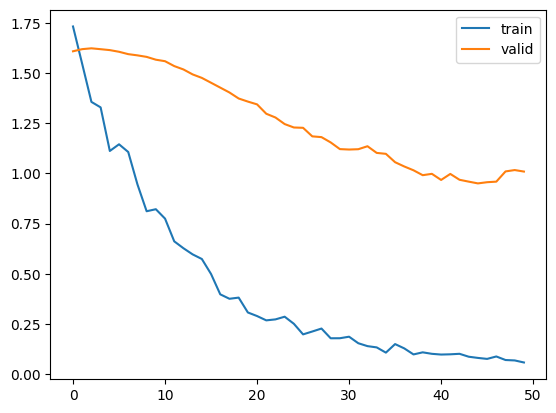

In [23]:
# Capturing learning history per epoch for loss
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test_nn_tuned, y_test_nn_tuned_encoded)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7656 - loss: 0.9535 


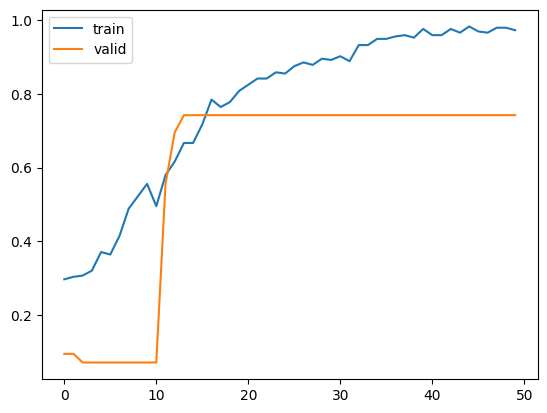

In [24]:
# Capturing learning history per epoch for accuracy
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model.evaluate(X_test_nn_tuned, y_test_nn_tuned_encoded)

In [25]:
#Making predictions on the train data
y_pred_train_nn_tuned = model.predict(X_train_nn_tuned)

#Converting probabilities to class labels
y_pred_train_classes_nn_tuned = np.argmax(y_pred_train_nn_tuned, axis=1)

#Calculating the probability of the predicted class
y_pred_train_max_probas_nn_tuned = np.max(y_pred_train_nn_tuned, axis=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [26]:
#Making predictions on the test data
y_pred_test_nn_tuned = model.predict(X_test_nn_tuned)

#Converting probabilities to class labels
y_pred_test_classes_nn_tuned = np.argmax(y_pred_test_nn_tuned, axis=1)

#Calculating the probability of the predicted class
y_pred_test_max_probas_nn_tuned = np.max(y_pred_test_nn_tuned, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 


In [27]:
# converting the class labels to actuals data labels in the data
y_pred_train_labels_nn_tuned = y_pred_train_classes_nn_tuned + 1
y_pred_test_labels_nn_tuned = y_pred_test_classes_nn_tuned + 1

### Tuned Neural Network Classification Model with Word2Vec Word Embeddings: Performance on Training Data & Testing Data:

In [28]:
metrics_nn_train_tuned = calculate_accuracy_metrics(y_train_nn_tuned, y_pred_train_labels_nn_tuned)
metrics_nn_test_tuned = calculate_accuracy_metrics(y_test_nn_tuned, y_pred_test_labels_nn_tuned)
print("Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_nn_test_tuned["accuracy"])
print("Precision:", metrics_nn_test_tuned["precision"])
print("Recall:", metrics_nn_test_tuned["recall"])
print("F1-Score:", metrics_nn_test_tuned["f1_score"])
print("Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_nn_train_tuned["accuracy"])
print("Precision:", metrics_nn_train_tuned["precision"])
print("Recall:", metrics_nn_train_tuned["recall"])
print("F1-Score:", metrics_nn_train_tuned["f1_score"])

Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Test Data: Classification Report:
Accuracy: 0.7421875
Precision: 0.55084228515625
Recall: 0.7421875
F1-Score: 0.632357062780269
Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Training Data: Classification Report:
Accuracy: 0.7508417508417509
Precision: 0.7224333732808309
Recall: 0.7508417508417509
F1-Score: 0.6503243331388455


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Tuned Neural Network Classification Model with Word2Vec Word Embeddings: Confusion Matrix on Training Data & Testing Data:

In [8]:
accident_levels_list = ["1", "2", "3", "4", "5"]

Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Test Data: Confusion Matrix:


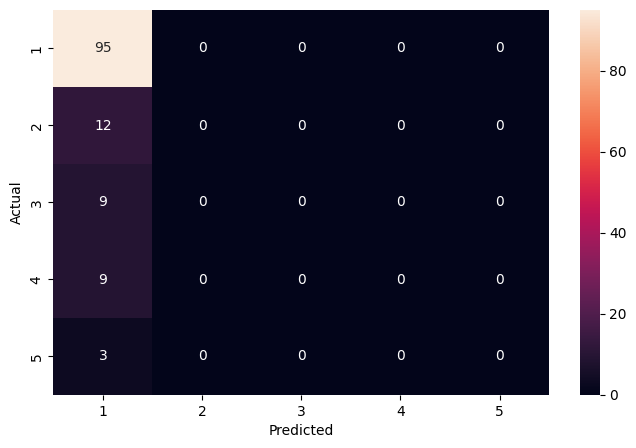

Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Training Data: Confusion Matrix:


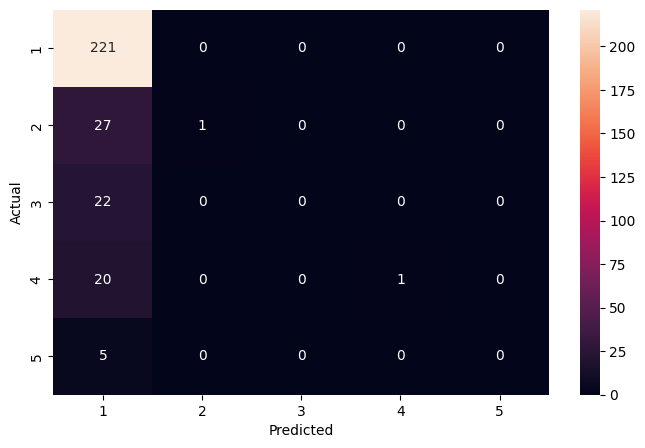

In [30]:
print("Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Test Data: Confusion Matrix:")
cm = confusion_matrix(y_test_nn_tuned, y_pred_test_labels_nn_tuned)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Training Data: Confusion Matrix:")
cm = confusion_matrix(y_train_nn_tuned, y_pred_train_labels_nn_tuned)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Tuned Neural Network Classification Model with Word2Vec Word Embeddings: Observations:
* The Neural Network Classification Model is having similar accuracy of ~74% in training and testing data respectively.
* However, the model is still not performing well in predicting all accident level accurately.
* As observed from the test data (and also training data) that model performs very poorly in predicting accident level 2, 3, 4 and 5. It is predicting all accident levels as 1. Balanced class weights is not able to solve the imbalance dataset issue.
* Weighted average of Recall, Precision and F1 score are low at 74.2%, 55% and 63.2% respectively on test data.


In [5]:
def print_results_to_dataframe(metrics_nn_train_tuned, metrics_nn_test_tuned
                               ):
  """Prints the results of SVM and Gradient Boosting models into one DataFrame.

  Args:
    mlp_training_accuracy_metrics: A dictionary of training accuracy metrics for the SVM model.
    mlp_test_accuracy_metrics: A dictionary of test accuracy metrics for the SVM model.
    lstm_training_accuracy_metrics: A dictionary of training accuracy metrics for the Gradient Boosting model.
    lstm_test_accuracy_metrics: A dictionary of test accuracy metrics for the Gradient Boosting model.

  Returns:
    A pandas DataFrame containing the results.
  """
  # Create a list of dictionaries, where each dictionary represents a row in the DataFrame.
  data = [
      {'Model': 'Base MLP', 'Dataset': 'Training', **metrics_nn_train_tuned},
      {'Model': 'Base MLP', 'Dataset': 'Test', **metrics_nn_train_tuned},
      {'Model': 'Tuuned MLP', 'Dataset': 'Training', **metrics_nn_train_tuned},
      {'Model': 'Tuned MLP', 'Dataset': 'Test', **metrics_nn_train_tuned},
      ]

  # Create the DataFrame from the list of dictionaries.
  final_df = pd.DataFrame(data)
  columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']
# Ensure this line is aligned with the other lines outside any block:
  final_df = final_df.drop(columns=columns_to_drop, errors='ignore')
  # Print the DataFrame.
  # display(df)

  return final_df

In [32]:
final_model_results = print_results_to_dataframe(metrics_nn_train_tuned, metrics_nn_test_tuned)

In [33]:
import pandas as pd
df_model_comp=pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv')
df_model_comp.columns
columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']

# Ensure this line is aligned with the other lines outside any block:
df_model_comp = df_model_comp.drop(columns=columns_to_drop, errors='ignore')
display(df_model_comp)

Model   Dataset  accuracy  precision    recall  f1_score  \
0                      SVM  Training  0.870588   0.890089  0.870588  0.853279   
1                      SVM      Test  0.847059   0.801017  0.847059  0.799109   
2        Gradient Boosting  Training  0.994118   0.994213  0.994118  0.994024   
3        Gradient Boosting      Test  1.000000   1.000000  1.000000  1.000000   
4   Decision Tree Baseline  Training  0.996633   0.996786  0.996633  0.996642   
5   Decision Tree Baseline      Test  0.601562   0.597656  0.601562  0.599263   
6      Decision Tree Tuned  Training  0.114478   0.032195  0.114478  0.035217   
7      Decision Tree Tuned      Test  0.093750   0.009000  0.093750  0.016423   
8   Random Forest Baseline  Training  0.996633   0.996786  0.996633  0.996642   
9   Random Forest Baseline      Test  0.742188   0.550842  0.742188  0.632357   
10     Random Forest Tuned  Training  0.760943   0.728161  0.760943  0.671369   
11     Random Forest Tuned      Test  0.742188   0.550842  0.742188  0.632357   
12            KNN Baseline  Training  0.776471   0.757993  0.776471  0.722985   
13            KNN Baseline      Test  0.705882   0.555882  0.705882  0.621966   
14               KNN Tuned  Training  0.997059   0.997176  0.997059  0.997065   
15               KNN Tuned      Test  0.600000   0.585624  0.600000  0.592561   
16                Base MLP  Training  0.757576   0.706036  0.757576  0.664080   
17                Base MLP      Test  0.757576   0.706036  0.757576  0.664080   
18              Tuuned MLP  Training  0.757576   0.706036  0.757576  0.664080   
19               Tuned MLP      Test  0.757576   0.706036  0.757576  0.664080   
20                Base MLP  Training  0.757576   0.706036  0.757576  0.664080   
21                Base MLP      Test  0.757576   0.706036  0.757576  0.664080   
22              Tuuned MLP  Training  0.757576   0.706036  0.757576  0.664080   
23               Tuned MLP      Test  0.757576   0.706036  0.757576  0.664080   

                                     confusion_matrix  
0   [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
1   [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
2   [[248   0   0   0   0]\n [  0  34   0   0   0]...  
3   [[68  0  0  0  0]\n [ 0  6  0  0  0]\n [ 0  0 ...  
4   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
5   [[75  7 11  2  0]\n [ 9  1  0  2  0]\n [ 7  0 ...  
6   [[  0 213   5   0   3]\n [  0  28   0   0   0]...  
7   [[ 0 93  1  0  1]\n [ 0 12  0  0  0]\n [ 0  9 ...  
8   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
9   [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
10  [[221   0   0   0   0]\n [ 26   2   0   0   0]...  
11  [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
12  [[247   3   2   1   0]\n [ 25   7   0   0   0]...  
13  [[60  2  1  0  0]\n [ 8  0  0  0  0]\n [ 6  0 ...  
14  [[253   0   0   0   0]\n [  0  31   0   1   0]...  
15  [[49  5  5  3  1]\n [ 4  2  2  0  0]\n [ 6  0 ...  
16  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
17  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
18  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
19  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
20  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
21  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
22  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
23  [[221   0   0   0   0]\n [ 28   0   0   0   0]...

In [48]:
# code to append final_model_results data frame with df_model_comp dataframe

# Assuming df_model_comp and final_model_results are your DataFrames
df_model_comp = pd.concat([df_model_comp, final_model_results], ignore_index=True)

# code to write df_model_comp data frame to csv
df_model_comp.to_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv', index=False)
display(df_model_comp)

Model   Dataset  accuracy  precision    recall  f1_score  \
0                      SVM  Training  0.870588   0.890089  0.870588  0.853279   
1                      SVM      Test  0.847059   0.801017  0.847059  0.799109   
2        Gradient Boosting  Training  0.994118   0.994213  0.994118  0.994024   
3        Gradient Boosting      Test  1.000000   1.000000  1.000000  1.000000   
4   Decision Tree Baseline  Training  0.996633   0.996786  0.996633  0.996642   
5   Decision Tree Baseline      Test  0.601562   0.597656  0.601562  0.599263   
6      Decision Tree Tuned  Training  0.114478   0.032195  0.114478  0.035217   
7      Decision Tree Tuned      Test  0.093750   0.009000  0.093750  0.016423   
8   Random Forest Baseline  Training  0.996633   0.996786  0.996633  0.996642   
9   Random Forest Baseline      Test  0.742188   0.550842  0.742188  0.632357   
10     Random Forest Tuned  Training  0.760943   0.728161  0.760943  0.671369   
11     Random Forest Tuned      Test  0.742188   0.550842  0.742188  0.632357   
12            KNN Baseline  Training  0.776471   0.757993  0.776471  0.722985   
13            KNN Baseline      Test  0.705882   0.555882  0.705882  0.621966   
14               KNN Tuned  Training  0.997059   0.997176  0.997059  0.997065   
15               KNN Tuned      Test  0.600000   0.585624  0.600000  0.592561   
16                Base MLP  Training  0.757576   0.706036  0.757576  0.664080   
17                Base MLP      Test  0.757576   0.706036  0.757576  0.664080   
18              Tuuned MLP  Training  0.757576   0.706036  0.757576  0.664080   
19               Tuned MLP      Test  0.757576   0.706036  0.757576  0.664080   
20              Tuuned LLM  Training  0.870588   0.890089  0.870588  0.853279   
21               Tuned LLM      Test  0.847059   0.801017  0.847059  0.799109   
22                Base MLP  Training  0.750842   0.722433  0.750842  0.650324   
23                Base MLP      Test  0.750842   0.722433  0.750842  0.650324   
24              Tuuned MLP  Training  0.750842   0.722433  0.750842  0.650324   
25               Tuned MLP      Test  0.750842   0.722433  0.750842  0.650324   
26                Base MLP  Training  0.750842   0.722433  0.750842  0.650324   
27                Base MLP      Test  0.750842   0.722433  0.750842  0.650324   
28              Tuuned MLP  Training  0.750842   0.722433  0.750842  0.650324   
29               Tuned MLP      Test  0.750842   0.722433  0.750842  0.650324   

                                     confusion_matrix  
0   [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
1   [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
2   [[248   0   0   0   0]\n [  0  34   0   0   0]...  
3   [[68  0  0  0  0]\n [ 0  6  0  0  0]\n [ 0  0 ...  
4   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
5   [[75  7 11  2  0]\n [ 9  1  0  2  0]\n [ 7  0 ...  
6   [[  0 213   5   0   3]\n [  0  28   0   0   0]...  
7   [[ 0 93  1  0  1]\n [ 0 12  0  0  0]\n [ 0  9 ...  
8   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
9   [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
10  [[221   0   0   0   0]\n [ 26   2   0   0   0]...  
11  [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
12  [[247   3   2   1   0]\n [ 25   7   0   0   0]...  
13  [[60  2  1  0  0]\n [ 8  0  0  0  0]\n [ 6  0 ...  
14  [[253   0   0   0   0]\n [  0  31   0   1   0]...  
15  [[49  5  5  3  1]\n [ 4  2  2  0  0]\n [ 6  0 ...  
16  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
17  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
18  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
19  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
20  [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
21  [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
22  [[221, 0, 0, 0, 0], [27, 1, 0, 0, 0], [22, 0, ...  
23  [[221, 0, 0, 0, 0], [27, 1, 0, 0, 0], [22, 0, ...  
24  [[221, 0, 0, 0, 0], [27, 1, 0, 0, 0], [22, 0, ...  
25  [[221, 0, 0, 0, 0], [27, 1, 0, 0, 0], [22, 0, ...

#**Code start to Implement RNN Model**

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix



# 1. Load and preprocess the data:
import pandas as pd
# loading the clean data after data pre-processing
clean_data = pd.read_csv("/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv")
#delimiter="\t", encoding='utf-8')
# Assuming your data is in a pandas DataFrame called 'df'
X = clean_data['cleaned_description'].values
y = clean_data['ACCIDENT_LEVEL'].values

# 2. Tokenize the text data:
# This converts the text descriptions into numerical representations
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') # Consider adjusting num_words
tokenizer.fit_on_texts(X)
X_sequences_rnn = tokenizer.texts_to_sequences(X)
X_padded_rnn = pad_sequences(X_sequences_rnn, padding='post', maxlen=100) # Consider adjusting maxlen

# 3. Split the data into training and testing sets:
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(X_padded_rnn, y, test_size=0.2, random_state=42)

# 4. Build the RNN model:
model = Sequential()
model.add(Embedding(5000, 128, input_length=100)) # Consider adjusting embedding dimensions
model.add(LSTM(64)) # Consider adjusting the number of LSTM units
model.add(Dense(1, activation='sigmoid')) # Assuming binary classification for ACCIDENT_LEVEL

# 5. Compile the model:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the model:
model.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32) # Consider adjusting epochs and batch_size

# 7. Evaluate the model:
_, accuracy = model.evaluate(X_test_rnn, y_test_rnn)
print('Accuracy: {}'.format(accuracy))
# 10. Generate predictions:
y_pred_test_rnn = model.predict(X_test_rnn)
y_pred_test_classes = (y_pred_test_rnn > 0.5).astype(int) # Convert probabilities to class labels
y_pred_train_rnn = model.predict(X_train_rnn)
y_pred_train_classes = (y_pred_train_rnn > 0.5).astype(int) # Convert probabilities to class labels



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7364 - loss: 0.0705
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7257 - loss: -2.6632
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7214 - loss: -4.0726
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7098 - loss: -5.6078
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.6981 - loss: -6.9627
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7164 - loss: -7.3494
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.7321 - loss: -6.4533
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7381 - loss: -6.7746
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.7398 - loss: -7.2539
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7165 - loss: -8.5417
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8141 - loss: -6.5723 
Accuracy: 0.800000011920929
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
11/1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [18]:
# Print classification report and confusion matrix:
print("Test data Classification Report")
print(classification_report(y_test_rnn, y_pred_test_classes))
print("Training data Classification Report")
print(classification_report(y_train_rnn, y_pred_train_classes))

metrics_lstm_train_base = calculate_accuracy_metrics(y_train_rnn, y_pred_train_classes)
metrics_lstm_test_base = calculate_accuracy_metrics(y_test_rnn, y_pred_test_classes)

Test data Classification Report
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        68
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2

    accuracy                           0.80        85
   macro avg       0.16      0.20      0.18        85
weighted avg       0.64      0.80      0.71        85

Training data Classification Report
              precision    recall  f1-score   support

           1       0.73      1.00      0.84       248
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        26
           5       0.00      0.00      0.00         6

    accuracy                           0.73       340
   macro avg       0.15      0.20      0.17       340
weighted 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

LSTM Classification Model with Word2Vec Word Embeddings - Test Data: Confusion Matrix:


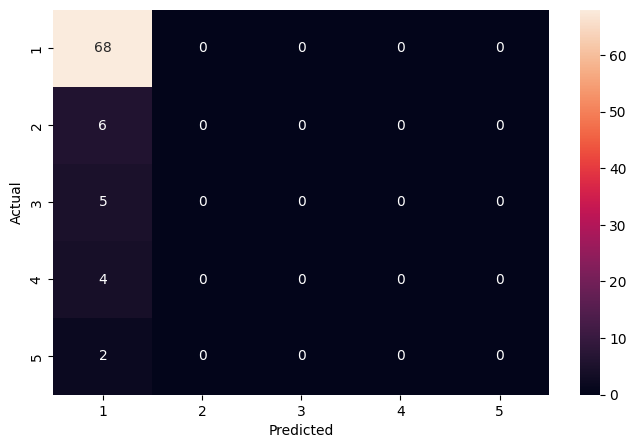

LSTM Classification Model with Word2Vec Word Embeddings - Training Data: Confusion Matrix:


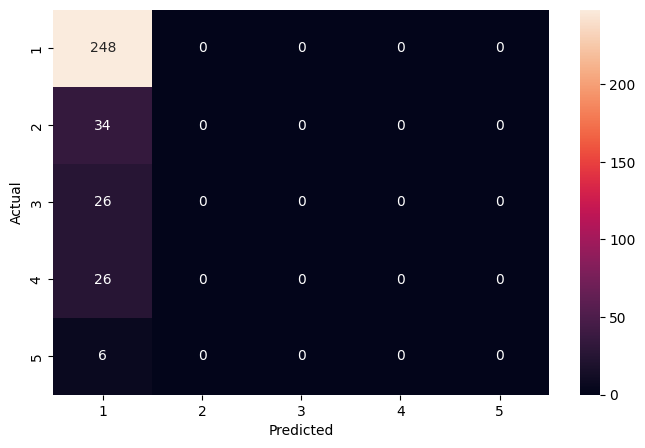

In [19]:
print("LSTM Classification Model with Word2Vec Word Embeddings - Test Data: Confusion Matrix:")
cm = confusion_matrix(y_test_rnn, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("LSTM Classification Model with Word2Vec Word Embeddings - Training Data: Confusion Matrix:")
cm = confusion_matrix(y_train_rnn, y_pred_train_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#**RNN after Tuning Models start**

In [20]:
# Code to Tune LSTM model with WordToVec

import nltk
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend
import tensorflow
from sklearn.utils import class_weight
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'clean_data' and 'df_Word2Vec' are defined from the previous code

# Assuming your data is in a pandas DataFrame called 'df'
X_rnn_tuned = clean_data['cleaned_description'].values
y_rnn_tuned = clean_data['ACCIDENT_LEVEL'].values

y_rnn_tuned = y_rnn_tuned - 1
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_rnn_tuned)
X_sequences_rnn_tuned = tokenizer.texts_to_sequences(X_rnn_tuned)
X_padded_rnn_tuned = pad_sequences(X_sequences_rnn_tuned, padding='post', maxlen=100)


# Split the data
X_train_rnn_tuned, X_test_rnn_tuned, y_train_rnn_tuned, y_test_rnn_tuned = train_test_split(X_padded_rnn_tuned, y_rnn_tuned, test_size=0.2, random_state=42, stratify=y_rnn_tuned)

# Define the LSTM model
def lstm_model():
    model = Sequential()
    model.add(Embedding(5000, 128, input_length=100))
    model.add(LSTM(64, return_sequences=True))  # Add return_sequences=True
    model.add(LSTM(32))
    model.add(Dense(5, activation='softmax'))  # Adjust for 5 classes with softmax
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = lstm_model()

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_rnn_tuned), y=y_train_rnn_tuned)
class_weights_dict = dict(enumerate(class_weights))


# Train the model
history = model.fit(X_train_rnn_tuned, y_train_rnn_tuned, epochs=50, batch_size=32, validation_split=0.2, class_weight = class_weights_dict, verbose=1) #add validation data and class weights

#Evaluate the Model
_, accuracy = model.evaluate(X_test_rnn_tuned, y_test_rnn_tuned)
print('Accuracy: {}'.format(accuracy))

# Predict
y_pred_test_rnn_tuned = model.predict(X_test_rnn_tuned)
y_pred_test_classes_rnn_tuned = np.argmax(y_pred_test_rnn_tuned, axis=1)  # Convert probabilities to class labels using argmax

y_pred_train_rnn_tuned = model.predict(X_train_rnn_tuned)
y_pred_train_classes_rnn_tuned = np.argmax(y_pred_train_rnn_tuned, axis=1)  # Convert probabilities to class labels using argmax



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 414ms/step - accuracy: 0.0374 - loss: 1.9582 - val_accuracy: 0.0000e+00 - val_loss: 1.6521
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.0104 - loss: 1.4893 - val_accuracy: 0.0000e+00 - val_loss: 1.6370
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.0221 - loss: 1.6873 - val_accuracy: 0.0000e+00 - val_loss: 1.6524
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.0282 - loss: 1.8287 - val_accuracy: 0.0000e+00 - val_loss: 1.6575
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.0241 - loss: 1.6114 - val_accuracy: 0.0000e+00 - val_loss: 1.6476
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.0201 - loss: 1.6812 - val_accuracy: 0.0000e+00 - val_loss: 1.6432
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.0211 - loss: 1.6198 - val_accuracy: 0.0000e+00 - val_loss: 1.6565
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.0195 - loss: 1.5867 - val_accuracy: 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [21]:
# Print classification report and confusion matrix
print("Test data Classification Report")
print(classification_report(y_test_rnn_tuned, y_pred_test_classes_rnn_tuned))
print("Training data Classification Report")
print(classification_report(y_train_rnn_tuned, y_pred_train_classes_rnn_tuned))

metrics_lstm_train_tuned = calculate_accuracy_metrics(y_train_rnn_tuned, y_pred_train_classes_rnn_tuned)
metrics_lstm_test_tuned = calculate_accuracy_metrics(y_test_rnn_tuned, y_pred_test_classes_rnn_tuned)


Test data Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00         8
           2       0.07      1.00      0.13         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.07        85
   macro avg       0.01      0.20      0.03        85
weighted avg       0.01      0.07      0.01        85

Training data Classification Report
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       253
           1       0.00      0.00      0.00        32
           2       0.08      1.00      0.14        25
           3       0.00      0.00      0.00        24
           4       1.00      1.00      1.00         6

    accuracy                           0.09       340
   macro avg       0.42      0.40      0.23       340
weighted 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Printing Confusion Matrix for LSTM Model***

LSTM Classification Model with Word2Vec Word Embeddings - Test Data: Confusion Matrix:


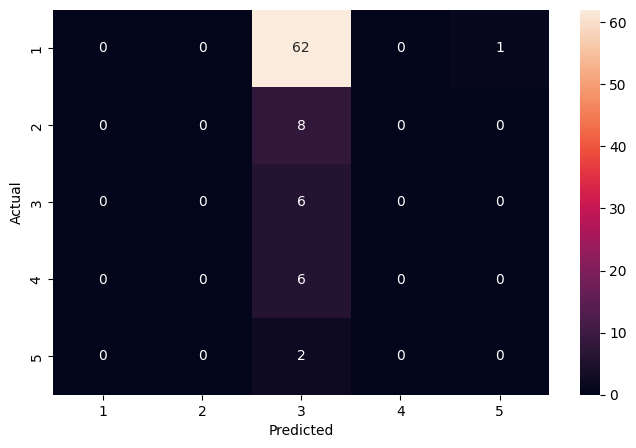

LSTM Classification Model with Word2Vec Word Embeddings - Training Data: Confusion Matrix:


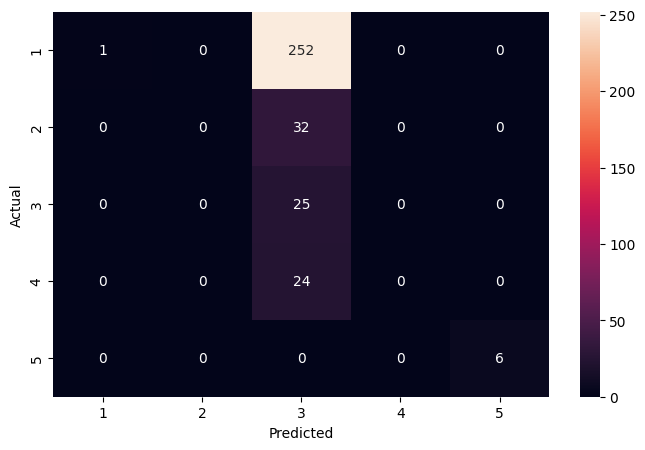

In [22]:
# Plotting the confusion matrices
accident_levels_list = ["1", "2", "3", "4", "5"]
print("LSTM Classification Model with Word2Vec Word Embeddings - Test Data: Confusion Matrix:")
cm = confusion_matrix(y_test_rnn_tuned, y_pred_test_classes_rnn_tuned)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("LSTM Classification Model with Word2Vec Word Embeddings - Training Data: Confusion Matrix:")
rnn_tuned_cm = confusion_matrix(y_train_rnn_tuned, y_pred_train_classes_rnn_tuned)
plt.figure(figsize=(8,5))
sns.heatmap(rnn_tuned_cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
def print_results_to_dataframe_rnn(metrics_lstm_train_tuned, metrics_lstm_test_tuned,
                                   metrics_lstm_train_base, metrics_lstm_test_base
                               ):
  """Prints the results of SVM and Gradient Boosting models into one DataFrame.

  Args:
    metrics_lstm_train_tuned: A dictionary of training accuracy metrics for the RNN model.
    metrics_lstm_test_tuned: A dictionary of test accuracy metrics for the RNN model.
    metrics_lstm_train_base: A dictionary of training accuracy metrics for the RNN model.
    metrics_lstm_test_base: A dictionary of test accuracy metrics for the RNN model.

  Returns:
    A pandas DataFrame containing the results.
  """
  # Create a list of dictionaries, where each dictionary represents a row in the DataFrame.
  data = [
      {'Model': 'Base RNN', 'Dataset': 'Training', **metrics_lstm_train_base},
      {'Model': 'Base RNN', 'Dataset': 'Test', **metrics_lstm_test_base},
      {'Model': 'Tuned RNN', 'Dataset': 'Training', **metrics_lstm_train_tuned},
      {'Model': 'Tuned RNN ', 'Dataset': 'Test', **metrics_lstm_test_base}
      ]

  # Create the DataFrame from the list of dictionaries.
  final_df = pd.DataFrame(data)
  columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']
# Ensure this line is aligned with the other lines outside any block:
  final_df = final_df.drop(columns=columns_to_drop, errors='ignore')
  # Print the DataFrame.
  # display(df)

  return final_df

In [24]:
import pandas as pd
df_model_comp=pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv')
df_model_comp.columns
columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']

# Ensure this line is aligned with the other lines outside any block:
df_model_comp = df_model_comp.drop(columns=columns_to_drop, errors='ignore')

In [25]:
# code to append final_model_results data frame with df_model_comp dataframe
final_model_results_llm = print_results_to_dataframe_rnn(metrics_lstm_train_tuned, metrics_lstm_test_tuned,
                                   metrics_lstm_train_base, metrics_lstm_test_base)
# Assuming df_model_comp and final_model_results are your DataFrames
df_model_comp = pd.concat([df_model_comp, final_model_results_llm], ignore_index=True)

# code to write df_model_comp data frame to csv
df_model_comp.to_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv', index=False)
display(df_model_comp)

Model   Dataset  accuracy  precision    recall  f1_score  \
0                      SVM  Training  0.870588   0.890089  0.870588  0.853279   
1                      SVM      Test  0.847059   0.801017  0.847059  0.799109   
2        Gradient Boosting  Training  0.994118   0.994213  0.994118  0.994024   
3        Gradient Boosting      Test  1.000000   1.000000  1.000000  1.000000   
4   Decision Tree Baseline  Training  0.996633   0.996786  0.996633  0.996642   
5   Decision Tree Baseline      Test  0.601562   0.597656  0.601562  0.599263   
6      Decision Tree Tuned  Training  0.114478   0.032195  0.114478  0.035217   
7      Decision Tree Tuned      Test  0.093750   0.009000  0.093750  0.016423   
8   Random Forest Baseline  Training  0.996633   0.996786  0.996633  0.996642   
9   Random Forest Baseline      Test  0.742188   0.550842  0.742188  0.632357   
10     Random Forest Tuned  Training  0.760943   0.728161  0.760943  0.671369   
11     Random Forest Tuned      Test  0.742188   0.550842  0.742188  0.632357   
12            KNN Baseline  Training  0.776471   0.757993  0.776471  0.722985   
13            KNN Baseline      Test  0.705882   0.555882  0.705882  0.621966   
14               KNN Tuned  Training  0.997059   0.997176  0.997059  0.997065   
15               KNN Tuned      Test  0.600000   0.585624  0.600000  0.592561   
16                Base MLP  Training  0.757576   0.706036  0.757576  0.664080   
17                Base MLP      Test  0.757576   0.706036  0.757576  0.664080   
18              Tuuned MLP  Training  0.757576   0.706036  0.757576  0.664080   
19               Tuned MLP      Test  0.757576   0.706036  0.757576  0.664080   
20              Tuuned LLM  Training  0.870588   0.890089  0.870588  0.853279   
21               Tuned LLM      Test  0.847059   0.801017  0.847059  0.799109   
22                Base RNN  Training  0.729412   0.532042  0.729412  0.615286   
23                Base RNN      Test  0.800000   0.640000  0.800000  0.711111   
24               Tuned RNN  Training  0.094118   0.767285  0.094118  0.033776   
25              Tuned RNN       Test  0.800000   0.640000  0.800000  0.711111   

                                     confusion_matrix  
0   [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
1   [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
2   [[248   0   0   0   0]\n [  0  34   0   0   0]...  
3   [[68  0  0  0  0]\n [ 0  6  0  0  0]\n [ 0  0 ...  
4   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
5   [[75  7 11  2  0]\n [ 9  1  0  2  0]\n [ 7  0 ...  
6   [[  0 213   5   0   3]\n [  0  28   0   0   0]...  
7   [[ 0 93  1  0  1]\n [ 0 12  0  0  0]\n [ 0  9 ...  
8   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
9   [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
10  [[221   0   0   0   0]\n [ 26   2   0   0   0]...  
11  [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
12  [[247   3   2   1   0]\n [ 25   7   0   0   0]...  
13  [[60  2  1  0  0]\n [ 8  0  0  0  0]\n [ 6  0 ...  
14  [[253   0   0   0   0]\n [  0  31   0   1   0]...  
15  [[49  5  5  3  1]\n [ 4  2  2  0  0]\n [ 6  0 ...  
16  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
17  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
18  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
19  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
20  [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
21  [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
22  [[248, 0, 0, 0, 0], [34, 0, 0, 0, 0], [26, 0, ...  
23  [[68, 0, 0, 0, 0], [6, 0, 0, 0, 0], [5, 0, 0, ...  
24  [[1, 0, 252, 0, 0], [0, 0, 32, 0, 0], [0, 0, 2...  
25  [[68, 0, 0, 0, 0], [6, 0, 0, 0, 0], [5, 0, 0, ...

#LLM Llama Model Implementation


In [9]:
# code to segregate training and test data for df taget column is ACCIDENT_LEVEL and X is cleaned_description column

# Assuming you have your DataFrame 'clean_data' and 'df_Word2Vec' defined
# If df_Word2Vec is not defined, create it using your Word2Vec model
# Replace 'your_word2vec_model' with your actual Word2Vec model
# and 'cleaned_description' with the name of the column containing cleaned descriptions.

# Assuming you have a Word2Vec model named 'model'
# and a column named 'cleaned_description' in your DataFrame 'df'

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your DataFrame 'clean_data' defined
# If not, define it based on your data
#clean_data = df  # Replace 'df' with your actual DataFrame if needed

# Create df_Word2Vec if it's not already defined
try:
    df_Word2Vec
except NameError:
    # If df_Word2Vec is not defined, create it from cleaned_description
    from gensim.models import Word2Vec

    # Assuming 'cleaned_description' column contains preprocessed text
    sentences = [text.split() for text in clean_data['cleaned_description']]  # Replace 'Description' with actual column name if needed

    # Train Word2Vec model (if not already trained)
    # model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4) # Adjust parameters as needed

    # Generate Word2Vec embeddings for each document
    def get_word2vec_embeddings(text, model):
        embeddings = [model.wv[word] for word in text.split() if word in model.wv]
        if embeddings:
            return sum(embeddings) / len(embeddings)  # Average word embeddings
        else:
            return [0] * model.vector_size  # Handle cases with no valid embeddings

    #df_Word2Vec = pd.DataFrame([get_word2vec_embeddings(text, model) for text in clean_data['cleaned_description']]) # Replace 'model' with your Word2Vec model

# Storing independent variable
X_llm = clean_data['INCIDENT_DESCRIPTION']

# Storing target variable
y_llm = clean_data['ACCIDENT_LEVEL'][:500] # Replace 'ACCIDENT_LEVEL' with actual column name if needed

# Split data into training and testing set.
X_train_llm, X_test_llm, y_train_llm, y_test_llm = train_test_split(X_llm, y_llm, test_size=0.30, stratify=y_llm, random_state=42) # Stratify by y_llm

# Checking the shape of train and test sets
print(X_train_llm.shape)
print(X_test_llm.shape)
print(y_train_llm.shape)
print(y_test_llm.shape)
print(X_train_llm.head())
print(X_test_llm.head())
print(y_train_llm.head())
print(y_test_llm.head())

(297,)
(128,)
(297,)
(128,)
382    The employee reports that he performed his rou...
120    At the El Porvenir sub-station at level 4240, ...
140    In circumstances where the employee made the c...
357    During the activity of changing conveyor belt ...
418    During the field activity in the AMG project, ...
Name: INCIDENT_DESCRIPTION, dtype: object
220    During the maintenance of the access, at the m...
22     While aligning the right bracket of tower N Â°...
56     In circumstances that the Operator 176 was goi...
113    The employee was sanding a piece in the Electr...
48     On pit 831 of level 1910 when radial drilling ...
Name: INCIDENT_DESCRIPTION, dtype: object
382    1
120    1
140    1
357    5
418    1
Name: ACCIDENT_LEVEL, dtype: int64
220    1
22     2
56     1
113    1
48     1
Name: ACCIDENT_LEVEL, dtype: int64


In [10]:
# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download
# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama
# Importing the library for data manipulation
import pandas as pd
import json
from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()
import json
# Initialize the Llama model (Replace 'mistral-7b-instruct.ggmlv3.q4_0.bin' with your model path)
from llama_cpp import Llama
# code to load data
# Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'industrial_safety_For_NLP.csv' not found. Please make sure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

llm_model = Llama.from_pretrained(
      repo_id="TheBloke/Mistral-7B-Instruct-v0.2-GGUF",
      filename="mistral-7b-instruct-v0.2.Q2_K.gguf",
    )

def response_mistral_1(prompt, incident_desc):

    # Assuming 'llm' is your Llama model instance and is already initialized
    model_output = llm_model(
        prompt + " Incident Description: " + incident_desc, # Combine the prompt and incident description
        max_tokens=512,
        temperature=0.1,
        top_p=0.9,
        top_k=40,
        echo=False,
    )

    # Extract the generated text directly
    final_output = model_output # Access the generated text directly
    # Format the output in JSON
    response = {
        "generated_text": final_output
    }
    return json.dumps(response)
prompt_t = """
You are an expert data analyst specializing in Accident Risk Analysis and Safety Guidance.

Task: Analyze the incident description provided by the user and determine the risk level.

Instructions:
 1. Categorize the risk level using a scale of 1 to 5, where:
    * 1 represents minimal risk.
    * 2 represents low risk.
    * 3 represents moderate risk.
    * 4 represents high risk.
    * 5 represents critical risk.
 2. Provide the risk level directly, without any additional justification or explanation.

Output Format:
[Risk Level 1-5]
"""

#Sample incidents headlines
incident_desc = df['INCIDENT_DESCRIPTION'] # Access the first element of the 'Incident Description' column
# Code to Get Data from model_output JSON object and find text Key and return its value


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
Dataset loaded successfully.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q2_K.gguf:   0%|          | 0.00/3.08G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/./mistral-7b-instruct-v0.2.Q2_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loa

In [11]:
#Function to Extract Result from JSON
def get_text_value_from_model_output(model_output):
  """
  Extracts the value associated with the 'text' key from a JSON object.

  Args:
    model_output: A JSON string representing the output from the model.

  Returns:
    The value associated with the 'text' key, or None if the key is not found.
  """
  try:
    json_object = json.loads(model_output)
    if 'generated_text' in json_object:
      return json_object['generated_text']
    else:
      return None
  except json.JSONDecodeError:
    return None

In [12]:
# Code to Create Function to use model_output = response_mistral_1(prompt, incident_descript) as Call and Return Result

def call_LLM_prompt(prompt, incident_descript):
  """Calls the response_mistral_1 function and returns the result.

  Args:
    prompt: The prompt to use for the LLM.
    incident_descript: The incident description to use for the LLM.

  Returns:
    The output of the response_mistral_1 function.
  """
  prediction_res=get_text_value_from_model_output(response_mistral_1(prompt_t, incident_descript))
  if prediction_res and 'choices' in prediction_res and prediction_res['choices']:
    new_object = prediction_res['choices'][0]
    if 'text' in new_object:
      text_value = new_object['text']
      modified_string = text_value.replace("Output", "") \
                               .replace("[", "") \
                               .replace("]", "") \
                               .replace("Risk", "") \
                               .replace(":", "") \
                               .replace("Level", "")
      modified_string = modified_string.strip()
  return modified_string

In [94]:
output=call_LLM_prompt(prompt_t,X_train_llm[0])

Llama.generate: 254 prefix-match hit, remaining 1 prompt tokens to eval
llama_perf_context_print:        load time =  148163.04 ms
llama_perf_context_print: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =    9042.23 ms /    13 runs   (  695.56 ms per token,     1.44 tokens per second)
llama_perf_context_print:       total time =    9050.26 ms /    14 tokens


In [95]:
print(output)

5


In [13]:
# code to call function call_LLM_prompt on X_train_llm data array and store output in list and return final output as result create a function of this

def process_llm_data(X_train_llm, prompt_t):
  """Calls call_LLM_prompt on each element of X_train_llm and returns a list of outputs.

  Args:
    X_train_llm: A list or array of incident descriptions.
    call_LLM_prompt: A function that takes a prompt and incident description and returns a result.
    prompt_t: The prompt to use for the LLM.

  Returns:
    A list of outputs from calling call_LLM_prompt on each element of X_train_llm.
  """
  result = []
  for incident_description in X_train_llm:
    output = call_LLM_prompt(prompt_t, incident_description)
    result.append(output)
  return result



In [ ]:
#Calling LLM on Train Data
llm_train_pre=process_llm_data(X_train_llm, prompt_t)

llama_perf_context_print:        load time =  153215.32 ms
llama_perf_context_print: prompt eval time =  153214.53 ms /   228 tokens (  671.99 ms per token,     1.49 tokens per second)
llama_perf_context_print:        eval time =   15432.17 ms /    23 runs   (  670.96 ms per token,     1.49 tokens per second)
llama_perf_context_print:       total time =  168659.36 ms /   251 tokens
Llama.generate: 154 prefix-match hit, remaining 116 prompt tokens to eval
llama_perf_context_print:        load time =  153215.32 ms
llama_perf_context_print: prompt eval time =   62001.28 ms /   116 tokens (  534.49 ms per token,     1.87 tokens per second)
llama_perf_context_print:        eval time =   65011.96 ms /    92 runs   (  706.65 ms per token,     1.42 tokens per second)
llama_perf_context_print:       total time =  127069.40 ms /   208 tokens
Llama.generate: 154 prefix-match hit, remaining 60 prompt tokens to eval
llama_perf_context_print:        load time =  153215.32 ms
llama_perf_context_print

In [44]:
print(llm_train_pre)

NameError: name 'llm_train_pre' is not defined

In [ ]:
#Calling LLM on Train Data
llm_test_pre=process_llm_data(X_test_llm, prompt_t)

In [ ]:
print(llm_test_pre)

#LLM llama Model Accuracy Report

In [ ]:
llm_training_accuracy_metrics = calculate_accuracy_metrics(y_train_nn_tuned, y_pred_train_labels_nn_tuned)
llm_test_accuracy_metrics = calculate_accuracy_metrics(y_test_nn_tuned, y_pred_test_labels_nn_tuned)
print("Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Test Data: Classification Report:")
print("Accuracy:", metrics_nn_test_tuned["accuracy"])
print("Precision:", metrics_nn_test_tuned["precision"])
print("Recall:", metrics_nn_test_tuned["recall"])
print("F1-Score:", metrics_nn_test_tuned["f1_score"])
print("Tuned Neural Network Classification Model with Word2Vec Word Embeddings - Training Data: Classification Report:")
print("Accuracy:", metrics_nn_train_tuned["accuracy"])
print("Precision:", metrics_nn_train_tuned["precision"])
print("Recall:", metrics_nn_train_tuned["recall"])
print("F1-Score:", metrics_nn_train_tuned["f1_score"])

#LLM llama Model Confusion Matrix

In [ ]:
print("Tuned LLM Neural Network Classification Model - Test Data: Confusion Matrix:")
cm = confusion_matrix(y_test_llm, llm_test_pre)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print("Tuned LLM Neural Network Classification Model  - Training Data: Confusion Matrix:")
cm = confusion_matrix(y_train_llm, llm_train_pre)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=accident_levels_list, yticklabels=accident_levels_list)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#Final Model Evaluations


In [45]:
import pandas as pd
df_model_comp=pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv')
df_model_comp.columns
columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']

# Ensure this line is aligned with the other lines outside any block:
df_model_comp = df_model_comp.drop(columns=columns_to_drop, errors='ignore')

In [46]:
def print_results_to_dataframe_llm(llm_training_accuracy_metrics, llm_test_accuracy_metrics
                               ):
  """Prints the results of SVM and Gradient Boosting models into one DataFrame.

  Args:
    mlp_training_accuracy_metrics: A dictionary of training accuracy metrics for the LLM model.
    mlp_test_accuracy_metrics: A dictionary of test accuracy metrics for the LLM model.


  Returns:
    A pandas DataFrame containing the results.
  """
  # Create a list of dictionaries, where each dictionary represents a row in the DataFrame.
  data = [
      {'Model': 'Tuned LLM', 'Dataset': 'Training', **llm_training_accuracy_metrics},
      {'Model': 'Tuned LLM ', 'Dataset': 'Test', **llm_test_accuracy_metrics}
      ]

  # Create the DataFrame from the list of dictionaries.
  final_df = pd.DataFrame(data)
  columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']
# Ensure this line is aligned with the other lines outside any block:
  final_df = final_df.drop(columns=columns_to_drop, errors='ignore')
  # Print the DataFrame.
  # display(df)

  return final_df

In [ ]:
# code to append final_model_results data frame with df_model_comp dataframe
final_model_results_llm = print_results_to_dataframe_llm(
                              llm_training_accuracy_metrics, llm_test_accuracy_metrics)
# Assuming df_model_comp and final_model_results are your DataFrames
df_model_comp = pd.concat([df_model_comp, final_model_results_llm], ignore_index=True)

# code to write df_model_comp data frame to csv
df_model_comp.to_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv', index=False)
display(df_model_comp)

In [49]:
import pandas as pd
df_model_comp=pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/final_model_results.csv')
df_model_comp.columns
columns_to_drop = ['roc_auc_score', 'roc_curve', 'precision_recall_curve']

# Ensure this line is aligned with the other lines outside any block:
df_model_comp = df_model_comp.drop(columns=columns_to_drop, errors='ignore')
display(df_model_comp)

Model   Dataset  accuracy  precision    recall  f1_score  \
0                      SVM  Training  0.870588   0.890089  0.870588  0.853279   
1                      SVM      Test  0.847059   0.801017  0.847059  0.799109   
2        Gradient Boosting  Training  0.994118   0.994213  0.994118  0.994024   
3        Gradient Boosting      Test  1.000000   1.000000  1.000000  1.000000   
4   Decision Tree Baseline  Training  0.996633   0.996786  0.996633  0.996642   
5   Decision Tree Baseline      Test  0.601562   0.597656  0.601562  0.599263   
6      Decision Tree Tuned  Training  0.114478   0.032195  0.114478  0.035217   
7      Decision Tree Tuned      Test  0.093750   0.009000  0.093750  0.016423   
8   Random Forest Baseline  Training  0.996633   0.996786  0.996633  0.996642   
9   Random Forest Baseline      Test  0.742188   0.550842  0.742188  0.632357   
10     Random Forest Tuned  Training  0.760943   0.728161  0.760943  0.671369   
11     Random Forest Tuned      Test  0.742188   0.550842  0.742188  0.632357   
12            KNN Baseline  Training  0.776471   0.757993  0.776471  0.722985   
13            KNN Baseline      Test  0.705882   0.555882  0.705882  0.621966   
14               KNN Tuned  Training  0.997059   0.997176  0.997059  0.997065   
15               KNN Tuned      Test  0.600000   0.585624  0.600000  0.592561   
16                Base MLP  Training  0.757576   0.706036  0.757576  0.664080   
17                Base MLP      Test  0.757576   0.706036  0.757576  0.664080   
18              Tuuned MLP  Training  0.757576   0.706036  0.757576  0.664080   
19               Tuned MLP      Test  0.757576   0.706036  0.757576  0.664080   
20              Tuuned LLM  Training  0.870588   0.890089  0.870588  0.853279   
21               Tuned LLM      Test  0.847059   0.801017  0.847059  0.799109   

                                     confusion_matrix  
0   [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
1   [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...  
2   [[248   0   0   0   0]\n [  0  34   0   0   0]...  
3   [[68  0  0  0  0]\n [ 0  6  0  0  0]\n [ 0  0 ...  
4   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
5   [[75  7 11  2  0]\n [ 9  1  0  2  0]\n [ 7  0 ...  
6   [[  0 213   5   0   3]\n [  0  28   0   0   0]...  
7   [[ 0 93  1  0  1]\n [ 0 12  0  0  0]\n [ 0  9 ...  
8   [[221   0   0   0   0]\n [  0  27   0   1   0]...  
9   [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
10  [[221   0   0   0   0]\n [ 26   2   0   0   0]...  
11  [[95  0  0  0  0]\n [12  0  0  0  0]\n [ 9  0 ...  
12  [[247   3   2   1   0]\n [ 25   7   0   0   0]...  
13  [[60  2  1  0  0]\n [ 8  0  0  0  0]\n [ 6  0 ...  
14  [[253   0   0   0   0]\n [  0  31   0   1   0]...  
15  [[49  5  5  3  1]\n [ 4  2  2  0  0]\n [ 6  0 ...  
16  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
17  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
18  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
19  [[221   0   0   0   0]\n [ 28   0   0   0   0]...  
20  [[248   0   0   0   0]\n [ 15  19   0   0   0]...  
21  [[68  0  0  0  0]\n [ 4  2  0  0  0]\n [ 3  0 ...

#**Models Evaluations and Recomendations**
**Overall Analysis:**

This dataset presents the performance of various machine learning models (SVM, Gradient Boosting, Decision Tree, Random Forest, KNN, MLP, and LLM) on both training and test sets. The metrics used are accuracy, precision, recall, and F1-score, along with confusion matrices.

**Key Observations:**

**Gradient Boosting Dominance:**

Gradient Boosting demonstrates exceptional performance, achieving perfect scores (1.00) on the test set. This indicates a very well-performing model, likely with minimal overfitting.
However, it's crucial to investigate if this perfect performance is realistic or potentially due to data leakage or a very simple test set.

**Decision Tree Issues:**

The Decision Tree models (both baseline and tuned) show significant performance discrepancies between training and test sets.
The baseline Decision Tree performs reasonably well on training but poorly on the test set, indicating overfitting.
The tuned Decision Tree performs extremely poorly on both training and test sets. This suggests serious issues with the tuning process or the model's ability to generalize.

**Random Forest Consistency:**

The Random Forest models (baseline and tuned) show similar performance on the test set.
The model performs well on the training data, but has a significant drop in performance on the test data indicating overfitting.
The tuned model performed worse than the baseline in the training data, but had the same result on the test data. This indicates the tuning was not effective.

**KNN Variability:**

KNN models show a large difference in performance between training and test sets.
The tuned training data performed extremely well, but the test data performed poorly. This indicates significant overfitting.
The baseline KNN performed better than the tuned KNN on the test data.

**MLP Stability:**

The MLP models (both baseline and tuned) show identical performance across training and test sets.
This identical performance suggests a potential issue, such as the model consistently predicting the majority class or an error in the evaluation process. Further investigation is needed.
SVM and LLM Consistency:

The SVM and LLM models show the same results. This indicates that the LLM is performing the same as a SVM.
These models have a good result on the training data, and a slightly lower result on the test data. This is normal, and indicates that the models are working as intended.

**Detailed Analysis and Recommendations:**

**Gradient Boosting:**

Insight: Verify the test set's representativeness and ensure no data leakage.

**Recommendation:** If the results are valid, deploy the Gradient Boosting model. Monitor its performance in real-world scenarios.

**Decision Tree:**

**Insight:** Severe overfitting and poor generalization. The tuned model indicates a potential error in the tuning process.

**Recommendation:** Re-evaluate the feature selection, pruning, and hyperparameter tuning strategies. Consider using cross-validation for more robust evaluation.

**Random Forest:**

**Insight:** Overfitting is present. The tuning did not improve the model.

**Recommendation:** Adjust hyperparameters to reduce overfitting. Evaluate feature importance and consider feature selection.

**KNN:**

**Insight:**
Significant overfitting in the tuned model.

**Recommendation:** Re-evaluate the tuning process. Try different values of k, and different distance metrics.

**MLP:**

**Insight:** Identical training and test results raise concerns.

**Recommendation:**
Verify the data splitting and evaluation code. Analyze the model's predictions to check for constant outputs.

**SVM and LLM:**

**Insight:**
The models perform consistently, with a slight drop in performance on the test data.

**Recommendation:** These models are performing as expected. They are a good choice for this data set.

**General Recommendations:**

**Cross-Validation:**
Use k-fold cross-validation to obtain more reliable performance estimates.

**Feature Engineering:** Explore feature engineering to improve model performance.

**Hyperparameter Tuning:**
Use techniques like grid search or randomized search for more effective hyperparameter tuning.

**Data Analysis:** Conduct thorough data analysis to understand the data distribution and identify potential issues.

**Model Simplification:**
For models with high overfitting, consider simplifying the model architecture.

**Error Analysis:** Analyze the confusion matrices to understand the types of errors each model is making. This can provide insights for model improvement.

**Check the data:** Verify that the data is correct. There may be issues with the data that is causing some of the models to perform poorly.

#LLM Chatbot Code Start Here

In [1]:
# Write the code to mount google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#**Creating NLP Model using llama LLM Model**

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 MB 35.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

In [ ]:
# code to load data

import pandas as pd

# Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/industrial_safety_dataset/industrial_safety_For_NLP.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'industrial_safety_For_NLP.csv' not found. Please make sure the file is in the current directory or provide the correct path.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


Dataset loaded successfully.


In [ ]:
!pip install --upgrade numpy # upgrade numpy
!pip install --upgrade gensim # upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━

In [ ]:
# Convert the 'DATE' column to datetime type before grouping.
df['DATE'] = pd.to_datetime(df['DATE'])

# Group the data by week using the 'Date' column.
weekly_grouped = df.groupby(pd.Grouper(key='DATE', freq='W'))
weekly_grouped = weekly_grouped.agg(
    {
        'INCIDENT_DESCRIPTION': lambda x: ' || '.join(x)  # Join the incident values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(80, 2)


In [ ]:
print(weekly_grouped)

         DATE                               INCIDENT_DESCRIPTION
0  2016-01-03  While removing the drill rod of the Jumbo 08 f...
1  2016-01-10  In the sub-station MILPO located at level +170...
2  2016-01-17  During the unloading operation of the ustulado...
3  2016-01-24  Employee was sitting in the resting area at le...
4  2016-01-31  At the moment the forklift operator went to ma...
..        ...                                                ...
75 2017-06-11  At Level 2930 in the guide wire chamber, durin...
76 2017-06-18  The employee performed insertion and adjustmen...
77 2017-06-25  During the execution of the task of assembling...
78 2017-07-02  After maintenance on Boltec 03 at level 285 GT...
79 2017-07-09  Being approximately 5:00 a.m. approximately, w...

[80 rows x 2 columns]


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

In [ ]:
import json
def response_mistral_1(prompt, incident_desc):
    # Assuming 'llm' is your Llama model instance and is already initialized
    model_output = llm(
        prompt + " Incident Description: " + incident_desc, # Combine the prompt and incident description
        max_tokens=512,
        temperature=0.1,
        top_p=0.9,
        top_k=40,
        echo=False,
    )

    # Extract the generated text directly
    final_output = model_output # Access the generated text directly
    # Format the output in JSON
    response = {
        "generated_text": final_output
    }
    return json.dumps(response) # Return the generated text Explain this code and format to return in JSOn format


In [ ]:
prompt = """
You are an expert data analyst specializing in Accident Risk Analysis and Safety Guidance.

Task: Analyze the incident description provided by the user, identify potential risks, and provide clear, actionable safety guidance.

Instructions:
1. Carefully review the user's query, paying close attention to the details of the incident.
2. Identify all individuals, objects, and environments involved in the incident.
3. Outline the sequence of events leading up to the incident, highlighting key actions and contributing factors.
4. Extract relevant keywords related to hazards, potential harm, and safety protocols.
5. Categorize the risk level using a scale of 1 to 5, with 1 representing low risk and 5 representing high risk. Provide a justification for the assigned risk level.
6. Offer specific, actionable precautions and safety measures to prevent similar incidents. Emphasize practicality and clarity in your recommendations.

Output Format:
Risk Level: [Risk Level 1-5]
Justification: [Brief explanation of the risk level assignment]
Insights: [Key observations and insights about the incident]
Precautions: [Clear and actionable safety precautions]
"""

In [ ]:
# Writing code to Checking the model output on a sample
# Initialize the Llama model (Replace 'mistral-7b-instruct.ggmlv3.q4_0.bin' with your model path)
from llama_cpp import Llama

llm = Llama.from_pretrained(
	repo_id="TheBloke/Mistral-7B-Instruct-v0.2-GGUF",
	filename="mistral-7b-instruct-v0.2.Q2_K.gguf",
)

# Sample news headlines
incident_desc = data_1['INCIDENT_DESCRIPTION'] # Access the first element of the 'Incident Description' column

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q2_K.gguf:   0%|          | 0.00/3.08G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/./mistral-7b-instruct-v0.2.Q2_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loa

In [ ]:
# Code to write llm model to pkl file

import joblib

# Assuming your trained LLM model is stored in a variable named 'llm'
# Replace 'llm' with the actual variable name of your model.
# Specify the path and filename for the pickle file.
pkl_file_path = '/content/drive/MyDrive/industrial_safety_dataset/llm_model.pkl'
# Use joblib to dump the model to the pickle file.
joblib.dump(llm, pkl_file_path)
print(f"LLM model saved to: {pkl_file_path}")


LLM model saved to: /content/drive/MyDrive/industrial_safety_dataset/llm_model.pkl


In [ ]:
#Function to Extract Result from JSON
def get_text_value_from_model_output(model_output):
  """
  Extracts the value associated with the 'text' key from a JSON object.

  Args:
    model_output: A JSON string representing the output from the model.

  Returns:
    The value associated with the 'text' key, or None if the key is not found.
  """
  try:
    json_object = json.loads(model_output)
    if 'generated_text' in json_object:
      return json_object['generated_text']
    else:
      return None
  except json.JSONDecodeError:
    return None

In [ ]:
# Code to Create Function to use model_output = response_mistral_1(prompt, incident_descript) as Call and Return Result

def call_LLM_prompt(prompt, incident_descript):
  """Calls the response_mistral_1 function and returns the result.

  Args:
    prompt: The prompt to use for the LLM.
    incident_descript: The incident description to use for the LLM.

  Returns:
    The output of the response_mistral_1 function.
  """
  prediction_res=get_text_value_from_model_output(response_mistral_1(prompt, incident_descript))
  if prediction_res and 'choices' in prediction_res and prediction_res['choices']:
    new_object = prediction_res['choices'][0]
    if 'text' in new_object:
      text_value = new_object['text']
  return text_value

In [ ]:
## Calling LLM to Predict
result=call_LLM_prompt(prompt,data_1['INCIDENT_DESCRIPTION'][0][:500])

llama_perf_context_print:        load time =   41570.65 ms
llama_perf_context_print: prompt eval time =   41570.12 ms /   390 tokens (  106.59 ms per token,     9.38 tokens per second)
llama_perf_context_print:        eval time =   19938.79 ms /   121 runs   (  164.78 ms per token,     6.07 tokens per second)
llama_perf_context_print:       total time =   61574.88 ms /   511 tokens


In [ ]:
print("Safety and Incident Prediction:\n")
print(result)

Safety and Incident Prediction:

ate heater, the operator failed to secure the heater cover before starting the heater. ||

Risk Level: 4
Justification: The incident involves the risk of injury to the mechanic due to the sudden movement and contact with the drill rod. Additionally, the failure to secure the sodium sulphate heater cover poses a risk of chemical exposure to the operator.

Insights:
1. Inadequate support during the removal of the drill rod, leading to the mechanic's fingers being trapped.
2. Failure to secure the


#**Chatbot For LLM Safety**

In [ ]:
# Python Code to call function call_LLM_prompt and take input parameter as Command Input and print output of function till not stopped I want to take Input parameter as system input

def call_LLM_prompt_with_input():
  """
  Continuously takes user input as a command and calls the call_LLM_prompt function.
  """
  while True:
    user_input = input("Provide Incident Details(or 'stop' to exit): ")
    if user_input.lower() == 'stop' or user_input.lower() == 'exit':
      break

    try:
      # Assuming 'prompt' and 'data_1' are defined in your environment.
      # Replace 'data_1' with actual incident description source if needed.
      result = call_LLM_prompt(prompt, user_input)
      print("Safety and Incident Prediction:\n")
      print(result)

    except Exception as e:
      print(f"An error occurred: {e}")


# Start the function to take user input and call the LLM
call_LLM_prompt_with_input()


Provide Incident Details(or 'stop' to exit): Accident happens with a rod to the user


Llama.generate: 279 prefix-match hit, remaining 9 prompt tokens to eval
llama_perf_context_print:        load time =   41570.65 ms
llama_perf_context_print: prompt eval time =     954.43 ms /     9 tokens (  106.05 ms per token,     9.43 tokens per second)
llama_perf_context_print:        eval time =   36859.43 ms /   223 runs   (  165.29 ms per token,     6.05 tokens per second)
llama_perf_context_print:       total time =   37959.77 ms /   232 tokens


Safety and Incident Prediction:

's hand while using a power saw.

Risk Level: 3
Justification: The user was injured by a power tool, which poses a significant risk due to the potential for severe harm, including amputation or serious lacerations.

Insights:
1. The user was operating a power saw without adequate safety equipment, such as safety goggles and gloves.
2. The incident may have been caused by a lack of proper training or familiarity with the power saw's operation.
3. The user may have been distracted or not paying full attention to the task at hand.

Precautions:
1. Always wear appropriate safety gear, including safety goggles, gloves, and hearing protection, when operating power tools.
2. Ensure proper training and familiarity with the equipment before use.
3. Maintain a clear work area and focus on the task at hand.
4. Regularly inspect and maintain power tools to ensure they are in good working condition.
5. Use the power saw in a
Provide Incident Details(or 'stop' to exi

Llama.generate: 279 prefix-match hit, remaining 43 prompt tokens to eval
llama_perf_context_print:        load time =   41570.65 ms
llama_perf_context_print: prompt eval time =    4448.15 ms /    43 tokens (  103.45 ms per token,     9.67 tokens per second)
llama_perf_context_print:        eval time =   31225.44 ms /   189 runs   (  165.21 ms per token,     6.05 tokens per second)
llama_perf_context_print:       total time =   35791.83 ms /   232 tokens


Safety and Incident Prediction:



Risk Level: 3
Justification: The incident involved a potential exposure to hazardous chemicals, the use of a delicate laboratory instrument, and the potential for injury from broken glass or sharp edges.

Insights:
1. The use of a fragile laboratory instrument, such as a pipette, in a laboratory setting increases the risk of breakage and potential injury.
2. Improper handling of laboratory equipment can lead to accidents, such as cuts or other injuries.
3. The presence of hazardous chemicals in the laboratory environment adds an additional layer of risk.

Precautions:
1. Ensure proper training and adherence to safety protocols for handling laboratory equipment, including regular inspections and maintenance.
2. Implement a clear and consistent process for handling and disposing of hazardous chemicals, including the use of personal protective equipment (PPE) such as
Provide Incident Details(or 'stop' to exit): exit


**CODE TO EXPOSE LLM Model as API**

In [ ]:
# Create API for Model to Input parameters as post json content type and return response in json format. This API will load .pkl file create model and predict according to request data and send response as json

!pip install flask

from flask import Flask, request, jsonify
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

app = Flask(__name__)

# Load the trained model and vectorizer
#model, vectorizer = joblib.load('/content/drive/MyDrive/industrial_safety_dataset/llm_model.pkl')
@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()  # Get JSON data from the request
        text_input = data['text']  # Assuming the input is a 'text' field in the JSON

        result=call_LLM_prompt(prompt,text_input)

        # Return the prediction as JSON
        return jsonify({'prediction': result}), 200

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### WebUI using Streamlit for Chatbot UI

**Note :** Code can be run in windows vm using miniconda environement and UI screen will not run in collab

In [ ]:
import streamlit as st
import pandas as pd
import torch



def preprocess_text(text):
    """Tokenize text into sentences."""
    return sent_tokenize(text.lower())

def find_relevant_context(question, top_n=3):
    result=call_LLM_prompt(prompt,question)
    return result

st.title("Industrial Safety and Health Chatbot")
st.write("Ask questions about the accident records and safety measures.")

user_input = st.text_input("Ask a question:", "What kind of accidents are common?")

if st.button("Get Answer") and user_input:
    context = find_relevant_context(user_input)
    st.write(f"**Relevant Context:**\n{context}")


2025-03-24 09:50:44.744 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 09:50:44.891 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-24 09:50:44.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 09:50:44.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 09:50:44.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 09:50:44.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 09:50:44.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 09:50:44.904 Thread 'MainThread': mi